In [1]:
import pandas as pd
import h5py    
import numpy as np    


In [2]:
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.legend_handler import HandlerLine2D


import scipy
from scipy import stats
from astropy import constants as const
from scipy import optimize
import scipy.integrate as integrate
from scipy.integrate import quad 
from scipy.special import *
import math
from matplotlib.patches import Rectangle
from ReadFile import Read
from ReadSim import ReadSim

In [3]:
plt.rcParams.update({
                    "text.usetex": True,
                    "font.family": "serif",
                    "font.sans-serif": ["Times"]})

#font.serif         : Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
#font.sans-serif    : Helvetica, Avant Garde, Computer Modern Sans serif
#font.cursive       : Zapf Chancery
#font.monospace     : Courier, Computer Modern Typewriter

In [4]:
# Reading hdf5 files

# f1 = h5py.File('morphs_r.hdf5','r+')
# f2 = h5py.File('morphs_g.hdf5','r+')
# f3 = h5py.File('morphs_i.hdf5','r+')

In [5]:
## Solar magnitudes

Mgsol = 5.08 #banda g
Misol = 4.53 #banda i
Mrsol = 4.64 #banda r 

In [6]:
# # Exctracting data from hdf5 files

# with h5py.File('morphs_i.hdf5', "r") as hdf:
#     # List all groups
#     ls = list(hdf.keys())    # reading the column's headers
# #     print(ls)
#     nsersic_i_ls = hdf.get('sersic_n')
#     nsersic_i = np.array(nsersic_i_ls)
#     Re_i_ls = hdf.get('sersic_rhalf')
#     Re_i_pixel = np.array(Re_i_ls)
#     Re_i = np.array(Re_i_ls) * 0.276 / 1.0485 / 0.678
    
#     Ie_i_ls = hdf.get('sersic_amplitude') 
#     Ie_i_e_s_pix = np.array(Ie_i_ls)
#     Ie_i_nnmgg_pix = Ie_i_e_s_pix * 1e9/ 1.59001e10 # electron/sec/px to nanomaggie/px
#     Ie_i_nnmgg_arcsec2 = Ie_i_nnmgg_pix / .396 ** 2       # 1 px = .396 arcsec nanomaggie/px to nanomaggie/arcsec
#     Ie_i_mag_arcsec2= -2.5*np.log10(Ie_i_nnmgg_arcsec2 * 1e-9) # nanomaggie/arcsec^2 to magnitude/arcsec^2 this is miu in eq 2.8 book
#     Ie_i_lum_pc2 = 10 ** (( - Ie_i_mag_arcsec2 + Misol + 21.572) / 2.5) #magnitude/arcsec^2 to luminosities/pc^2, Misol = 4.53
#     Ie_i_lum_kpc2 = Ie_i_lum_pc2 * 10**6 #lum/pc^2 to lum/kpc^2
    
#     sn_per_pixel_i_ls = hdf.get('sn_per_pixel') # signal noise, deben sen siempre mayores a 2.5
#     sn_per_pixel_i = np.array(sn_per_pixel_i_ls)
# #     print(sn_per_pixel_i)
#     flag_i_ls = hdf.get('flag')
#     flag_i = np.array(flag_i_ls)
#     flag_sersic_i_ls = hdf.get('flag_sersic')
#     flag_sersic_i = np.array(flag_sersic_i_ls)
    

# with h5py.File('morphs_g.hdf5', "r") as hdf:
#     # List all groups
#     ls = list(hdf.keys())
# #     print(ls)
#     nsersic_g_ls = hdf.get('sersic_n')
#     nsersic_g = np.array(nsersic_g_ls)
#     Re_g_ls = hdf.get('sersic_rhalf')
#     Re_g_pixel = np.array(Re_g_ls)
#     Re_g = np.array(Re_g_ls) * 0.276 / 1.0485 / 0.678
    
#     Ie_g_ls = hdf.get('sersic_amplitude')
#     Ie_g_e_s_pix = np.array(Ie_g_ls)
#     Ie_g_nnmgg_pix = Ie_g_e_s_pix * 1e9/ 2.40238e10  # electron/sec/px to nanomaggie/px
#     Ie_g_nnmgg_arcsec2 = Ie_g_nnmgg_pix / .396 ** 2       # 1 px = .396 arcsec nanomaggie/px to nanomaggie/arcsec
#     Ie_g_mag_arcsec2= -2.5*np.log10(Ie_g_nnmgg_arcsec2 * 1e-9) # nanomaggie/arcsec^2 to magnitude/arcsec^2 this is miu in eq 2.8 book
#     Ie_g_lum_pc2 = 10 ** (( - Ie_g_mag_arcsec2 + Mgsol + 21.572) / 2.5) #magnitude/arcsec^2 to luminosities/pc^2, Misol = 4.53
#     Ie_g_lum_kpc2 = Ie_g_lum_pc2 * 10**6 #lum/pc^2 to lum/kpc^2
    
#     sn_per_pixel_g_ls = hdf.get('sn_per_pixel')
#     sn_per_pixel_g = np.array(sn_per_pixel_g_ls)
#     flag_g_ls = hdf.get('flag')
#     flag_g = np.array(flag_g_ls)
#     flag_sersic_g_ls = hdf.get('flag_sersic')
#     flag_sersic_g = np.array(flag_sersic_g_ls)

        
# with h5py.File('morphs_r.hdf5', "r") as hdf:
#     # List all groups
#     ls = list(hdf.keys())
# #     print(ls)
#     nsersic_r_ls = hdf.get('sersic_n')
#     nsersic_r = np.array(nsersic_r_ls)
#     Re_r_ls = hdf.get('sersic_rhalf')
#     Re_r_pixel = np.array(Re_r_ls)
#     Re_r = np.array(Re_r_ls) * 0.276 / 1.0485 / 0.678 
    
#     Ie_r_ls = hdf.get('sersic_amplitude') 
#     Ie_r_e_s_pix = np.array(Ie_r_ls)
#     Ie_r_nnmgg_pix = Ie_r_e_s_pix * 1e9/ 2.3826e10 # electron/sec/px to nanomaggie/px
#     Ie_r_nnmgg_arcsec2 = Ie_r_nnmgg_pix / .396 ** 2       # 1 px = .396 arcsec nanomaggie/px to nanomaggie/arcsec
#     Ie_r_mag_arcsec2= -2.5*np.log10(Ie_r_nnmgg_arcsec2 * 1e-9) # nanomaggie/arcsec^2 to magnitude/arcsec^2 this is miu in eq 2.8 book
#     Ie_r_lum_pc2 = 10 ** (( - Ie_r_mag_arcsec2 + Mrsol + 21.572) / 2.5) #magnitude/arcsec^2 to luminosities/pc^2, Misol = 4.53
#     Ie_r_lum_kpc2 = Ie_r_lum_pc2 * 10**6 #lum/pc^2 to lum/kpc^2
    
#     sn_per_pixel_r_ls = hdf.get('sn_per_pixel')
#     sn_per_pixel_r = np.array(sn_per_pixel_r_ls)
#     flag_r_ls = hdf.get('flag')
#     flag_r = np.array(flag_r_ls)
#     flag_sersic_r_ls = hdf.get('flag_sersic')
#     flag_sersic_r = np.array(flag_sersic_r_ls)
    
#     ##### solo en la banda r
#     ellip_r_ls = hdf.get('sersic_ellip') #para sacar b/a es 1 menos sersic ellip
#     ellip_r = np.array(ellip_r_ls)
#     ba = 1 - ellip_r
#     concentration_r_ls = hdf.get('concentration')
#     conc_r = np.array(concentration_r_ls)
#     gini_ls = hdf.get('gini')
#     gini = np.array(gini_ls)
#     gini_20_bulge_ls = hdf.get('gini_m20_bulge')
#     gini_m20_bulge = np.array(gini_20_bulge_ls)
#     gini_m20_merger_ls = hdf.get('gini_m20_merger')
#     gini_m20_merger = np.array(gini_m20_merger_ls)
#     m20_ls = hdf.get('m20')
#     m20 = np.array(m20_ls)
    
    
# #  para separar en entre early y late hdf.get['concentration'] EN LA BANDA R si es mayor a 2.86 es early type y si es menor es late type
# # la segunda forma va a ser EN LA BANDA R con indice de sersic mayor a 2.5 early type y menor es late type
# # modifying the units of efective radius
# # Los radios están en pixeles y la escala de cada pixel del SDSS es de 0.276 ckpc/h.
# # El simbolo ckpc significa kpc comovil, es decir para transformar a kpc hay que dividir por 1+z,
# # con z = 0.0485 que es el corrimiento al rojo del snapshot.
# # También, en nuestro caso h = 0.678.
# # Re = Re_pixel * 0.276 / 1.0485 / 0.678


In [7]:
# print('Ie_i_e_s_pix ',Ie_i_e_s_pix[0]) 
# print('Ie_i_nnmgg_pix ',Ie_i_nnmgg_pix[0])
# print('Ie_i_nnmgg_arcsec2 ',Ie_i_nnmgg_arcsec2[0])
# print('Ie_i_mag_arcsec2 ',Ie_i_mag_arcsec2[0]) 
# print('Ie_i_lum_pc2 ',Ie_i_lum_pc2[0])
# print('Ie_i_lum_kpc2 ',Ie_i_lum_kpc2[0]) 

 

In [8]:
# # creating the table from sim data

# data = {'nsersic_i': nsersic_i, 'Re_i':Re_i, 'Re_i_pixel':Re_i_pixel, 'Ie_i':Ie_i_lum_kpc2, 'sn_per_pixel_i':sn_per_pixel_i, 'flag_i':flag_i, 'flag_sersic_i':flag_sersic_i, 
#         'nsersic_g': nsersic_g, 'Re_g':Re_g, 'Re_g_pixel':Re_g_pixel, 'Ie_g':Ie_g_lum_kpc2, 'sn_per_pixel_g':sn_per_pixel_g, 'flag_g':flag_g, 'flag_sersic_g':flag_sersic_g,
#         'nsersic_r': nsersic_r, 'Re_r':Re_r, 'Re_r_pixel':Re_r_pixel, 'Ie_r':Ie_r_lum_kpc2, 'sn_per_pixel_r':sn_per_pixel_r, 'flag_r':flag_r, 'flag_sersic_r':flag_sersic_r,
#         'ellip_r': ellip_r, 'conc_r':conc_r, 'ba':ba, 'gini':gini, 'gini_m20_bulge':gini_m20_bulge, 'gini_m20_merger': gini_m20_merger,
#         'm20': m20
#          }

# df = pd.DataFrame(data, columns = ['nsersic_i', 'Re_i', 'Re_i_pixel', 'Ie_i', 'sn_per_pixel_i', 'flag_i' ,'flag_sersic_i', 
#                                    'nsersic_g', 'Re_g', 'Re_g_pixel', 'Ie_g', 'sn_per_pixel_g', 'flag_g' ,'flag_sersic_g', 
#                                    'nsersic_r', 'Re_r', 'Re_r_pixel', 'Ie_r', 'sn_per_pixel_r', 'flag_r' ,'flag_sersic_r',
#                                    'ellip_r', 'conc_r', 'ba', 'gini', 'gini_m20_bulge', 'gini_m20_merger', 'm20'])
# df

In [9]:
# df.to_csv('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/simv1.csv')

# # creating table from sim data
# # sent to Aldo for the cuts

In [10]:
# cortes del catalogo, solo usar flag = 0 y flag sersic =0 para las bandas i, g y r
# signal noise > 2.5 para las bandas i,g,r
# todos los valores del indice de sersic estan cortados entre .5 y 10 para todas las bandas
# b/a > .5 para todas las banda
# 12470 galaxias a 6729 despues de los cortes

# catalog = Read('tabla_sim_grZibetti_logMs_gt_9.5.txt') # sim data with cuts by Aldo
catalog= Read('tabla_sim_grZibetti_logMs_gt_9.5_v1.txt')

In [11]:
########## LUMINOSITES INTENSITIES AND MAGNITUDES ##################


def sersic_profile(r, Ie, n, Re):
    # I0 puede ser L_tot
    # The surface brightness profile of spheroidal galaxies is generally well fit by the Sersic profile
    # Compare to sersic mass density 
    # I(R) = I0*exp[-Bn(R/Re)**(1/n)] = Ie*exp[-Bn{(R/Re)**(1/n)-1}]
    # Ie = I0/exp(Bn)
    # Inputs: radius, Intesity, sersic index, Reff
    # units are Lsun / kpc**2
    # Eq 2.22 from Galaxy Formation & Evolution
   
    Bn = 1.9992*n-0.3271
    ratio = (r/Re)**(1/n)
    exponent = -Bn*(ratio-1)
    
    return Ie*np.exp(exponent)

def L_profile(r, Ie, n, Re):
    # Total luminosity. Eq. 2.24 from Galaxy Formation & Evolution 
    # The total luminosity of a spherical system but as a function of radius. 
    # Compare to mass_prof_disk/sph from old code 
    # L = 2*pi*integral(I(R)RdR)
    # integrate sersic profile from 0 to R
    # inputs:
    #        radius, Intensity(e), sersic index, R eff
    
    def L(r, Ie, n, Re):
        
        return 2*np.pi*sersic_profile(r, Ie, n, Re)*r
    
    I = integrate.quad(L, 0 ,r, args=(Ie, n, Re), epsabs=1e-03, epsrel=1e-03, limit=15, maxp1=20, limlst=20)

    
    
    ansI = I[0]
    
    return ansI

def L_tot(Ie, n, Re):
    # Total luminosity. Eq. 2.24 from Galaxy Formation & Evolution 
    # The total luminosity of a spherical system with a Sersic profile is given by this equation.
    # Compare to mass_prof_disk/sph from old code 
    # Inputs :
    #         Intensity(e), sersic index, Eff rad
    # L = 2*pi*integral(I(R)RdR) = (2*pi*G(2n)/(Bn)**(2*n))*I0*Re**2
    # integrate sersic profile from 0 to inf
    # Returns the total Luminosity
    
    
    Bn = 2*n-0.324
    
    gm = math.gamma(2*n)  
    
    I0 = Ie*np.exp(Bn)    
    
    L = (2*np.pi*n*gm/(Bn)**(2*n))*I0*Re**2
    
    return L


def Lx_to_abs_mag(Lx, Mabs_xsol):
    # M_x  =  -2.5 *log(L_x/L_xsol) + M_xsol
    # It takes L_profile as input to make it an absolute magnited as a function of radius
    # Substract two different bands to get the color
    

    return -2.5 * np.log10(Lx) + Mabs_xsol #### Absolute Magnitude


In [12]:
 ################ MASS PROFILES #########################   
    
    
def stellar_mass_profile(func, r, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol):
    
##llamar una funcion cualquier (ie func en el input) func puede ser Stellar_mass_from_gi
# To make it a function of radius
# Inputs:
#       radius, Intensity(e), sersic index, Magnitudes of the g and i bands
   
   
    Lr_x = L_profile(r, Ie_x, n_x, Re_x)
    Lr_y = L_profile(r, Ie_y, n_y, Re_y)
    Mr_x = Lx_to_abs_mag(Lr_x, Mabs_xsol)
    Mr_y = Lx_to_abs_mag(Lr_y, Mabs_ysol)
   # We need the luminosity profile of the i band to make it a function of radius 
   
    return func(Lr_y, Mr_x, Mr_y) 



def Stellar_mass_from_gi(LtI, Mxg, Mxi):
# Log(Ms/Msol) = -0.68 + 0.73 * (g-i)  + log10(L_i/L_isol)
# Total stellar mass 
# Instead of the Luminosity profile, we use the total luminosity
#"only units of solar mass?"
   
    color = Mxg - Mxi 
   
    logMs =  -0.68 + 0.73 * color  + np.log10(LtI)
    
   
    return 10**logMs


def Stellar_mass_Bell_gr(LtR, Mxg, Mxr):
   #log10Mste_Bell_r = -0.406 + 1.097 * (g-r) + log10(L_r) 
   
    color = Mxg - Mxr
   
    logMs = -0.406 + 1.097 * color + np.log10(LtR) 
   
    return 10**logMs

def Stellar_mass_Bell_gi(LtI, Mxg, Mxi):
   #log10Mste_Bell_i = - 0.252 + 0.518*(g-i)+log10(L_i)
   
    color = Mxg - Mxi
   
    logMs = - 0.252 + 0.518* color + np.log10(LtI)
   
    return 10**logMs

def Stellar_mass_Zibetti_gr(LtR, Mxg, Mxr):
   #log10Mste_Zibetti_r = -0.840 + 1.654 * (g-r) + log10(L_r)
   
    color = Mxg - Mxr
   
    logMs = -0.840 + 1.654 * color + np.log10(LtR) 
   
    return 10**logMs

def Stellar_mass_Zibetti_gi(LtI, Mxg, Mxi):
   #log10Mste_Zibetti_i = -0.963 + 1.032*(g-i) + log10(L_i)
   
    color = Mxg - Mxi
   
    logMs = -0.963 + 1.032 * color + np.log10(LtI)
   
    return 10**logMs


def r_effective(func, Mstot,Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol):
   # Computes the effective (mass) radius. Where half of the total mass is located
   #  total_stellar_mass/2 = stellar_mass_profile 

    def f(r, func, Mstot, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol):
        
       
        return 0.5* Mstot - stellar_mass_profile(func, r, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol)
    
    fa = f(Re_y/6, func, Mstot, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol)
    
    fb = f(Re_y*6, func, Mstot, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol)
     
    if fa > 0 and fb < 0:
        
        
        r_m2 = optimize.bisect(f, Re_y/6, Re_y*6, xtol = 1e-4, rtol=1e-4, args=(func, Mstot, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol), maxiter = 20)
    elif fa < 0 and fb > 0:
        
       
        r_m2 = optimize.bisect(f, Re_y/6, Re_y*6, xtol = 1e-4, rtol=1e-4, args=(func, Mstot, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol), maxiter = 20)
    else:
        
        r_m2 = - 99 ## not a physical number. means its not calculating 
           
  
    return r_m2

def Sigma_1(func, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol):
    
    r = 1 
    
    return stellar_mass_profile(func, r, Ie_x, Ie_y, n_x, n_y, Re_x, Re_y, Mabs_xsol, Mabs_ysol) / np.pi




In [13]:
# calling data from txt columns

n_g = catalog['nsersic_g']
Re_g = catalog['Re_g']
Ie_g = catalog['Ie_g']
n_i = catalog['nsersic_i']
Re_i = catalog['Re_i']
Ie_i = catalog['Ie_i']
n_r = catalog['nsersic_r']
Re_r = catalog['Re_r']
Ie_r = catalog['Ie_r']
P_early = 1 - catalog['P_Late_comp']


# #  para separar en entre early y late hdf.get['concentration'] ()EN LA BANDA R si es mayor a 2.86 es early type y si es menor es late type
# # la segunda forma va a ser EN LA BANDA R con indice de sersic mayor a 2.5 early type y menor es late type

id_gal = catalog['ID']


In [14]:


# myFile = open("tabla_simv1.txt","w")
# myFile.write("ID" + " " + "Ltot_g" + " " + "Ltot_i" + " " + "Ltot_r" + " " + \
#              "Mg" + " " + "Mi" + " " + "Mr" + " " + \
#              "Ms_gi"+ " " + "Ms_gr_B" + " " + "Ms_gi_B" + " " + "Ms_gr_Z" + " "  + "Ms_gi_Z" + " " + \
#              "Re_ste_gi" + " " + "Re_ste_gr_B" + " " + "Re_ste_gi_B" + " " + "Re_ste_gr_Z" + " " + "Re_ste_gi_Z" + " " \
#              + "S1_gi" + " " + "S1_grB" + " " + "S1_giB"+ " "  + "S1_grZ"+ " "  + "S1_giZ"+"\n") 




# for i in range(0, len(catalog)):
    
#     ID = id_gal[i]


#     Ltot_g =L_tot(Ie_g[i], n_g[i], Re_g[i])

#     Ltot_i =L_tot(Ie_i[i], n_i[i], Re_i[i])

#     Ltot_r =L_tot(Ie_r[i], n_r[i], Re_r[i])
    
    
#     #Mag_r = -2.5*log10(1e-9*Ie_r)
        
#     Mg = Lx_to_abs_mag(Ltot_g, Mgsol)
    
#     Mi = Lx_to_abs_mag(Ltot_i, Misol)
    
#     Mr = Lx_to_abs_mag(Ltot_r, Mrsol)
    
        
#     Ms_gi=Stellar_mass_from_gi(Ltot_i, Mg, Mi)

#     Ms_gr_B=Stellar_mass_Bell_gr(Ltot_r, Mg, Mr)

#     Ms_gi_B=Stellar_mass_Bell_gi(Ltot_i, Mg, Mi)

#     Ms_gr_Z=Stellar_mass_Zibetti_gr(Ltot_r, Mg, Mr)

#     Ms_gi_Z=Stellar_mass_Zibetti_gi(Ltot_i, Mg, Mi)

    

#     Re_ste_gi=r_effective(Stellar_mass_from_gi, Ms_gi, Ie_g[i], Ie_i[i], n_g[i], n_i[i], Re_g[i], Re_i[i], Mgsol, Misol)

#     Re_ste_gr_B=r_effective(Stellar_mass_Bell_gr, Ms_gr_B, Ie_g[i], Ie_r[i], n_g[i], n_r[i], Re_g[i], Re_r[i], Mgsol, Mrsol)

#     Re_ste_gi_B=r_effective(Stellar_mass_Bell_gi, Ms_gi_B, Ie_g[i], Ie_i[i], n_g[i], n_i[i], Re_g[i], Re_i[i], Mgsol, Misol)

#     Re_ste_gr_Z=r_effective(Stellar_mass_Zibetti_gr, Ms_gr_Z, Ie_g[i], Ie_r[i], n_g[i], n_r[i], Re_g[i], Re_r[i], Mgsol, Mrsol)

#     Re_ste_gi_Z=r_effective(Stellar_mass_Zibetti_gi, Ms_gi_Z, Ie_g[i], Ie_i[i], n_g[i], n_i[i], Re_g[i], Re_i[i], Mgsol, Misol)
    
#     S1_gi = Sigma_1(Stellar_mass_from_gi, Ie_g[i], Ie_i[i], n_g[i], n_i[i], Re_g[i], Re_i[i], Mgsol, Misol)
#     S1_grB = Sigma_1(Stellar_mass_Bell_gr, Ie_g[i], Ie_r[i], n_g[i], n_r[i], Re_g[i], Re_r[i], Mgsol, Mrsol)
#     S1_giB = Sigma_1(Stellar_mass_Bell_gi, Ie_g[i], Ie_i[i], n_g[i], n_i[i], Re_g[i], Re_i[i], Mgsol, Misol)
#     S1_grZ = Sigma_1(Stellar_mass_Zibetti_gr, Ie_g[i], Ie_r[i], n_g[i], n_r[i], Re_g[i], Re_r[i], Mgsol, Mrsol)
#     S1_giZ = Sigma_1(Stellar_mass_Zibetti_gi, Ie_g[i], Ie_i[i], n_g[i], n_i[i], Re_g[i], Re_i[i], Mgsol, Misol) 



#     myFile.write(str(ID) + " " +  str(np.format_float_scientific(Ltot_g, unique=False, precision=5)) + " " + str(np.format_float_scientific(Ltot_i, unique=False, precision=5)) + " " + str(np.format_float_scientific(Ltot_r, unique=False, precision=5))\
#                  + " " +  str(np.format_float_scientific(Mg, unique=False, precision=5)) + " " + str(np.format_float_scientific(Mi, unique=False, precision=5)) + " " + str(np.format_float_scientific(Mr, unique=False, precision=5))\
#                  + " " + str(np.format_float_scientific(Ms_gi, unique=False, precision=5)) + " " + str(np.format_float_scientific(Ms_gr_B, unique=False, precision=5)) + " " + str(np.format_float_scientific(Ms_gi_B, unique=False, precision=5)) \
#                  + " " + str(np.format_float_scientific(Ms_gr_Z, unique=False, precision=5)) + " " + str(np.format_float_scientific(Ms_gi_Z, unique=False, precision=5)) + " " + str(np.format_float_scientific(Re_ste_gi, unique=False, precision=5)) \
#                  + " " + str(np.format_float_scientific(Re_ste_gr_B, unique=False, precision=5)) + " " + str(np.format_float_scientific(Re_ste_gi_B, unique=False, precision=5)) + " " + str(np.format_float_scientific(Re_ste_gr_Z, unique=False, precision=5)) \
#                  + " " + str(np.format_float_scientific(Re_ste_gi_Z, unique=False, precision=5)) + " " + str(np.format_float_scientific(S1_gi, unique=False, precision=5))+ " " + str(np.format_float_scientific(S1_grB, unique=False, precision=5)) \
#                  + " " + str(np.format_float_scientific(S1_giB, unique=False, precision=5))+ " " + str(np.format_float_scientific(S1_grZ, unique=False, precision=5))+ " " + str(np.format_float_scientific(S1_giZ, unique=False, precision=5))+"\n")
# myFile.close() 



In [15]:
## after sim catalog with cuts, new table with mass profiles, stellar radii and sigma 1
# catalog_diamond_sim =  ReadSim('tabla_sim_grZibetti_logMs_gt_9.5.txt')

In [16]:
# print(len(catalog))
# print(len(catalog_diamond_sim))

In [17]:
####################### DATA FROM CATALOGS ###################################


# from simulation data
n_g = catalog['nsersic_g']
n_i = catalog['nsersic_i']
n_r = catalog['nsersic_r']

Re_g = catalog['Re_g']   # half-light radius
Re_r = catalog['Re_r']
Re_i = catalog['Re_i']

Ie_g = catalog['Ie_g']
Ie_i = catalog['Ie_i']
Ie_r = catalog['Ie_r']

# from this code's calculations

Ltot_g = catalog['Ltot_g']
Ltot_r = catalog['Ltot_r']
Ltot_i = catalog['Ltot_i']

Ms_gi= catalog['Ms_gi'] 
Ms_gr_B= catalog['Ms_gr_B']
Ms_gi_B= catalog['Ms_gi_B']
Ms_gi_Z= catalog['Ms_gi_Z']

Re_ste_gi= catalog['Re_ste_gi']   # half-mass radius
Re_ste_gr_B= catalog['Re_ste_gr_B']
Re_ste_gi_B= catalog['Re_ste_gi_B']
Re_ste_gi_Z= catalog['Re_ste_gi_Z']


S1_gi = catalog['S1_gi']     
S1_grB = catalog['S1_grB']       
S1_giB = catalog['S1_giB']       
S1_giZ = catalog['S1_giZ'] 






In [18]:
#################### COLOR GRADIENTS CALC ###################################


L_p_g_01 = np.zeros(len(catalog))
L_p_g_1 = np.zeros(len(catalog))
L_p_r_01 = np.zeros(len(catalog))
L_p_r_1 = np.zeros(len(catalog))
L_p_i_01 = np.zeros(len(catalog))
L_p_i_1 = np.zeros(len(catalog))
Mag_g_01 = np.zeros(len(catalog))
Mag_g_1 = np.zeros(len(catalog))
Mag_r_01 = np.zeros(len(catalog)) 
Mag_r_1 = np.zeros(len(catalog))
Mag_i_01 = np.zeros(len(catalog))
Mag_i_1 = np.zeros(len(catalog))
Color_gr_01 = np.zeros(len(catalog))
Color_gr_1 = np.zeros(len(catalog))
Color_gi_01 = np.zeros(len(catalog))
Color_gi_1 = np.zeros(len(catalog))


L_p_g_tot = np.zeros(len(catalog))
L_p_r_tot = np.zeros(len(catalog))
L_p_i_tot = np.zeros(len(catalog))
Mag_g_tot = np.zeros(len(catalog))
Mag_r_tot = np.zeros(len(catalog))
Mag_i_tot = np.zeros(len(catalog))
gr = np.zeros(len(catalog))
gi = np.zeros(len(catalog))


gradiente_gr = np.zeros(len(catalog))
gradiente_gi = np.zeros(len(catalog))

for i in range(0, len(catalog)):
    
    eta_min = 0.1
    eta_max = 1.0
    
    L_p_g_01[i] = L_profile(Re_g[i] * eta_min, Ie_g[i], n_g[i], Re_g[i])
    L_p_g_1[i] = L_profile(Re_g[i] * eta_max, Ie_g[i], n_g[i], Re_g[i]) 
    L_p_r_01[i] = L_profile(Re_r[i] * eta_min, Ie_r[i], n_r[i], Re_r[i])
    L_p_r_1[i] = L_profile(Re_r[i] * eta_max, Ie_r[i], n_r[i], Re_r[i])
    L_p_i_01[i] = L_profile(Re_i[i] * eta_min, Ie_i[i], n_i[i], Re_i[i])
    L_p_i_1[i] = L_profile(Re_i[i] * eta_max, Ie_i[i], n_i[i], Re_i[i])
    Mag_g_01[i] = (Lx_to_abs_mag(L_p_g_01[i], Mgsol)) 
    Mag_g_1[i] = (Lx_to_abs_mag(L_p_g_1[i], Mgsol))
    Mag_r_01[i] = (Lx_to_abs_mag(L_p_r_01[i], Mrsol))
    Mag_r_1[i] = (Lx_to_abs_mag(L_p_r_1[i], Mrsol))
    Mag_i_01[i] = (Lx_to_abs_mag(L_p_i_01[i], Misol))
    Mag_i_1[i] = (Lx_to_abs_mag(L_p_i_1[i], Misol))
    Color_gr_01[i] = (Mag_g_01[i] - Mag_r_01[i])
    Color_gr_1[i] = (Mag_g_1[i] - Mag_r_1[i])
    Color_gi_01[i] = (Mag_g_01[i] - Mag_i_01[i])
    Color_gi_1[i] = (Mag_g_1[i] - Mag_i_1[i])
    
    L_p_g_tot[i] = L_profile(Re_g[i], Ie_g[i], n_g[i], Re_g[i])
    L_p_r_tot[i] = L_profile(Re_r[i], Ie_r[i], n_r[i], Re_r[i])
    L_p_i_tot[i] = L_profile(Re_i[i], Ie_i[i], n_i[i], Re_i[i])
    Mag_g_tot[i] = (Lx_to_abs_mag(L_p_g_01[i], Mgsol)) 
    Mag_r_tot[i] = (Lx_to_abs_mag(L_p_r_01[i], Mrsol))
    Mag_i_tot[i] = (Lx_to_abs_mag(L_p_i_01[i], Misol))
    # total galaxy color
    gr[i] = (Mag_g_01[i] - Mag_r_01[i])
    gi[i] = (Mag_g_01[i] - Mag_i_01[i])
     # gradient at 1 Re 
    gradiente_gr[i] = (Color_gr_01[i] - Color_gr_1[i]) / (np.log10(eta_min) - np.log10(eta_max))
    gradiente_gi[i] = (Color_gi_01[i] - Color_gi_1[i]) / (np.log10(eta_min) - np.log10(eta_max))
   




In [19]:
#### changin to arrays

gradiente_gr = np.array(gradiente_gr)
gr = np.array(gr)
gradiente_gi = np.array(gradiente_gi)
gi = np.array(gi)

# Choose between gr and gi (Zibetti g-r or Zibetti g-r)
# Just save figures with appropriate names so that they don't replace each other

In [20]:
Ms_d= catalog['Ms_gr_Z'] 
S1_d = catalog['S1_grZ'] 
Re_ste_d= catalog['Re_ste_gr_Z']

In [21]:
################# EARLY LATE ###########################

###### early late by concentration and sersic index

disk = P_early < 0.50
sphr = P_early >= 0.50
disk_c = catalog['conc_r'] < 2.86
sphr_c = catalog['conc_r'] > 2.86
disk_n = catalog['nsersic_r'] < 2.5
sphr_n = catalog['nsersic_r'] > 2.5
disk_gm20 = catalog['gini_m20_bulge'] < 0
sphr_gm20 = catalog['gini_m20_bulge'] >= 0
gm20 = catalog['gini_m20_bulge']

####### early and late masses

# # concentration
# Ms_c_late = Ms_d[disk_c]
# Ms_c_early = Ms_d[sphr_c]

# # sersic indecx
# Ms_n_late = Ms_d[disk_n]
# Ms_n_early = Ms_d[sphr_n]

# # bulge statistics
# Ms_gm20_late = Ms_d[disk_gm20]
# Ms_gm20_early = Ms_d[sphr_gm20]

# P early
Ms_d_late = Ms_d[disk]
Ms_d_early = Ms_d[sphr]

#### Early and late half-mass and half-light radii
# ### concentration

# #  stellar half mass radius
# re_d_early = Re_ste_d[sphr_c]
# re_d_late = Re_ste_d[disk_c]


# # half light radius
# re_r_d_early = Re_r[sphr_c]
# re_r_d_late = Re_r[disk_c]

# # ratio
# ratio_d = Re_ste_d/Re_r
# r_d_late = ratio_d[disk_c]
# r_d_early = ratio_d[sphr_c]

# # Sigma 1 early late
# S1_d_late = S1_d[disk_c]
# S1_d_early = S1_d[sphr_c]

# # sersic index early late 
# n_r_d_early = n_r[sphr_c]
# n_r_d_late = n_r[disk_c]


### P early

# stellar radius
re_early = Re_ste_d[sphr]
re_late = Re_ste_d[disk]

# light radius
re_r_early = Re_r[sphr]
re_r_late = Re_r[disk]

# sigma 1
S1_late = S1_d[disk]
S1_early = S1_d[sphr]

# sersic index
n_r_early = n_r[sphr]
n_r_late = n_r[disk]

# ### gm20

# # stellar radius
# re_d_early_gm20 = Re_ste_d[sphr_gm20]
# re_d_late_gm20 = Re_ste_d[disk_gm20]

# # light radius
# re_r_d_early_gm20 = Re_r[sphr_gm20]
# re_r_d_late_gm20 = Re_r[disk_gm20]


# # Sigma 1 early late
# S1_d_late_gm20 = S1_d[disk_gm20]
# S1_d_early_gm20 = S1_d[sphr_gm20]

# # sersic index early late 
# n_r_d_early_gm20 = n_r[sphr_gm20]
# n_r_d_late_gm20 = n_r[disk_gm20]

In [22]:
# I've commented the next cell to redo all the figures in g-i instead of g-r and avoid extra steps renaming everything

In [23]:
# ############################# COLOR g-r ###############################

gr_red = gr > .66
gr_blue = gr < .66

# ##### color early late



#### by P early

gr_red_early = gr_red[sphr] 
gr_red_late = gr_red[disk] 
gr_blue_early = gr_blue[sphr] 
gr_blue_late = gr_blue[disk] 


# #### gradientes


gradgr_early = gradiente_gr[sphr]
gradgr_late = gradiente_gr[disk]

##### gradientes por color 

# all
grad_gr_red = gradiente_gr[gr_red]
grad_gr_blue = gradiente_gr[gr_blue]


# early/late gradients by color by P early 
grad_gr_red_early = gradgr_early[gr_red_early]
grad_gr_red_late = gradgr_late[gr_red_late]
grad_gr_blue_early = gradgr_early[gr_blue_early]
grad_gr_blue_late = gradgr_late[gr_blue_late]


# ######## mass in color


# all
Ms_gr_red = Ms_d[gr_red]
Ms_gr_blue = Ms_d[gr_blue]



# P early
Ms_gr_red_early = Ms_d_early[gr_red_early]
Ms_gr_red_late = Ms_d_late[gr_red_late]
Ms_gr_blue_early = Ms_d_early[gr_blue_early]
Ms_gr_blue_late = Ms_d_late[gr_blue_late]

# # # sersic index, sigma 1 in color
# #
# # P early

# n_r_late_red = n_r_late[gr_red_late]
# n_r_late_blue = n_r_late[gr_blue_late]
# n_r_early_red = n_r_early[gr_red_early]
# n_r_early_blue = n_r_early[gr_blue_early]

# S1_late_red = S1_late[gr_red_late]
# S1_late_blue = S1_late[gr_blue_late]
# S1_early_red = S1_early[gr_red_early]
# S1_early_blue = S1_early[gr_blue_early]




# #P_early
# re_r_early_red = re_r_early[gr_red_early]
# re_r_early_blue = re_r_early[gr_blue_early]
# re_r_late_red = re_r_late[gr_red_late]
# re_r_late_blue = re_r_late[gr_blue_late]




In [24]:
# #### by concentration
# gr_red_early_c = gr_red[sphr_c] 
# gr_red_late_c = gr_red[disk_c] 
# gr_blue_early_c = gr_blue[sphr_c] 
# gr_blue_late_c = gr_blue[disk_c] 

# #### by sersic index
# gr_red_early_n = gr_red[sphr_n] 
# gr_red_late_n = gr_red[disk_n] 
# gr_blue_early_n = gr_blue[sphr_n] 
# gr_blue_late_n = gr_blue[disk_n] 

# #### by bulge statistics
# gr_red_early_gm20 = gr_red[sphr_gm20] 
# gr_red_late_gm20 = gr_red[disk_gm20] 
# gr_blue_early_gm20 = gr_blue[sphr_gm20] 
# gr_blue_late_gm20 = gr_blue[disk_gm20] 


# ### gradientes early y late
# gradgr_early_c = gradiente_gr[sphr_c]
# gradgr_late_c = gradiente_gr[disk_c]
# gradgr_early_n = gradiente_gr[sphr_n]
# gradgr_late_n = gradiente_gr[disk_n]
# gradgr_early_gm20 = gradiente_gr[sphr_gm20]
# gradgr_late_gm20 = gradiente_gr[disk_gm20]

# # early/late gradients by color by concentration 
# grad_gr_red_early_c = gradgr_early_c[gr_red_early_c]
# grad_gr_red_late_c = gradgr_late_c[gr_red_late_c]
# grad_gr_blue_early_c = gradgr_early_c[gr_blue_early_c]
# grad_gr_blue_late_c = gradgr_late_c[gr_blue_late_c]

# # early/late gradients by color by sersic index
# grad_gr_red_early_n = gradgr_early_n[gr_red_early_n]
# grad_gr_red_late_n = gradgr_late_n[gr_red_late_n]
# grad_gr_blue_early_n = gradgr_early_n[gr_blue_early_n]
# grad_gr_blue_late_n = gradgr_late_n[gr_blue_late_n]

# # early/late gradients by color by gm20
# grad_gr_red_early_gm20 = gradgr_early_gm20[gr_red_early_gm20]
# grad_gr_red_late_gm20 = gradgr_late_gm20[gr_red_late_gm20]
# grad_gr_blue_early_gm20 = gradgr_early_gm20[gr_blue_early_gm20]
# grad_gr_blue_late_gm20 = gradgr_late_gm20[gr_blue_late_gm20]

# ##### early late mass in color

# # concentration
# Ms_gr_red_early_c = Ms_c_early[gr_red_early_c]
# Ms_gr_red_late_c = Ms_c_late[gr_red_late_c]
# Ms_gr_blue_early_c = Ms_c_early[gr_blue_early_c]
# Ms_gr_blue_late_c = Ms_c_late[gr_blue_late_c]

# # sersic index
# Ms_gr_red_early_n = Ms_n_early[gr_red_early_n]
# Ms_gr_red_late_n = Ms_n_late[gr_red_late_n]
# Ms_gr_blue_early_n = Ms_n_early[gr_blue_early_n]
# Ms_gr_blue_late_n= Ms_n_late[gr_blue_late_n]

# # bulge statistics
# Ms_gr_red_early_gm20 = Ms_gm20_early[gr_red_early_gm20]
# Ms_gr_red_late_gm20 = Ms_gm20_late[gr_red_late_gm20]
# Ms_gr_blue_early_gm20 = Ms_gm20_early[gr_blue_early_gm20]
# Ms_gr_blue_late_gm20= Ms_gm20_late[gr_blue_late_gm20]

 # concentration

# n_r_d_late_red = n_r_d_late[gr_red_late_c]
# n_r_d_late_blue = n_r_d_late[gr_blue_late_c]
# n_r_d_early_red = n_r_d_early[gr_red_early_c]
# n_r_d_early_blue = n_r_d_early[gr_blue_early_c]

# S1_d_late_red = S1_d_late[gr_red_late_c]
# S1_d_late_blue = S1_d_late[gr_blue_late_c]
# S1_d_early_red = S1_d_early[gr_red_early_c]
# S1_d_early_blue = S1_d_early[gr_blue_early_c]

# #### half-light radius in color
# re_r_d_early_red = re_r_d_early[gr_red_early_c]
# re_r_d_early_blue = re_r_d_early[gr_blue_early_c]
# re_r_d_late_red = re_r_d_late[gr_red_late_c]
# re_r_d_late_blue = re_r_d_late[gr_blue_late_c]


# ##### ratios in colors
# r_d_early_red = r_d_early[gr_red_early_c]
# r_d_early_blue = r_d_early[gr_blue_early_c]
# r_d_late_red = r_d_late[gr_red_late_c]
# r_d_late_blue = r_d_late[gr_blue_late_c]




In [25]:
# ############################# COLOR g-i ###############################

# gi_red = gi > .85
# gi_blue = gi < .85

# ##### color early late



# #### by P early

# gi_red_early = gi_red[sphr] 
# gi_red_late = gi_red[disk] 
# gi_blue_early = gi_blue[sphr] 
# gi_blue_late = gi_blue[disk] 


# #### gradientes


# ### gradientes early y late

# gradgi_early = gradiente_gi[sphr]
# gradgi_late = gradiente_gi[disk]

# ##### gradientes por color 

# # all
# grad_gi_red = gradiente_gi[gi_red]
# grad_gi_blue = gradiente_gi[gi_blue]


# # early/late gradients by color by P early 
# grad_gi_red_early = gradgi_early[gi_red_early]
# grad_gi_red_late = gradgi_late[gi_red_late]
# grad_gi_blue_early = gradgi_early[gi_blue_early]
# grad_gi_blue_late = gradgi_late[gi_blue_late]


# ######## mass in color


# # all
# Ms_gi_red = Ms_d[gi_red]
# Ms_gi_blue = Ms_d[gi_blue]

# ##### early late mass in color



# # P early
# Ms_gi_red_early = Ms_d_early[gi_red_early]
# Ms_gi_red_late = Ms_d_late[gi_red_late]
# Ms_gi_blue_early = Ms_d_early[gi_blue_early]
# Ms_gi_blue_late = Ms_d_late[gi_blue_late]

# # sersic index, sigma 1 in color


# # P early

# n_r_late_red = n_r_late[gi_red_late]
# n_r_late_blue = n_r_late[gi_blue_late]
# n_r_early_red = n_r_early[gi_red_early]
# n_r_early_blue = n_r_early[gi_blue_early]

# S1_late_red = S1_late[gi_red_late]
# S1_late_blue = S1_late[gi_blue_late]
# S1_early_red = S1_early[gi_red_early]
# S1_early_blue = S1_early[gi_blue_early]


# #### half-light radius in color

# # P early
# re_r_early_red = re_r_early[gi_red_early]
# re_r_early_blue = re_r_early[gi_blue_early]
# re_r_late_red = re_r_late[gi_red_late]
# re_r_late_blue = re_r_late[gi_blue_late]

# ##### ratios in colors
# # r_d_early_red = r_d_early[gr_red_early_c]
# # r_d_early_blue = r_d_early[gr_blue_early_c]
# # r_d_late_red = r_d_late[gr_red_late_c]
# # r_d_late_blue = r_d_late[gr_blue_late_c]

In [24]:
# ############## GRADIENTS VS MASS EARLY LATE #########################

#Average color gradient gr 1 Re. Stellar mass. All

stat_gradgr_mean, gradgr_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_d), gradiente_gr, statistic='mean', bins=12, range=(9.5,12.0))
stat_gradgr_count, gradgr_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_d), gradiente_gr, statistic='count', bins=12, range=(9.5,12.0))
stat_gradgr_std, gradgr_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_d), gradiente_gr, statistic='std', bins=12, range=(9.5,12.0))

##Pearly g-r 
stat_gradgr_late_mean, gradgrlate_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_d_late), gradgr_late, statistic='mean', bins=12, range=(9.5,12.0))
stat_gradgr_early_mean, gradgrearly_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_d_early), gradgr_early, statistic='mean', bins=12, range=(9.5,12.0))

stat_gradgr_late_count, gradgrlate_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_d_late), gradgr_late, statistic='count', bins=12, range=(9.5,12.0))
stat_gradgr_early_count, gradgrearly_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_d_early), gradgr_early, statistic='count', bins=12, range=(9.5,12.0))

stat_gradgr_late_std, gradgrlate_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_d_late), gradgr_late, statistic='std', bins=12, range=(9.5,12.0))
stat_gradgr_early_std, gradgrearly_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_d_early), gradgr_early, statistic='std', bins=12, range=(9.5,12.0))



# # Average color gradient gi 1 Re. Stellar mass. All

# stat_gradgi_mean, gradgi_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_d), gradiente_gr, statistic='mean', bins=12, range=(9.0,12.0))
# stat_gradgi_count, gradgi_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_d), gradiente_gr, statistic='count', bins=12, range=(9.0,12.0))
# stat_gradgi_std, gradgi_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(Ms_d), gradiente_gr, statistic='std', bins=12, range=(9.0,12.0))


# # Pearly g-i
# stat_gradgi_late_mean, gradgilate_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_d_late), gradgi_late, statistic='mean', bins=12, range=(9.0,11.3))
# stat_gradgi_early_mean, gradgiearly_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_d_early), gradgi_early, statistic='mean', bins=12, range=(9.0,11.3))

# stat_gradgi_late_count, gradgilate_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_d_late), gradgi_late, statistic='count', bins=12, range=(9.0,11.3))
# stat_gradgi_early_count, gradgiearly_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_d_early), gradgi_early, statistic='count', bins=12, range=(9.0,11.3))

# stat_gradgi_late_std, gradgilate_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(Ms_d_late), gradgi_late, statistic='std', bins=12, range=(9.0,11.3))
# stat_gradgi_early_std, gradgiearly_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(Ms_d_early), gradgi_early, statistic='std', bins=12, range=(9.0,11.3))


In [27]:
# Average color gradient gr 1 Re. Stellar mass. Early and late

# # concentration
# stat_gradgr_late_c_mean, gradgrlate_c_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_c_late), gradgr_late_c, statistic='mean', bins=12, range=(9.5,11.3))
# stat_gradgr_early_c_mean, gradgrearly_c_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_c_early), gradgr_early_c, statistic='mean', bins=12, range=(9.5,12.0))

# stat_gradgr_late_c_count, gradgrlate_c_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_c_late), gradgr_late_c, statistic='count', bins=12, range=(9.5,12.0))
# stat_gradgr_early_c_count, gradgrearly_c_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_c_early), gradgr_early_c, statistic='count', bins=12, range=(9.5,12.0))

# stat_gradgr_late_c_std, gradgrlate_c_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_c_late), gradgr_late_c, statistic='std', bins=12, range=(9.5,11.3))
# stat_gradgr_early_c_std, gradgrearly_c_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_c_early), gradgr_early_c, statistic='std', bins=12, range=(9.5,12.0))

# # sersic index
# stat_gradgr_late_n_mean, gradgrlate_n_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_n_late), gradgr_late_n, statistic='mean', bins=12, range=(9.5,11.3))
# stat_gradgr_early_n_mean, gradgrearly_n_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_n_early), gradgr_early_n, statistic='mean', bins=12, range=(9.5,12.0))

# stat_gradgr_late_n_count, gradgrlate_n_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_n_late), gradgr_late_n, statistic='count', bins=12, range=(9.5,11.3))
# stat_gradgr_early_n_count, gradgrearly_n_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_n_early), gradgr_early_n, statistic='count', bins=12, range=(9.5,12.0))

# stat_gradgr_late_n_std, gradgrlate_n_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_n_late), gradgr_late_n, statistic='std', bins=12, range=(9.5,11.3))
# stat_gradgr_early_n_std, gradgrearly_n_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_n_early), gradgr_early_n, statistic='std', bins=12, range=(9.5,12.0))


# # GM20
# stat_gradgr_late_gm20_mean, gradgrlate_gm20_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gm20_late), gradgr_late_gm20, statistic='mean', bins=12, range=(9.5,11.3))
# stat_gradgr_early_gm20_mean, gradgrearly_gm20_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gm20_early), gradgr_early_gm20, statistic='mean', bins=12, range=(9.5,12.0))

# stat_gradgr_late_gm20_count, gradgrlate_gm20_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gm20_late), gradgr_late_gm20, statistic='count', bins=12, range=(9.5,11.3))
# stat_gradgr_early_gm20_count, gradgrearly_gm20_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gm20_early), gradgr_early_gm20, statistic='count', bins=12, range=(9.5,12.0))

# stat_gradgr_late_gm20_std, gradgrlate_gm20_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_gm20_late), gradgr_late_gm20, statistic='std', bins=12, range=(9.5,11.3))
# stat_gradgr_early_gm20_std, gradgrearly_gm20_std_bins, binnum_gradgr_std = scipy.stats.binned_statistic(np.log10(Ms_gm20_early), gradgr_early_gm20, statistic='std', bins=12, range=(9.5,12.0))



In [25]:
# # ############### GRADIENTS VS MASS EARLY LATE IN COLORS #########################

# Color gradient gr red and blue all early late

#red
stat_gradgr_red_mean, gradgr_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red), grad_gr_red, statistic='mean', bins=12, range=(9.5,11.9))
stat_gradgr_red_late_mean, gradgrlate_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late), grad_gr_red_late, statistic='mean', bins=12, range=(9.5,12.0))
stat_gradgr_red_early_mean, gradgrearly_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early), grad_gr_red_early, statistic='mean', bins=12, range=(9.7,12.0))


stat_gradgr_red_count, gradgr_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red), grad_gr_red, statistic='count', bins=12, range=(9.0,11.9))
stat_gradgr_red_late_count, gradgrlate_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late), grad_gr_red_late, statistic='count', bins=12, range=(9.7,11.5))
stat_gradgr_red_early_count, gradgrearly_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early), grad_gr_red_early, statistic='count', bins=12, range=(9.7,12.0))


stat_gradgr_red_std, gradgr_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red), grad_gr_red, statistic='std', bins=12, range=(9.0,11.9))
stat_gradgr_red_late_std, gradgrlate_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late), grad_gr_red_late, statistic='std', bins=12, range=(9.7,11.5))
stat_gradgr_red_early_std, gradgrearly_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early), grad_gr_red_early, statistic='std', bins=12, range=(9.7,12.0))

#blue

stat_gradgr_blue_mean, gradgr_blue_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_blue), grad_gr_blue, statistic='mean', bins=12, range=(9.5,11.9))
stat_gradgr_blue_late_mean, gradgrlate_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late), grad_gr_blue_late, statistic='mean', bins=12, range=(9.5,11.5))
stat_gradgr_blue_early_mean, gradgrearly_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early), grad_gr_blue_early, statistic='mean', bins=12, range=(9.5,11.6))


stat_gradgr_blue_count, gradgr_blue_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_blue), grad_gr_blue, statistic='count', bins=12, range=(9.0,11.9))
stat_gradgr_blue_late_count, gradgrlate_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late), grad_gr_blue_late, statistic='count', bins=12, range=(9.5,10.9))
stat_gradgr_blue_early_count, gradgrearly_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early), grad_gr_blue_early, statistic='count', bins=12, range=(9.5,11.6))


stat_gradgr_blue_std, gradgr_blue_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_blue), grad_gr_blue, statistic='std', bins=12, range=(9.0,11.9))
stat_gradgr_blue_late_std, gradgrlate_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late), grad_gr_blue_late, statistic='std', bins=12, range=(9.5,10.9))
stat_gradgr_blue_early_std, gradgrearly_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early), grad_gr_blue_early, statistic='std', bins=12, range=(9.5,11.6))

# Color gradient gi red and blue all early late

# #red
# stat_gradgi_red_mean, gradgi_red_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red), grad_gi_red, statistic='mean', bins=12, range=(9.5,11.9))
# stat_gradgi_red_late_mean, gradgilate_red_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red_late), grad_gi_red_late, statistic='mean', bins=12, range=(9.5,12.0))
# stat_gradgi_red_early_mean, gradgiearly_red_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red_early), grad_gi_red_early, statistic='mean', bins=12, range=(9.7,12.0))


# stat_gradgi_red_count, gradgi_red_count_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red), grad_gi_red, statistic='count', bins=12, range=(9.0,11.9))
# stat_gradgi_red_late_count, gradgilate_red_count_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red_late), grad_gi_red_late, statistic='count', bins=12, range=(9.7,11.5))
# stat_gradgi_red_early_count, gradgiearly_red_count_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red_early), grad_gi_red_early, statistic='count', bins=12, range=(9.7,12.0))


# stat_gradgi_red_std, gradgi_red_std_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red), grad_gi_red, statistic='std', bins=12, range=(9.0,11.9))
# stat_gradgi_red_late_std, gradgilate_red_std_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red_late), grad_gi_red_late, statistic='std', bins=12, range=(9.7,11.5))
# stat_gradgi_red_early_std, gradgiearly_red_std_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_red_early), grad_gi_red_early, statistic='std', bins=12, range=(9.7,12.0))

# #blue

# stat_gradgi_blue_mean, gradgi_blue_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_blue), grad_gi_blue, statistic='mean', bins=12, range=(9.5,11.9))
# stat_gradgi_blue_late_mean, gradgilate_blue_mean_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_blue_late), grad_gi_blue_late, statistic='mean', bins=12, range=(9.5,11.5))
# stat_gradgi_blue_early_mean, gradgiearly_blue_mean_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_blue_early), grad_gi_blue_early, statistic='mean', bins=12, range=(9.5,11.6))


# stat_gradgi_blue_count, gradgi_blue_count_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_blue), grad_gi_blue, statistic='count', bins=12, range=(9.0,11.9))
# stat_gradgi_blue_late_count, gradgilate_blue_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_blue_late), grad_gi_blue_late, statistic='count', bins=12, range=(9.5,10.9))
# stat_gradgi_blue_early_count, gradgiearly_blue_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_blue_early), grad_gi_blue_early, statistic='count', bins=12, range=(9.5,11.6))


# stat_gradgi_blue_std, gradgi_blue_std_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(Ms_gi_blue), grad_gi_blue, statistic='std', bins=12, range=(9.0,11.9))
# stat_gradgi_blue_late_std, gradgilate_blue_std_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_blue_late), grad_gi_blue_late, statistic='std', bins=12, range=(9.5,10.9))
# stat_gradgi_blue_early_std, gradgiearly_blue_std_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_blue_early), grad_gi_blue_early, statistic='std', bins=12, range=(9.5,11.6))



In [29]:
# # red dividing morphology by concentration, sersic index and gm20

# stat_gradgr_red_late_c_mean, gradgrlate_c_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_c), grad_gr_red_late_c, statistic='mean', bins=12, range=(9.5,11.5))
# stat_gradgr_red_early_c_mean, gradgrearly_c_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_c), grad_gr_red_early_c, statistic='mean', bins=12, range=(9.7,12.0))
# stat_gradgr_red_late_n_mean, gradgrlate_n_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_n), grad_gr_red_late_n, statistic='mean', bins=12, range=(9.5,11.5))
# stat_gradgr_red_early_n_mean, gradgrearly_n_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_n), grad_gr_red_early_n, statistic='mean', bins=12, range=(9.8,12.0))
# stat_gradgr_red_late_gm20_mean, gradgrlate_gm20_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_gm20), grad_gr_red_late_gm20, statistic='mean', bins=12, range=(9.5,11.5))
# stat_gradgr_red_early_gm20_mean, gradgrearly_gm20_red_mean_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_gm20), grad_gr_red_early_gm20, statistic='mean', bins=12, range=(9.8,12.0))

# stat_gradgr_red_late_c_count, gradgrlate_c_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_c), grad_gr_red_late_c, statistic='count', bins=12, range=(9.7,11.5))
# stat_gradgr_red_early_c_count, gradgrearly_c_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_c), grad_gr_red_early_c, statistic='count', bins=12, range=(9.7,12.0))
# stat_gradgr_red_late_n_count, gradgrlate_n_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_n), grad_gr_red_late_n, statistic='count', bins=12, range=(9.7,11.5))
# stat_gradgr_red_early_n_count, gradgrearly_n_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_n), grad_gr_red_early_n, statistic='count', bins=12, range=(9.8,12.0))
# stat_gradgr_red_late_gm20_count, gradgrlate_gm20_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_gm20), grad_gr_red_late_gm20, statistic='count', bins=12, range=(9.7,11.5))
# stat_gradgr_red_early_gm20_count, gradgrearly_gm20_red_count_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_gm20), grad_gr_red_early_gm20, statistic='count', bins=12, range=(9.8,12.0))

# stat_gradgr_red_late_c_std, gradgrlate_c_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_c), grad_gr_red_late_c, statistic='std', bins=12, range=(9.7,11.5))
# stat_gradgr_red_early_c_std, gradgrearly_c_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_c), grad_gr_red_early_c, statistic='std', bins=12, range=(9.7,12.0))
# stat_gradgr_red_late_n_std, gradgrlate_n_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_n), grad_gr_red_late_n, statistic='std', bins=12, range=(9.7,11.5))
# stat_gradgr_red_early_n_std, gradgrearly_n_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_n), grad_gr_red_early_n, statistic='std', bins=12, range=(9.8,12.0))
# stat_gradgr_red_late_gm20_std, gradgrlate_gm20_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_late_gm20), grad_gr_red_late_gm20, statistic='std', bins=12, range=(9.7,11.5))
# stat_gradgr_red_early_gm20_std, gradgrearly_gm20_red_std_bins, binnum_gradgr_mean = scipy.stats.binned_statistic(np.log10(Ms_gr_red_early_gm20), grad_gr_red_early_gm20, statistic='std', bins=12, range=(9.8,12.0))


# # blue

# stat_gradgr_blue_late_c_mean, gradgrlate_c_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_c), grad_gr_blue_late_c, statistic='mean', bins=12, range=(9.5,10.9))
# stat_gradgr_blue_early_c_mean, gradgrearly_c_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_c), grad_gr_blue_early_c, statistic='mean', bins=12, range=(9.5,11.6))
# stat_gradgr_blue_late_n_mean, gradgrlate_n_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_n), grad_gr_blue_late_n, statistic='mean', bins=12, range=(9.2,11.2))
# stat_gradgr_blue_early_n_mean, gradgrearly_n_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_n), grad_gr_blue_early_n, statistic='mean', bins=12, range=(9.2,11.2))
# stat_gradgr_blue_late_gm20_mean, gradgrlate_gm20_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_gm20), grad_gr_blue_late_gm20, statistic='mean', bins=12, range=(9.5,11.2))
# stat_gradgr_blue_early_gm20_mean, gradgrearly_gm20_blue_mean_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_gm20), grad_gr_blue_early_gm20, statistic='mean', bins=12, range=(9.5,11.2))

# stat_gradgr_blue_late_c_count, gradgrlate_c_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_c), grad_gr_blue_late_c, statistic='count', bins=12, range=(9.5,10.9))
# stat_gradgr_blue_early_c_count, gradgrearly_c_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_c), grad_gr_blue_early_c, statistic='count', bins=12, range=(9.5,11.6))
# stat_gradgr_blue_late_n_count, gradgrlate_n_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_n), grad_gr_blue_late_n, statistic='count', bins=12, range=(9.2,11.2))
# stat_gradgr_blue_early_n_count, gradgrearly_n_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_n), grad_gr_blue_early_n, statistic='count', bins=12, range=(9.5,11.2))
# stat_gradgr_blue_late_gm20_count, gradgrlate_gm20_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_gm20), grad_gr_blue_late_gm20, statistic='count', bins=12, range=(9.5,11.2))
# stat_gradgr_blue_early_gm20_count, gradgrearly_gm20_blue_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_gm20), grad_gr_blue_early_gm20, statistic='count', bins=12, range=(9.5,11.2))

# stat_gradgr_blue_late_c_std, gradgrlate_c_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_c), grad_gr_blue_late_c, statistic='std', bins=12, range=(9.5,10.9))
# stat_gradgr_blue_early_c_std, gradgrearly_c_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_c), grad_gr_blue_early_c, statistic='std', bins=12, range=(9.5,11.6))
# stat_gradgr_blue_late_n_std, gradgrlate_n_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_n), grad_gr_blue_late_n, statistic='std', bins=12, range=(9.2,11.2))
# stat_gradgr_blue_early_n_std, gradgrearly_n_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_n), grad_gr_blue_early_n, statistic='std', bins=12, range=(9.5,11.2))
# stat_gradgr_blue_late_gm20_std, gradgrlate_gm20_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_late_gm20), grad_gr_blue_late_gm20, statistic='std', bins=12, range=(9.5,11.2))
# stat_gradgr_blue_early_gm20_std, gradgrearly_gm20_blue_std_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_blue_early_gm20), grad_gr_blue_early_gm20, statistic='std', bins=12, range=(9.5,11.2))


In [30]:
# ############################# GRADIENTS VS OTHER PROPERTIES IN COLORS ###########################

# # concentration

# # Re_r vs grad no log
# stat_grad_rer_early_red_mean, grad_rer_early_red_means_bins, binnum_d_rat_rer_early_mean = scipy.stats.binned_statistic(grad_gr_red_early_c, re_r_d_early_red,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_red_count, grad_rer_early_red_count_bins, binnum_d_rat_rer_early_count = scipy.stats.binned_statistic(grad_gr_red_early_c, re_r_d_early_red,  statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_red_std, grad_rer_early_red_std_bins, binnum_d_rat_rer_early_std = scipy.stats.binned_statistic(grad_gr_red_early_c, re_r_d_early_red,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_rer_early_blue_mean, grad_rer_early_blue_means_bins, binnum_d_rat_rer_blue_mean = scipy.stats.binned_statistic(grad_gr_blue_early_c, re_r_d_early_blue,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_blue_count, grad_rer_early_blue_count_bins, binnum_d_rat_rer_blue_count = scipy.stats.binned_statistic(grad_gr_blue_early_c, re_r_d_early_blue, statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_blue_std, grad_rer_early_blue_std_bins, binnum_d_rat_rer_blue_std = scipy.stats.binned_statistic(grad_gr_blue_early_c, re_r_d_early_blue,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_rer_late_red_mean, grad_rer_late_red_means_bins, binnum_d_rat_rer_late_mean = scipy.stats.binned_statistic(grad_gr_red_late_c, re_r_d_late_red,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_red_count, grad_rer_late_red_count_bins, binnum_d_rat_rer_late_count = scipy.stats.binned_statistic(grad_gr_red_late_c, re_r_d_late_red,  statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_red_std, grad_rer_late_red_std_bins, binnum_d_rat_rer_late_std = scipy.stats.binned_statistic(grad_gr_red_late_c, re_r_d_late_red,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_rer_late_blue_mean, grad_rer_late_blue_means_bins, binnum_d_rat_rer_late_mean = scipy.stats.binned_statistic(grad_gr_blue_late_c, re_r_d_late_blue, statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_blue_count, grad_rer_late_blue_count_bins, binnum_d_rat_rer_late_count = scipy.stats.binned_statistic(grad_gr_blue_late_c, re_r_d_late_blue, statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_blue_std, grad_rer_late_blue_std_bins, binnum_d_rat_rer_late_std = scipy.stats.binned_statistic(grad_gr_blue_late_c, re_r_d_late_blue, statistic='std', bins=6, range=(-1.0, 1.0))

# # n_r vs grad
# stat_grad_nr_early_red_mean, grad_nr_early_red_means_bins, binnum_d_rat_nr_early_mean = scipy.stats.binned_statistic(grad_gr_red_early_c, n_r_d_early_red, statistic='mean', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_red_count, grad_nr_early_red_count_bins, binnum_d_rat_nr_early_count = scipy.stats.binned_statistic(grad_gr_red_early_c, n_r_d_early_red, statistic='count', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_red_std, grad_nr_early_red_std_bins, binnum_d_rat_nr_early_std = scipy.stats.binned_statistic(grad_gr_red_early_c, n_r_d_early_red, statistic='std', bins=6, range=(-0.6,0.4))

# stat_grad_nr_late_red_mean, grad_nr_late_red_means_bins, binnum_d_rat_nr_late_mean = scipy.stats.binned_statistic(grad_gr_red_late_c, n_r_d_late_red, statistic='mean', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_red_count, grad_nr_late_red_count_bins, binnum_d_rat_nr_late_count = scipy.stats.binned_statistic(grad_gr_red_late_c, n_r_d_late_red, statistic='count', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_red_std, grad_nr_late_red_std_bins, binnum_d_rat_nr_late_std = scipy.stats.binned_statistic(grad_gr_red_late_c, n_r_d_late_red, statistic='std', bins=6, range=(-0.6, 0.4))

# stat_grad_nr_early_blue_mean, grad_nr_early_blue_means_bins, binnum_d_rat_nr_early_mean = scipy.stats.binned_statistic(grad_gr_blue_early_c, n_r_d_early_blue, statistic='mean', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_blue_count, grad_nr_early_blue_count_bins, binnum_d_rat_nr_early_count = scipy.stats.binned_statistic(grad_gr_blue_early_c, n_r_d_early_blue, statistic='count', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_blue_std, grad_nr_early_blue_std_bins, binnum_d_rat_nr_early_std = scipy.stats.binned_statistic(grad_gr_blue_early_c, n_r_d_early_blue, statistic='std', bins=6, range=(-0.6,0.4))

# stat_grad_nr_late_blue_mean, grad_nr_late_blue_means_bins, binnum_d_rat_nr_late_mean = scipy.stats.binned_statistic(grad_gr_blue_late_c, n_r_d_late_blue, statistic='mean', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_blue_count, grad_nr_late_blue_count_bins, binnum_d_rat_nr_late_count = scipy.stats.binned_statistic(grad_gr_blue_late_c, n_r_d_late_blue, statistic='count', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_blue_std, grad_nr_late_blue_std_bins, binnum_d_rat_nr_late_std = scipy.stats.binned_statistic(grad_gr_blue_late_c, n_r_d_late_blue, statistic='std', bins=6, range=(-0.6, 0.4))

# # s1_d vs grad
# stat_grad_S1_early_red_mean, grad_S1_early_red_means_bins, binnum_d_rat_S1_early_red_mean = scipy.stats.binned_statistic(grad_gr_red_early_c, np.log10(S1_d_early_red), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_red_count, grad_S1_early_red_count_bins, binnum_d_rat_S1_early_count = scipy.stats.binned_statistic(grad_gr_red_early_c, np.log10(S1_d_early_red), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_red_std, grad_S1_early_red_std_bins, binnum_d_rat_S1_early_red_std = scipy.stats.binned_statistic(grad_gr_red_early_c, np.log10(S1_d_early_red), statistic='std', bins=6, range=(-1.0,0.9))

# stat_grad_S1_late_red_mean, grad_S1_late_red_means_bins, binnum_d_rat_S1_late_red_mean = scipy.stats.binned_statistic(grad_gr_red_late_c, np.log10(S1_d_late_red), statistic='mean', bins=6, range=(-1.0,0.3))
# stat_grad_S1_late_red_count, grad_S1_late_red_count_bins, binnum_d_rat_S1_late_red_count = scipy.stats.binned_statistic(grad_gr_red_late_c, np.log10(S1_d_late_red), statistic='count', bins=6, range=(-1.0,0.3))
# stat_grad_S1_late_red_std, grad_S1_late_red_std_bins, binnum_d_rat_S1_late_red_std = scipy.stats.binned_statistic(grad_gr_red_late_c, np.log10(S1_d_late_red), statistic='std', bins=6, range=(-1.0,0.3))


# stat_grad_S1_early_blue_mean, grad_S1_early_blue_means_bins, binnum_d_rat_S1_early_blue_mean = scipy.stats.binned_statistic(grad_gr_blue_early_c, np.log10(S1_d_early_blue), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_blue_count, grad_S1_early_blue_count_bins, binnum_d_rat_S1_early_count = scipy.stats.binned_statistic(grad_gr_blue_early_c, np.log10(S1_d_early_blue), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_blue_std, grad_S1_early_blue_std_bins, binnum_d_rat_S1_early_blue_std = scipy.stats.binned_statistic(grad_gr_blue_early_c, np.log10(S1_d_early_blue), statistic='std', bins=6, range=(-1.0,0.9))

# stat_grad_S1_late_blue_mean, grad_S1_late_blue_means_bins, binnum_d_rat_S1_late_blue_mean = scipy.stats.binned_statistic(grad_gr_blue_late_c, np.log10(S1_d_late_blue), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_S1_late_blue_count, grad_S1_late_blue_count_bins, binnum_d_rat_S1_late_blue_count = scipy.stats.binned_statistic(grad_gr_blue_late_c, np.log10(S1_d_late_blue), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_S1_late_blue_std, grad_S1_late_blue_std_bins, binnum_d_rat_S1_late_blue_std = scipy.stats.binned_statistic(grad_gr_blue_late_c, np.log10(S1_d_late_blue), statistic='std', bins=6, range=(-1.0,0.9))


In [31]:
# ############################# GRADIENTS VS OTHER PROPERTIES IN COLORS ###########################

# # Pearly g-r

# # Re_r vs grad no log
# stat_grad_rer_early_P_red_mean, grad_rer_early_P_red_means_bins, binnum_d_rat_rer_early_mean = scipy.stats.binned_statistic(grad_gr_red_early, re_r_early_red,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_P_red_count, grad_rer_early_P_red_count_bins, binnum_d_rat_rer_early_count = scipy.stats.binned_statistic(grad_gr_red_early, re_r_early_red,  statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_P_red_std, grad_rer_early_P_red_std_bins, binnum_d_rat_rer_early_std = scipy.stats.binned_statistic(grad_gr_red_early, re_r_early_red,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_rer_early_P_blue_mean, grad_rer_early_P_blue_means_bins, binnum_d_rat_rer_blue_mean = scipy.stats.binned_statistic(grad_gr_blue_early, re_r_early_blue,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_P_blue_count, grad_rer_early_P_blue_count_bins, binnum_d_rat_rer_blue_count = scipy.stats.binned_statistic(grad_gr_blue_early, re_r_early_blue, statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_early_P_blue_std, grad_rer_early_P_blue_std_bins, binnum_d_rat_rer_blue_std = scipy.stats.binned_statistic(grad_gr_blue_early, re_r_early_blue,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_rer_late_P_red_mean, grad_rer_late_P_red_means_bins, binnum_d_rat_rer_late_mean = scipy.stats.binned_statistic(grad_gr_red_late, re_r_late_red,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_P_red_count, grad_rer_late_P_red_count_bins, binnum_d_rat_rer_late_count = scipy.stats.binned_statistic(grad_gr_red_late, re_r_late_red,  statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_P_red_std, grad_rer_late_P_red_std_bins, binnum_d_rat_rer_late_std = scipy.stats.binned_statistic(grad_gr_red_late, re_r_late_red,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_rer_late_P_blue_mean, grad_rer_late_P_blue_means_bins, binnum_d_rat_rer_late_mean = scipy.stats.binned_statistic(grad_gr_blue_late, re_r_late_blue, statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_P_blue_count, grad_rer_late_P_blue_count_bins, binnum_d_rat_rer_late_count = scipy.stats.binned_statistic(grad_gr_blue_late, re_r_late_blue, statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_rer_late_P_blue_std, grad_rer_late_P_blue_std_bins, binnum_d_rat_rer_late_std = scipy.stats.binned_statistic(grad_gr_blue_late, re_r_late_blue, statistic='std', bins=6, range=(-1.0, 1.0))

# # n_r vs grad
# stat_grad_nr_early_P_red_mean, grad_nr_early_P_red_means_bins, binnum_d_rat_nr_early_mean = scipy.stats.binned_statistic(grad_gr_red_early, n_r_early_red, statistic='mean', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_P_red_count, grad_nr_early_P_red_count_bins, binnum_d_rat_nr_early_count = scipy.stats.binned_statistic(grad_gr_red_early, n_r_early_red, statistic='count', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_P_red_std, grad_nr_early_P_red_std_bins, binnum_d_rat_nr_early_std = scipy.stats.binned_statistic(grad_gr_red_early, n_r_early_red, statistic='std', bins=6, range=(-0.6,0.4))

# stat_grad_nr_late_P_red_mean, grad_nr_late_P_red_means_bins, binnum_d_rat_nr_late_mean = scipy.stats.binned_statistic(grad_gr_red_late, n_r_late_red, statistic='mean', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_P_red_count, grad_nr_late_P_red_count_bins, binnum_d_rat_nr_late_count = scipy.stats.binned_statistic(grad_gr_red_late, n_r_late_red, statistic='count', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_P_red_std, grad_nr_late_P_red_std_bins, binnum_d_rat_nr_late_std = scipy.stats.binned_statistic(grad_gr_red_late, n_r_late_red, statistic='std', bins=6, range=(-0.6, 0.4))

# stat_grad_nr_early_P_blue_mean, grad_nr_early_P_blue_means_bins, binnum_d_rat_nr_early_mean = scipy.stats.binned_statistic(grad_gr_blue_early, n_r_early_blue, statistic='mean', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_P_blue_count, grad_nr_early_P_blue_count_bins, binnum_d_rat_nr_early_count = scipy.stats.binned_statistic(grad_gr_blue_early, n_r_early_blue, statistic='count', bins=6, range=(-0.6,0.4))
# stat_grad_nr_early_P_blue_std, grad_nr_early_P_blue_std_bins, binnum_d_rat_nr_early_std = scipy.stats.binned_statistic(grad_gr_blue_early, n_r_early_blue, statistic='std', bins=6, range=(-0.6,0.4))

# stat_grad_nr_late_P_blue_mean, grad_nr_late_P_blue_means_bins, binnum_d_rat_nr_late_mean = scipy.stats.binned_statistic(grad_gr_blue_late, n_r_late_blue, statistic='mean', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_P_blue_count, grad_nr_late_P_blue_count_bins, binnum_d_rat_nr_late_count = scipy.stats.binned_statistic(grad_gr_blue_late, n_r_late_blue, statistic='count', bins=6, range=(-0.6, 0.4))
# stat_grad_nr_late_P_blue_std, grad_nr_late_P_blue_std_bins, binnum_d_rat_nr_late_std = scipy.stats.binned_statistic(grad_gr_blue_late, n_r_late_blue, statistic='std', bins=6, range=(-0.6, 0.4))

# # s1_d vs grad
# stat_grad_S1_early_P_red_mean, grad_S1_early_P_red_means_bins, binnum_d_rat_S1_early_red_mean = scipy.stats.binned_statistic(grad_gr_red_early, np.log10(S1_early_red), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_P_red_count, grad_S1_early_P_red_count_bins, binnum_d_rat_S1_early_count = scipy.stats.binned_statistic(grad_gr_red_early, np.log10(S1_early_red), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_P_red_std, grad_S1_early_P_red_std_bins, binnum_d_rat_S1_early_red_std = scipy.stats.binned_statistic(grad_gr_red_early, np.log10(S1_early_red), statistic='std', bins=6, range=(-1.0,0.9))

# stat_grad_S1_late_P_red_mean, grad_S1_late_P_red_means_bins, binnum_d_rat_S1_late_red_mean = scipy.stats.binned_statistic(grad_gr_red_late, np.log10(S1_late_red), statistic='mean', bins=6, range=(-1.0,0.3))
# stat_grad_S1_late_P_red_count, grad_S1_late_P_red_count_bins, binnum_d_rat_S1_late_red_count = scipy.stats.binned_statistic(grad_gr_red_late, np.log10(S1_late_red), statistic='count', bins=6, range=(-1.0,0.3))
# stat_grad_S1_late_P_red_std, grad_S1_late_P_red_std_bins, binnum_d_rat_S1_late_red_std = scipy.stats.binned_statistic(grad_gr_red_late, np.log10(S1_late_red), statistic='std', bins=6, range=(-1.0,0.3))


# stat_grad_S1_early_P_blue_mean, grad_S1_early_P_blue_means_bins, binnum_d_rat_S1_early_blue_mean = scipy.stats.binned_statistic(grad_gr_blue_early, np.log10(S1_early_blue), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_P_blue_count, grad_S1_early_P_blue_count_bins, binnum_d_rat_S1_early_count = scipy.stats.binned_statistic(grad_gr_blue_early, np.log10(S1_early_blue), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_S1_early_P_blue_std, grad_S1_early_P_blue_std_bins, binnum_d_rat_S1_early_blue_std = scipy.stats.binned_statistic(grad_gr_blue_early, np.log10(S1_early_blue), statistic='std', bins=6, range=(-1.0,0.9))

# stat_grad_S1_late_P_blue_mean, grad_S1_late_P_blue_means_bins, binnum_d_rat_S1_late_blue_mean = scipy.stats.binned_statistic(grad_gr_blue_late, np.log10(S1_late_blue), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_S1_late_P_blue_count, grad_S1_late_P_blue_count_bins, binnum_d_rat_S1_late_blue_count = scipy.stats.binned_statistic(grad_gr_blue_late, np.log10(S1_late_blue), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_S1_late_P_blue_std, grad_S1_late_P_blue_std_bins, binnum_d_rat_S1_late_blue_std = scipy.stats.binned_statistic(grad_gr_blue_late, np.log10(S1_late_blue), statistic='std', bins=6, range=(-1.0,0.9))


In [32]:
# ############################# GRADIENTS VS OTHER PROPERTIES IN COLORS ###########################

# # Pearly g-i

# # Re_r vs grad no log
# stat_grad_gi_rer_early_P_red_mean, grad_gi_rer_early_P_red_means_bins, binnum_d_rat_rer_early_mean = scipy.stats.binned_statistic(grad_gi_red_early, re_r_early_red,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_early_P_red_count, grad_gi_rer_early_P_red_count_bins, binnum_d_rat_rer_early_count = scipy.stats.binned_statistic(grad_gi_red_early, re_r_early_red,  statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_early_P_red_std, grad_gi_rer_early_P_red_std_bins, binnum_d_rat_rer_early_std = scipy.stats.binned_statistic(grad_gi_red_early, re_r_early_red,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_gi_rer_early_P_blue_mean, grad_gi_rer_early_P_blue_means_bins, binnum_d_rat_rer_blue_mean = scipy.stats.binned_statistic(grad_gi_blue_early, re_r_early_blue,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_early_P_blue_count, grad_gi_rer_early_P_blue_count_bins, binnum_d_rat_rer_blue_count = scipy.stats.binned_statistic(grad_gi_blue_early, re_r_early_blue, statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_early_P_blue_std, grad_gi_rer_early_P_blue_std_bins, binnum_d_rat_rer_blue_std = scipy.stats.binned_statistic(grad_gi_blue_early, re_r_early_blue,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_gi_rer_late_P_red_mean, grad_gi_rer_late_P_red_means_bins, binnum_d_rat_rer_late_mean = scipy.stats.binned_statistic(grad_gi_red_late, re_r_late_red,  statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_late_P_red_count, grad_gi_rer_late_P_red_count_bins, binnum_d_rat_rer_late_count = scipy.stats.binned_statistic(grad_gi_red_late, re_r_late_red,  statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_late_P_red_std, grad_gi_rer_late_P_red_std_bins, binnum_d_rat_rer_late_std = scipy.stats.binned_statistic(grad_gi_red_late, re_r_late_red,  statistic='std', bins=6, range=(-1.0, 1.0))

# stat_grad_gi_rer_late_P_blue_mean, grad_gi_rer_late_P_blue_means_bins, binnum_d_rat_rer_late_mean = scipy.stats.binned_statistic(grad_gi_blue_late, re_r_late_blue, statistic='mean', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_late_P_blue_count, grad_gi_rer_late_P_blue_count_bins, binnum_d_rat_rer_late_count = scipy.stats.binned_statistic(grad_gi_blue_late, re_r_late_blue, statistic='count', bins=6, range=(-1.0, 1.0))
# stat_grad_gi_rer_late_P_blue_std, grad_gi_rer_late_P_blue_std_bins, binnum_d_rat_rer_late_std = scipy.stats.binned_statistic(grad_gi_blue_late, re_r_late_blue, statistic='std', bins=6, range=(-1.0, 1.0))

# # n_r vs grad
# stat_grad_gi_nr_early_P_red_mean, grad_gi_nr_early_P_red_means_bins, binnum_d_rat_nr_early_mean = scipy.stats.binned_statistic(grad_gi_red_early, n_r_early_red, statistic='mean', bins=6, range=(-0.6,0.4))
# stat_grad_gi_nr_early_P_red_count, grad_gi_nr_early_P_red_count_bins, binnum_d_rat_nr_early_count = scipy.stats.binned_statistic(grad_gi_red_early, n_r_early_red, statistic='count', bins=6, range=(-0.6,0.4))
# stat_grad_gi_nr_early_P_red_std, grad_gi_nr_early_P_red_std_bins, binnum_d_rat_nr_early_std = scipy.stats.binned_statistic(grad_gi_red_early, n_r_early_red, statistic='std', bins=6, range=(-0.6,0.4))

# stat_grad_gi_nr_late_P_red_mean, grad_gi_nr_late_P_red_means_bins, binnum_d_rat_nr_late_mean = scipy.stats.binned_statistic(grad_gi_red_late, n_r_late_red, statistic='mean', bins=6, range=(-0.6, 0.4))
# stat_grad_gi_nr_late_P_red_count, grad_gi_nr_late_P_red_count_bins, binnum_d_rat_nr_late_count = scipy.stats.binned_statistic(grad_gi_red_late, n_r_late_red, statistic='count', bins=6, range=(-0.6, 0.4))
# stat_grad_gi_nr_late_P_red_std, grad_gi_nr_late_P_red_std_bins, binnum_d_rat_nr_late_std = scipy.stats.binned_statistic(grad_gi_red_late, n_r_late_red, statistic='std', bins=6, range=(-0.6, 0.4))

# stat_grad_gi_nr_early_P_blue_mean, grad_gi_nr_early_P_blue_means_bins, binnum_d_rat_nr_early_mean = scipy.stats.binned_statistic(grad_gi_blue_early, n_r_early_blue, statistic='mean', bins=6, range=(-0.6,0.4))
# stat_grad_gi_nr_early_P_blue_count, grad_gi_nr_early_P_blue_count_bins, binnum_d_rat_nr_early_count = scipy.stats.binned_statistic(grad_gi_blue_early, n_r_early_blue, statistic='count', bins=6, range=(-0.6,0.4))
# stat_grad_gi_nr_early_P_blue_std, grad_gi_nr_early_P_blue_std_bins, binnum_d_rat_nr_early_std = scipy.stats.binned_statistic(grad_gi_blue_early, n_r_early_blue, statistic='std', bins=6, range=(-0.6,0.4))

# stat_grad_gi_nr_late_P_blue_mean, grad_gi_nr_late_P_blue_means_bins, binnum_d_rat_nr_late_mean = scipy.stats.binned_statistic(grad_gi_blue_late, n_r_late_blue, statistic='mean', bins=6, range=(-0.6, 0.4))
# stat_grad_gi_nr_late_P_blue_count, grad_gi_nr_late_P_blue_count_bins, binnum_d_rat_nr_late_count = scipy.stats.binned_statistic(grad_gi_blue_late, n_r_late_blue, statistic='count', bins=6, range=(-0.6, 0.4))
# stat_grad_gi_nr_late_P_blue_std, grad_gi_nr_late_P_blue_std_bins, binnum_d_rat_nr_late_std = scipy.stats.binned_statistic(grad_gi_blue_late, n_r_late_blue, statistic='std', bins=6, range=(-0.6, 0.4))

# # s1_d vs grad
# stat_grad_gi_S1_early_P_red_mean, grad_gi_S1_early_P_red_means_bins, binnum_d_rat_S1_early_red_mean = scipy.stats.binned_statistic(grad_gi_red_early, np.log10(S1_early_red), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_gi_S1_early_P_red_count, grad_gi_S1_early_P_red_count_bins, binnum_d_rat_S1_early_count = scipy.stats.binned_statistic(grad_gi_red_early, np.log10(S1_early_red), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_gi_S1_early_P_red_std, grad_gi_S1_early_P_red_std_bins, binnum_d_rat_S1_early_red_std = scipy.stats.binned_statistic(grad_gi_red_early, np.log10(S1_early_red), statistic='std', bins=6, range=(-1.0,0.9))

# stat_grad_gi_S1_late_P_red_mean, grad_gi_S1_late_P_red_means_bins, binnum_d_rat_S1_late_red_mean = scipy.stats.binned_statistic(grad_gi_red_late, np.log10(S1_late_red), statistic='mean', bins=6, range=(-1.0,0.3))
# stat_grad_gi_S1_late_P_red_count, grad_gi_S1_late_P_red_count_bins, binnum_d_rat_S1_late_red_count = scipy.stats.binned_statistic(grad_gi_red_late, np.log10(S1_late_red), statistic='count', bins=6, range=(-1.0,0.3))
# stat_grad_gi_S1_late_P_red_std, grad_gi_S1_late_P_red_std_bins, binnum_d_rat_S1_late_red_std = scipy.stats.binned_statistic(grad_gi_red_late, np.log10(S1_late_red), statistic='std', bins=6, range=(-1.0,0.3))


# stat_grad_gi_S1_early_P_blue_mean, grad_gi_S1_early_P_blue_means_bins, binnum_d_rat_S1_early_blue_mean = scipy.stats.binned_statistic(grad_gi_blue_early, np.log10(S1_early_blue), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_gi_S1_early_P_blue_count, grad_gi_S1_early_P_blue_count_bins, binnum_d_rat_S1_early_count = scipy.stats.binned_statistic(grad_gi_blue_early, np.log10(S1_early_blue), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_gi_S1_early_P_blue_std, grad_gi_S1_early_P_blue_std_bins, binnum_d_rat_S1_early_blue_std = scipy.stats.binned_statistic(grad_gi_blue_early, np.log10(S1_early_blue), statistic='std', bins=6, range=(-1.0,0.9))

# stat_grad_gi_S1_late_P_blue_mean, grad_gi_S1_late_P_blue_means_bins, binnum_d_rat_S1_late_blue_mean = scipy.stats.binned_statistic(grad_gi_blue_late, np.log10(S1_late_blue), statistic='mean', bins=6, range=(-1.0,0.9))
# stat_grad_gi_S1_late_P_blue_count, grad_gi_S1_late_P_blue_count_bins, binnum_d_rat_S1_late_blue_count = scipy.stats.binned_statistic(grad_gi_blue_late, np.log10(S1_late_blue), statistic='count', bins=6, range=(-1.0,0.9))
# stat_grad_gi_S1_late_P_blue_std, grad_gi_S1_late_P_blue_std_bins, binnum_d_rat_S1_late_blue_std = scipy.stats.binned_statistic(grad_gi_blue_late, np.log10(S1_late_blue), statistic='std', bins=6, range=(-1.0,0.9))


In [33]:
# ########## GRADIENT VS HALF-MASS TO HALF-LIGHT RATIOS

# # Average color gradient gr 1 Re. ratio. Early and late. Blue and red 

# stat_gradgrrat_late_red_mean, gradgrlaterat_red_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(r_d_late_red), grad_gr_red_late_c,  statistic='mean', bins=12, range=(-0.5, 0.4))
# stat_gradgrrat_early_red_mean, gradgrearlyrat_red_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(r_d_early_red), grad_gr_red_early_c, statistic='mean', bins=12, range=(-0.6, 0.4))

# stat_gradgrrat_late_red_count, gradgrlaterat_red_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(r_d_late_red), grad_gr_red_late_c, statistic='count', bins=12, range=(-0.5, 0.4))
# stat_gradgrrat_early_red_count, gradgrearlyrat_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(r_d_early_red), grad_gr_red_early_c, statistic='count', bins=12, range=(-0.6, 0.4))

# stat_gradgrrat_late_red_std, gradgrlaterat_red_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(r_d_late_red), grad_gr_red_late_c, statistic='std', bins=12, range=(-0.5, 0.4))
# stat_gradgrrat_early_red_std, gradgrearlyrat_red_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(r_d_early_red), grad_gr_red_early_c, statistic='std', bins=12, range=(-0.6, 0.4))



# stat_gradgrrat_late_blue_mean, gradgrlaterat_blue_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(r_d_late_blue), grad_gr_blue_late_c,  statistic='mean', bins=12, range=(-0.5, 0.4))
# stat_gradgrrat_early_blue_mean, gradgrearlyrat_blue_mean_bins, binnum_gradgi_mean = scipy.stats.binned_statistic(np.log10(r_d_early_blue), grad_gr_blue_early_c,statistic='mean', bins=12, range=(-0.6, 0.4))

# stat_gradgrrat_late_blue_count, gradgrlaterat_blue_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(r_d_late_blue), grad_gr_blue_late_c, statistic='count', bins=12, range=(-0.5, 0.4))
# stat_gradgrrat_early_blue_count, gradgrearlyrat_blue_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(r_d_early_blue), grad_gr_blue_early_c, statistic='count', bins=12, range=(-0.6, 0.4))

# stat_gradgrrat_late_blue_std, gradgrlaterat_blue_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(r_d_late_blue), grad_gr_blue_late_c, statistic='std', bins=12, range=(-0.5, 0.4))
# stat_gradgrrat_early_blue_std, gradgrearlyrat_blue_std_bins, binnum_gradgi_std = scipy.stats.binned_statistic(np.log10(r_d_early_blue), grad_gr_blue_early_c, statistic='std', bins=12, range=(-0.6, 0.4))


In [26]:
######################### NEGATIVE FRACTIONS g-r ########################

### indexing

neg_grad_gr = np.where(gradiente_gr < 0  )
neg_grad_gr_early = np.where(gradgr_early < 0)
neg_grad_gr_late = np.where(gradgr_late < 0)

Ms_gr_neg = Ms_d[neg_grad_gr]
Ms_gr_early_neg = Ms_d_early[neg_grad_gr_early]
Ms_gr_late_neg = Ms_d_late[neg_grad_gr_late]

#### mean

stat_gradgr_neg_count, gradgr_neg_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_neg), neg_grad_gr, statistic='count', bins=12, range=(9.5,12.0))
stat_gradgr_neg_early_count, gradgr_neg_early_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_early_neg), neg_grad_gr_early, statistic='count', bins=12, range=(9.5,12.0))
stat_gradgr_neg_late_count, gradgr_neg_late_count_bins, binnum_gradgr_count = scipy.stats.binned_statistic(np.log10(Ms_gr_late_neg), neg_grad_gr_late, statistic='count', bins=12, range=(9.5,12.0))

#### fractions

# all galaxies negative gradients fraction
all_neg_gr_grad = stat_gradgr_neg_count/stat_gradgr_count
# print('all negative gradients fraction gr', all_neg_gr_grad[0,:])

# Early galaxies negative fractions
early_neg_gr_grad = stat_gradgr_neg_early_count/stat_gradgr_early_count
# print('early negative gradients fraction gr', early_neg_gr_grad[0,:])

# Late galaxies negative fractions
late_neg_gr_grad = stat_gradgr_neg_late_count/stat_gradgr_late_count
# print('late negative gradients fraction gr', late_neg_gr_grad[0,:])

# fraction of late-type galaxies in all sample
frac_late_gr = stat_gradgr_late_count/stat_gradgr_count


######################### NEGATIVE FRACTIONS g-i ########################

# #### indexing

# neg_grad_gi = np.where(gradiente_gi < 0  )
# neg_grad_gi_early = np.where(gradgi_early < 0)
# neg_grad_gi_late = np.where(gradgi_late < 0)

# Ms_gi_neg = Ms_d[neg_grad_gi]
# Ms_gi_early_neg = Ms_d_early[neg_grad_gi_early]
# Ms_gi_late_neg = Ms_d_late[neg_grad_gi_late]

# #### mean

# stat_gradgi_neg_count, gradgi_neg_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_neg), neg_grad_gi, statistic='count', bins=12, range=(9.0,12.0))
# stat_gradgi_neg_early_count, gradgi_neg_early_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_early_neg), neg_grad_gi_early, statistic='count', bins=12, range=(9.0,12.0))
# stat_gradgi_neg_late_count, gradgi_neg_late_count_bins, binnum_gradgi_count = scipy.stats.binned_statistic(np.log10(Ms_gi_late_neg), neg_grad_gi_late, statistic='count', bins=12, range=(9.0,12.0))

# #### fractions

# # all galaxies negative gradients fraction
# all_neg_gi_grad = stat_gradgi_neg_count/stat_gradgi_count
# # print('all negative gradients fraction gr', all_neg_gr_grad[0,:])

# # Early galaxies negative fractions
# early_neg_gi_grad = stat_gradgi_neg_early_count/stat_gradgi_early_count
# # print('early negative gradients fraction gr', early_neg_gr_grad[0,:])

# # Late galaxies negative fractions
# late_neg_gi_grad = stat_gradgi_neg_late_count/stat_gradgi_late_count
# # print('late negative gradients fraction gr', late_neg_gr_grad[0,:])

# # fraction of late-type galaxies in all sample
# frac_late_gi = stat_gradgi_late_count/stat_gradgi_count




In [59]:
print(all_neg_gi_grad)

[[0.58333333 0.54651163 0.61111111 0.55925639 0.51545254 0.42324247
  0.36116505 0.35220126 0.53439153 0.66346154 0.625      0.81578947]]


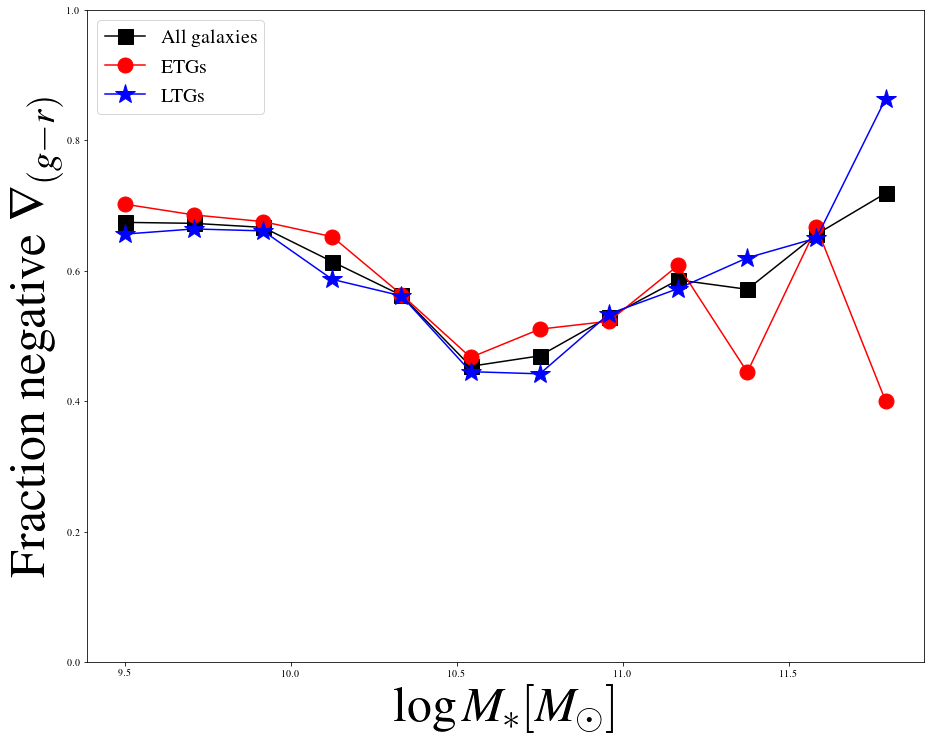

In [27]:
fig, ax= plt.subplots(figsize=(15,12))


# negative gradient fraction mass


plt.plot(gradgr_neg_count_bins[:-1], all_neg_gr_grad[0,:], zorder=3, color ='black', marker = 's', markersize= 15,  label= r'All galaxies')
plt.plot(gradgr_neg_early_count_bins[:-1], early_neg_gr_grad[0,:], zorder=3, color ='red', marker = 'o', markersize= 15,  label='ETGs ')
plt.plot(gradgr_neg_late_count_bins[:-1], late_neg_gr_grad[0,:], zorder=3, color ='blue', marker = '*', markersize= 20,  label='LTGs')


# Add axis labels

plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)
plt.ylabel(r'Fraction negative $\nabla_{(g-r)}$', fontsize=50)

#set axis limits
plt.ylim(0, 1)
# plt.xlim(8.9,12)

#adjust tick label font size
label_size = 25
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


plt.legend(fontsize=20)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/negfrac_Msgr_Pearly_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

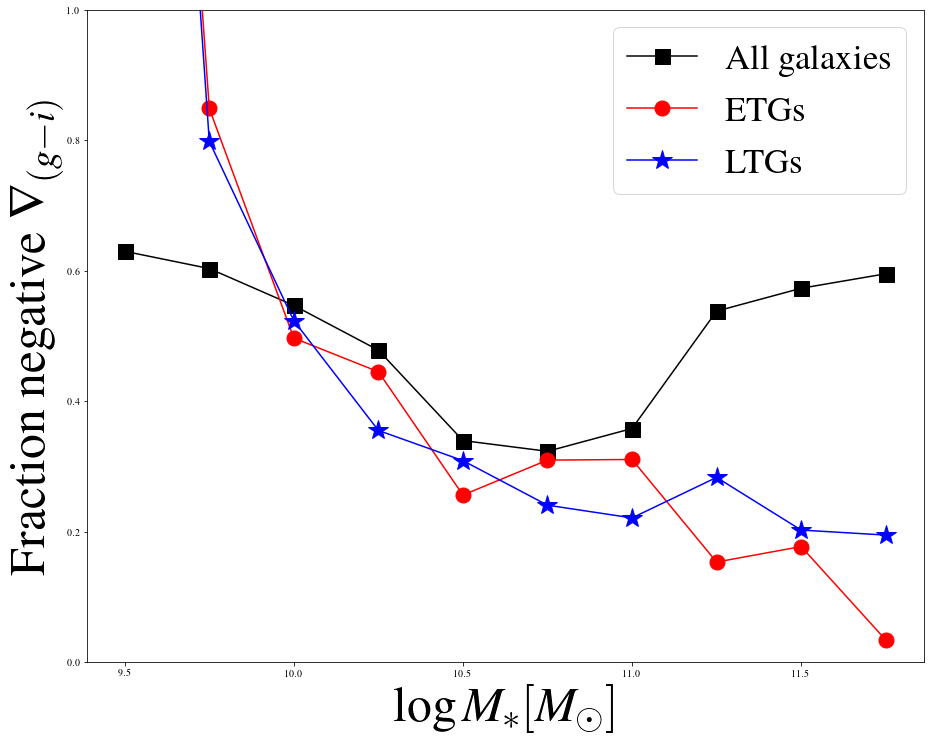

In [35]:
fig, ax= plt.subplots(figsize=(15,12))


# negative gradient fraction mass


plt.plot(gradgi_neg_count_bins[:-1], all_neg_gi_grad[0,:], zorder=3, color ='black', marker = 's', markersize= 15,  label= r'All galaxies')
plt.plot(gradgi_neg_early_count_bins[:-1], early_neg_gi_grad[0,:], zorder=3, color ='red', marker = 'o', markersize= 15,  label='ETGs ')
plt.plot(gradgi_neg_late_count_bins[:-1], late_neg_gi_grad[0,:], zorder=3, color ='blue', marker = '*', markersize= 20,  label='LTGs')


# Add axis labels

plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)
plt.ylabel(r'Fraction negative $\nabla_{(g-i)}$', fontsize=50)

#set axis limits
plt.ylim(0, 1)
# plt.xlim(8.9,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


plt.legend(fontsize=35)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/negfrac_Msgi_Pearly_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [149]:
##################### OVERALL FRACTIONS #################################

# pos_grad_gr_blue_early = np.where(grad_gr_blue_early_c >0)
# pos_grad_gr_red_early = np.where(grad_gr_red_early_c >0)

# print(np.shape(neg_grad_gr))
# print(len(gradiente_gr))
# print('fraction all galaxies with negative gr gradients: ', 6137/9784 )

# print(len(gradgr_early_c))
# print(np.shape(neg_grad_gr_early))
# print('fraction early-types with negative gr gradients: ', 3642/6083)
        
# print(len(grad_gr_blue_early_c))
# print(np.shape(pos_grad_gr_blue_early))
# print('fraction blue early-types with positive gr gradients: ', 1510/2430)

# print(len(grad_gr_red_early_c))
# print(np.shape(pos_grad_gr_red_early))
# print('fraction red early_types with positive gr gradients: ', 931/3653)

pos_grad_gi_blue_early = np.where(grad_gi_blue_early >0)
pos_grad_gi_red_early = np.where(grad_gi_red_early >0)

print(np.shape(neg_grad_gi))
print(len(gradiente_gi))
print('fraction all galaxies with negative gi gradients: ', 6137/9784 )

print(len(gradgi_early))
print(np.shape(neg_grad_gi_early))
print('fraction early-types with negative gi gradients: ', 3642/6083)
        
print(len(grad_gi_blue_early))
print(np.shape(pos_grad_gi_blue_early))
print('fraction blue early-types with positive gi gradients: ', 1510/2430)

print(len(grad_gi_red_early))
print(np.shape(pos_grad_gi_red_early))
print('fraction red early_types with positive gi gradients: ', 931/3653)


(1, 4953)
8895
fraction all galaxies with negative gi gradients:  0.6272485690923958
3497
(1, 1966)
fraction early-types with negative gi gradients:  0.5987177379582442
3020
(1, 1510)
fraction blue early-types with positive gi gradients:  0.6213991769547325
477
(1, 21)
fraction red early_types with positive gi gradients:  0.25485901998357513


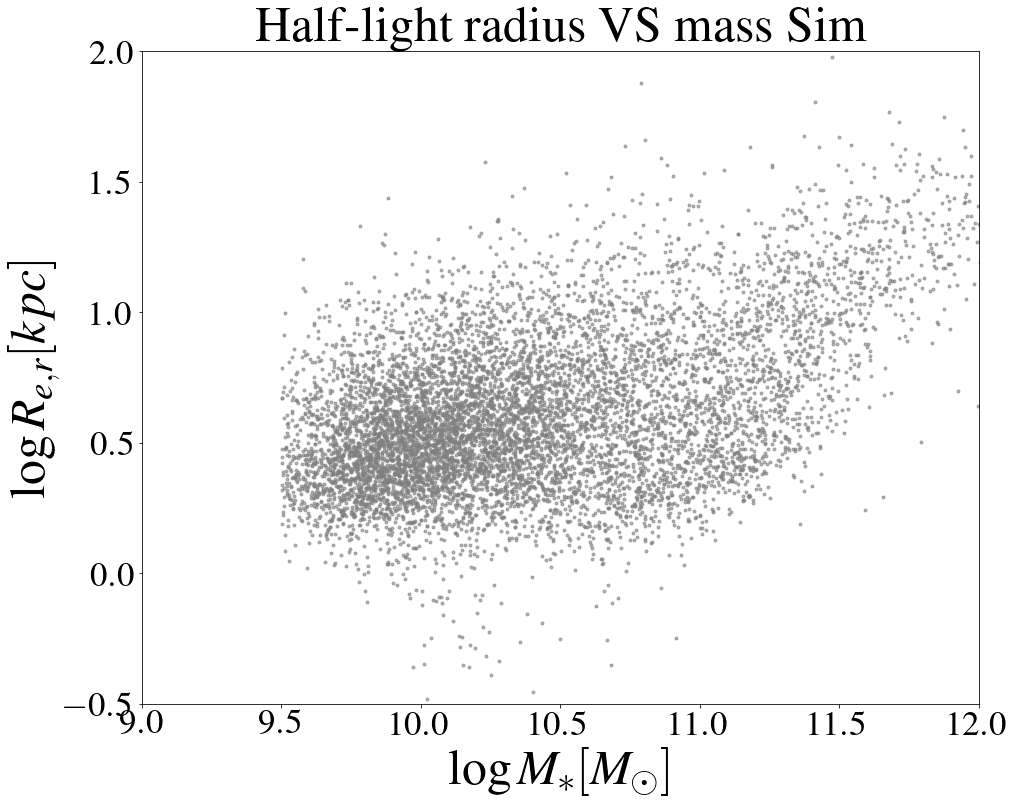

In [150]:
fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_d), np.log10(Re_r), marker='.', color='gray', alpha=0.6)

plt.title(r'Half-light radius VS mass Sim', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\log R_{e,r} [kpc]$', fontsize=50)

# #set axis limits
plt.ylim(-0.5, 2)
plt.xlim(9,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/rer_mass_sim.png',format='png',dpi=100, bbox_inches = 'tight')
plt.show()



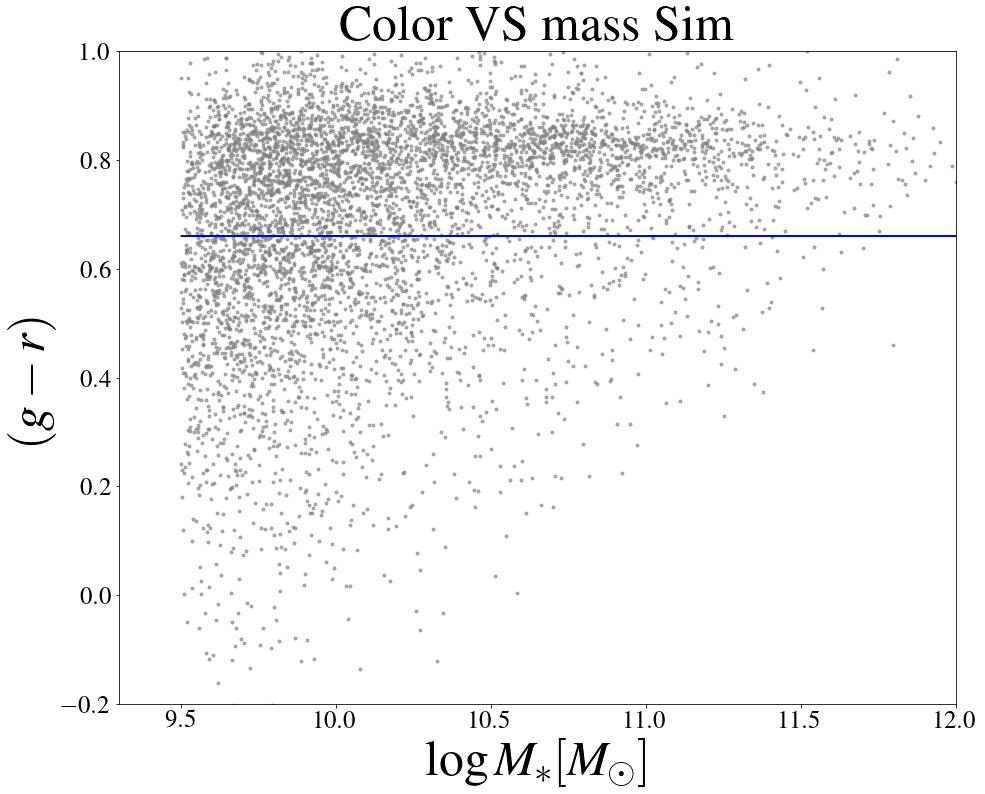

In [28]:
fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_d), gr, marker='.', color='gray', alpha=0.6)
plt.plot(np.log10(Ms_d), Ms_d*0 + 0.66, color='blue', ls='-')

plt.title(r'Color VS mass Sim', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$(g-r)$', fontsize=50)

# #set axis limits
plt.ylim(-0.2, 1.0)
plt.xlim(9.3,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/color_mass_gr_sim.png',format='png',dpi=100, bbox_inches = 'tight')
plt.show()


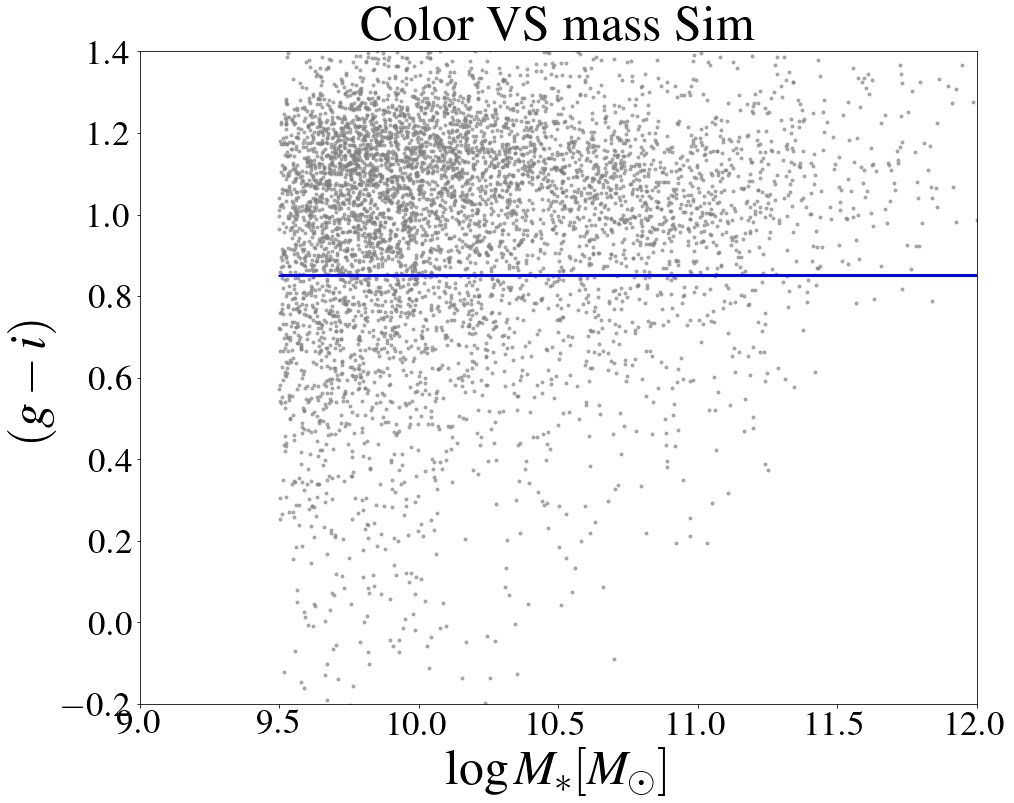

In [36]:
fig, ax= plt.subplots(figsize=(15,12))
#color as a function of mass 

plt.scatter(np.log10(Ms_d), gi, marker='.', color='gray', alpha=0.6)
plt.plot(np.log10(Ms_d), Ms_d*0 + 0.85, color='blue', ls='-')

plt.title(r'Color VS mass Sim', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$(g-i)$', fontsize=50)

# #set axis limits
plt.ylim(-0.2, 1.4)
plt.xlim(9.0,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/color_gi_mass_sim.png',format='png',dpi=100, bbox_inches = 'tight')
plt.show()


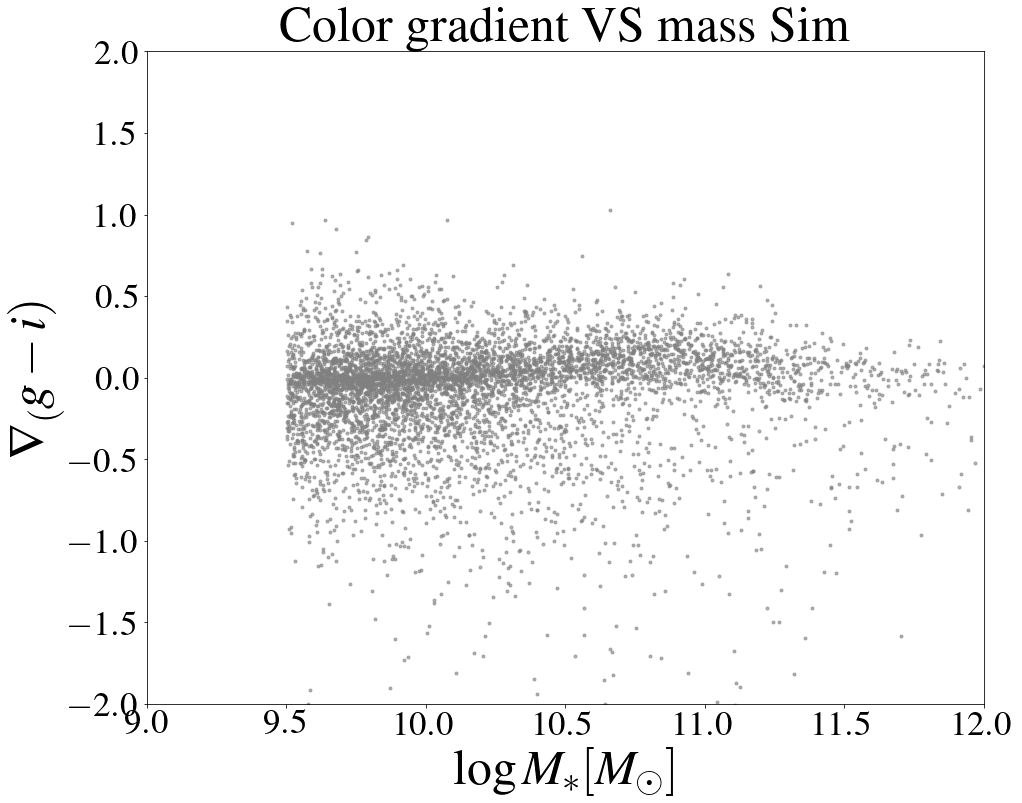

In [37]:
fig, ax= plt.subplots(figsize=(15,12))

# color gradiente as a function of mass

plt.scatter(np.log10(Ms_d), gradiente_gi, marker='.', color='gray', alpha=0.6)

plt.title(r'Color gradient VS mass Sim', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_(g-i)$', fontsize=50)

# # #set axis limits
plt.ylim(-2, 2)
plt.xlim(9.0,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/gradgi_mass_sim.png',format='png',dpi=200, bbox_inches = 'tight')
plt.show()


In [52]:
# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data, morphologies using concentration. All, ETGs ans LTGs

# plt.hist(gradiente_gr, 15, density=True, histtype='step', color='black', lw=6, label= r'All galaxies')
# plt.hist(gradgr_early_c, 15, density=True, histtype='step', color='red', lw=6, label= r'ETGs')
# plt.hist(gradgr_late_c, 15, density=True, histtype='step', color='blue', lw=6, label= r'LTGs')


# plt.xlabel(r'$ \nabla_{(g-r)}$', fontsize=50)
# plt.ylabel(r'P.D.F.', fontsize=50)
# # plt.title('Color gradients histogram')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 25
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size
# plt.grid(True)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/hist_gr_c_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

In [53]:
# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data, morphologies using gm20. All, ETGs ans LTGs
# plt.hist(gradiente_gr, 15, density=True, histtype='step', color='black', lw=6, label= r'All galaxies')
# plt.hist(gradgr_early_gm20, 15, density=True, histtype='step', color='red', lw=6, label= r'ETGs')
# plt.hist(gradgr_late_gm20, 15, density=True, histtype='step', color='blue', lw=6, label= r'LTGs')

# re_r_d_early_red = re_r_d_early[gr_red_early_c]
# re_r_d_early_blue = re_r_d_early[gr_blue_early_c]
# re_r_d_late_red = re_r_d_late[gr_red_late_c]
# re_r_d_late_blue = re_r_d_late[gr_blue_late_c]
# plt.xlabel(r'$ \nabla_{(g-r)}$', fontsize=50)
# plt.ylabel(r'P.D.F.', fontsize=50)
# plt.title('GM20')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 25
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size
# plt.grid(True)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/hist_gr_gm20_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

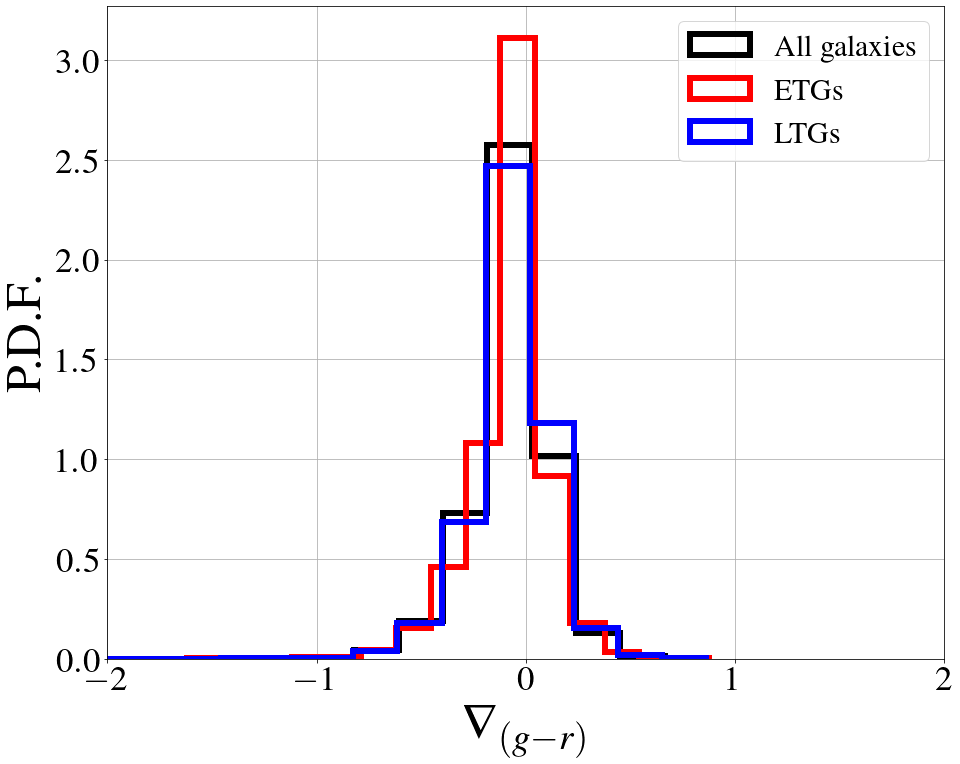

In [38]:
fig, ax= plt.subplots(figsize=(15,12))
# the histogram of the data, morphologies using Pearly. All, ETGs ans LTGs
# gradient between .1 and 1.0
plt.hist(gradiente_gr, 15, density=True, histtype='step', color='black', lw=6, label= r'All galaxies')
plt.hist(gradgr_early, 15, density=True, histtype='step', color='red', lw=6, label= r'ETGs')
plt.hist(gradgr_late, 15, density=True, histtype='step', color='blue', lw=6, label= r'LTGs')


plt.xlabel(r'$ \nabla_{(g-r)}$', fontsize=50)
plt.ylabel(r'P.D.F.', fontsize=50)
# plt.title('Pearly')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-2, 2)
plt.legend(fontsize=30)
# plt.ylim(0, 0.03)
label_size = 35
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.grid(True)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/hist_gr0.1_Pearly_sim.png',format='png',dpi=200, bbox_inches = 'tight')

plt.show()

In [34]:
# fig, ax= plt.subplots(figsize=(15,12))

# # the histogram of the data sersic index
# plt.hist(gradiente_gr, 15, density=True, histtype='step', color='black', lw=6, label= r'All galaxies')
# plt.hist(gradgr_early_n, 15, density=True, histtype='step', color='red', lw=6, label= r'ETGs')
# plt.hist(gradgr_late_n, 15, density=True, histtype='step', color='blue', lw=6, label= r'LTGs')


# plt.xlabel(r'$ \nabla_{(g-r)}$', fontsize=50)
# plt.ylabel(r'P.D.F.', fontsize=50)
# # plt.title('Color gradients histogram')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 25
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size
# plt.grid(True)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/hist_gr_n_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

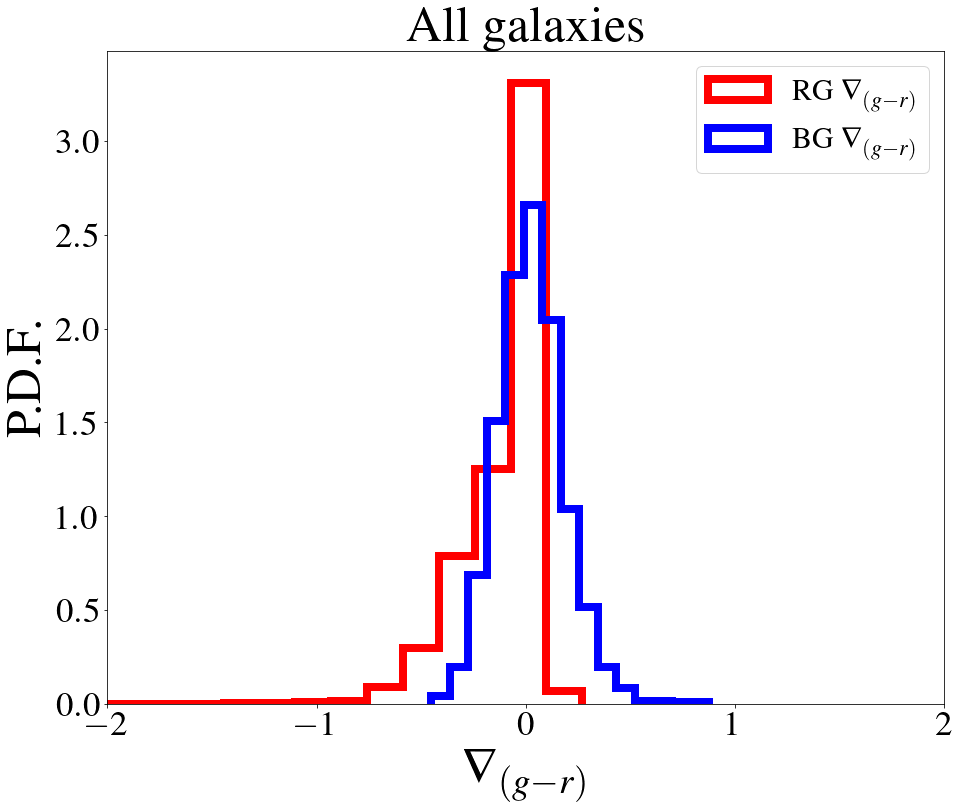

In [39]:
fig, ax= plt.subplots(figsize=(15,12))
# the histogram of the data Pearly, gradient at r_e= 0.1-1

plt.hist(grad_gr_red, 15, density=True, histtype='step', color='red', lw=8, label= r'RG $\nabla_{(g-r)}$')
plt.hist(grad_gr_blue, 15, density=True, histtype='step', color='blue', lw=8, label=r'BG $\nabla_{(g-r)}$')



plt.xlabel(r'$ \nabla_{(g-r)}$ ', fontsize=50)
plt.ylabel(r'P.D.F.', fontsize=50)
plt.title(r'All galaxies', fontsize=50)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-2, 2)
plt.legend(fontsize=30)
# plt.ylim(0, 0.03)
label_size = 35
matplotlib.rcParams['axes.titlesize'] = 50
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/hist_gr0.1_color_sim.png',format='png',dpi=200, bbox_inches = 'tight')

plt.show()

In [56]:

# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data
# plt.hist(grad_gr_red_early_c, 15, density=True, histtype='step', color='red', lw=8)
# plt.hist(grad_gr_blue_early_c, 15, density=True, histtype='step', color='blue', lw=8)



# plt.xlabel(r'$ \nabla_{(g-x)}$ ', fontsize=50)
# # plt.ylabel('Probability')
# plt.title(r'ETGs c', fontsize=50)
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 50
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr_color_early_c_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

In [57]:

# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data
# plt.hist(grad_gr_red_early_gm20, 15, density=True, histtype='step', color='red', lw=8)
# plt.hist(grad_gr_blue_early_gm20, 15, density=True, histtype='step', color='blue', lw=8)



# plt.xlabel(r'$ \nabla_{(g-x)}$ ', fontsize=50)
# # plt.ylabel('Probability')
# plt.title(r'ETGs gm20', fontsize=50)
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 50
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr_color_early_gm20_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

No handles with labels found to put in legend.


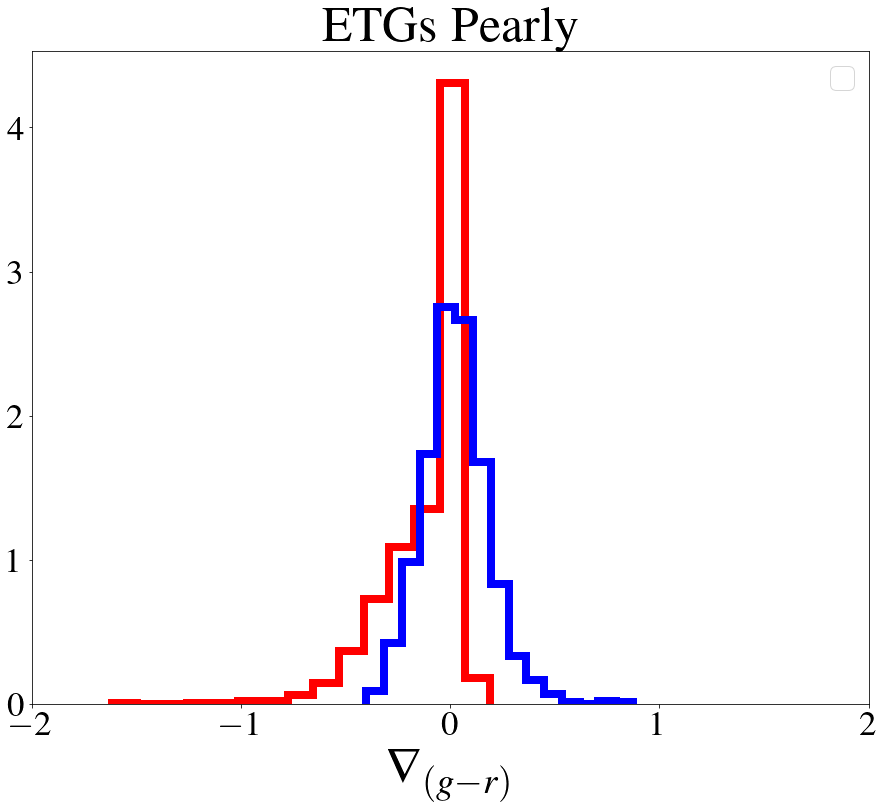

In [40]:

fig, ax= plt.subplots(figsize=(15,12))
# the histogram of the data Pearly, grad at r_e = 0.1-1.0
plt.hist(grad_gr_red_early, 15, density=True, histtype='step', color='red', lw=8)
plt.hist(grad_gr_blue_early, 15, density=True, histtype='step', color='blue', lw=8)



plt.xlabel(r'$ \nabla_{(g-r)}$ ', fontsize=50)
# plt.ylabel('Probability')
plt.title(r'ETGs Pearly', fontsize=50)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-2, 2)
plt.legend(fontsize=30)
# plt.ylim(0, 0.03)
label_size = 35
matplotlib.rcParams['axes.titlesize'] = 50
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr0.1_color_early_Pearly_sim.png',format='png',dpi=200, bbox_inches = 'tight')

plt.show()

In [38]:

# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data
# plt.hist(grad_gr_red_early_n, 15, density=True, histtype='step', color='red', lw=8)
# plt.hist(grad_gr_blue_early_n, 15, density=True, histtype='step', color='blue', lw=8)



# plt.xlabel(r'$ \nabla_{(g-x)}$ ', fontsize=50)
# # plt.ylabel('Probability')
# plt.title(r'ETGs n', fontsize=50)
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 50
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr_color_early_n_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

In [59]:

# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data
# plt.hist(grad_gr_red_late_c, 15, density=True, histtype='step', color='red', lw=8)
# plt.hist(grad_gr_blue_late_c, 15, density=True, histtype='step', color='blue', lw=8)



# plt.xlabel(r'$ \nabla_{(g-x)}$ ', fontsize=50)
# # plt.ylabel('Probability')
# plt.title(r'LTGs c')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 50
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr_color_late_c_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

In [60]:

# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data
# plt.hist(grad_gr_red_late_gm20, 15, density=True, histtype='step', color='red', lw=8)
# plt.hist(grad_gr_blue_late_gm20, 15, density=True, histtype='step', color='blue', lw=8)



# plt.xlabel(r'$ \nabla_{(g-x)}$ ', fontsize=50)
# # plt.ylabel('Probability')
# plt.title(r'LTGs gm20')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 50
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr_color_late_gm20_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

No handles with labels found to put in legend.


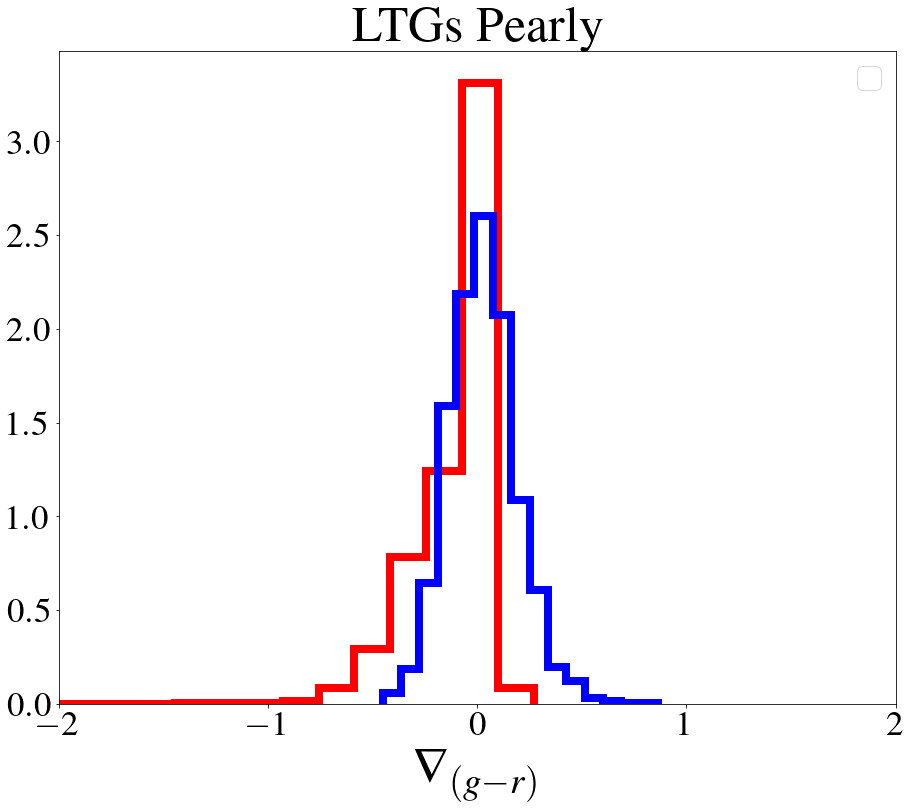

In [41]:

fig, ax= plt.subplots(figsize=(15,12))
# the histogram of the data, Pearly, grad at r_e = 0.1-1.0
plt.hist(grad_gr_red_late, 15, density=True, histtype='step', color='red', lw=8)
plt.hist(grad_gr_blue_late, 15, density=True, histtype='step', color='blue', lw=8)



plt.xlabel(r'$ \nabla_{(g-r)}$ ', fontsize=50)
# plt.ylabel('Probability')
plt.title(r'LTGs Pearly')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-2, 2)
plt.legend(fontsize=30)
# plt.ylim(0, 0.03)
label_size = 35
matplotlib.rcParams['axes.titlesize'] = 50
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr0.1_color_late_Pearly_sim.png',format='png',dpi=200, bbox_inches = 'tight')

plt.show()

In [41]:

# fig, ax= plt.subplots(figsize=(15,12))
# # the histogram of the data
# plt.hist(grad_gr_red_late_n, 15, density=True, histtype='step', color='red', lw=8)
# plt.hist(grad_gr_blue_late_n, 15, density=True, histtype='step', color='blue', lw=8)



# plt.xlabel(r'$ \nabla_{(g-x)}$ ', fontsize=50)
# # plt.ylabel('Probability')
# plt.title(r'LTGs n')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-2, 2)
# plt.legend(fontsize=30)
# # plt.ylim(0, 0.03)
# label_size = 35
# matplotlib.rcParams['axes.titlesize'] = 50
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim//hist_gr_color_late_n_sim.png',format='png',dpi=200, bbox_inches = 'tight')

# plt.show()

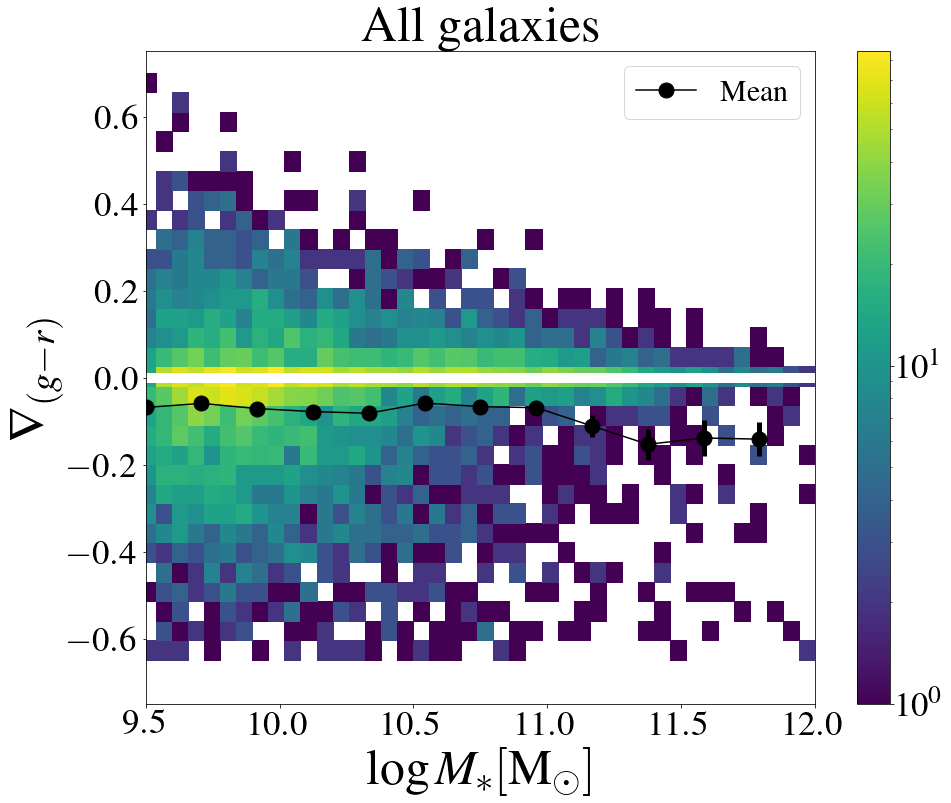

In [29]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  1 Re  VS Ms_d all  Diamond (for sim this is Zibetti g-r or g-i)
# grad from r_e = 0.1-1.0
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_d), gradiente_gr, bins=(50,30), range=[[9.0,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgr_mean_bins[:-1], stat_gradgr_mean, zorder=3, color ='black',  marker = 'o', markersize='15', label=r'Mean ')
plt.errorbar(gradgr_mean_bins[:-1], stat_gradgr_mean, yerr=stat_gradgr_std/np.sqrt(stat_gradgr_count +1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.clim(10, 100)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels
plt.title(r'All galaxies', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$ \nabla_{(g-r)}$', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr0.1_Msd_all_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

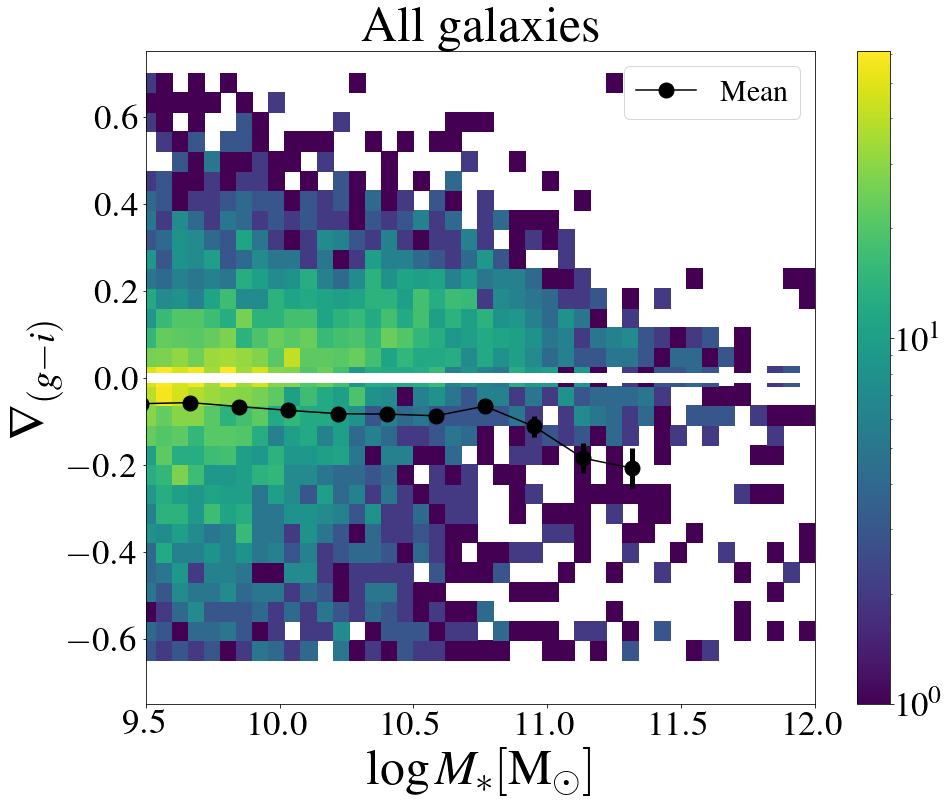

In [40]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  1 Re  VS Ms_d all  Diamond (for sim this is Zibetti g-r or g-i)
# grad from r_e = 0.1-1.0
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_d), gradiente_gi, bins=(50,30), range=[[9.0,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgi_mean_bins[:-1], stat_gradgi_mean, zorder=3, color ='black',  marker = 'o', markersize='15', label=r'Mean ')
plt.errorbar(gradgi_mean_bins[:-1], stat_gradgi_mean, yerr=stat_gradgi_std/np.sqrt(stat_gradgi_count +1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.clim(10, 100)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels
plt.title(r'All galaxies', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$ \nabla_{(g-i)}$', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgi0.1_Msd_all_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [63]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  1 Re  VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_c_early), gradgr_early_c, bins=(50,30), range=[[9.0,12],[-1.6,1.6]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_c_mean_bins[:-1], stat_gradgr_early_c_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
# plt.errorbar(gradgrearly_c_mean_bins[:-1], stat_gradgr_early_c_mean, yerr=stat_gradgr_early_c_std/np.sqrt(stat_gradgr_early_c_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
# plt.title(r'ETGs c', fontsize=50)

# #set axis limits
# plt.ylim(-1.5, 1.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# # plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_Msdearly_c_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [64]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  1 Re  VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gm20_early), gradgr_early_gm20, bins=(50,30), range=[[9.0,12],[-1.6,1.6]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_gm20_mean_bins[:-1], stat_gradgr_early_gm20_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
# plt.errorbar(gradgrearly_gm20_mean_bins[:-1], stat_gradgr_early_gm20_mean, yerr=stat_gradgr_early_gm20_std/np.sqrt(stat_gradgr_early_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
# plt.title(r'ETGs gm20', fontsize=50)

# #set axis limits
# plt.ylim(-1.5, 1.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# # plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_Msdearly_gm20_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

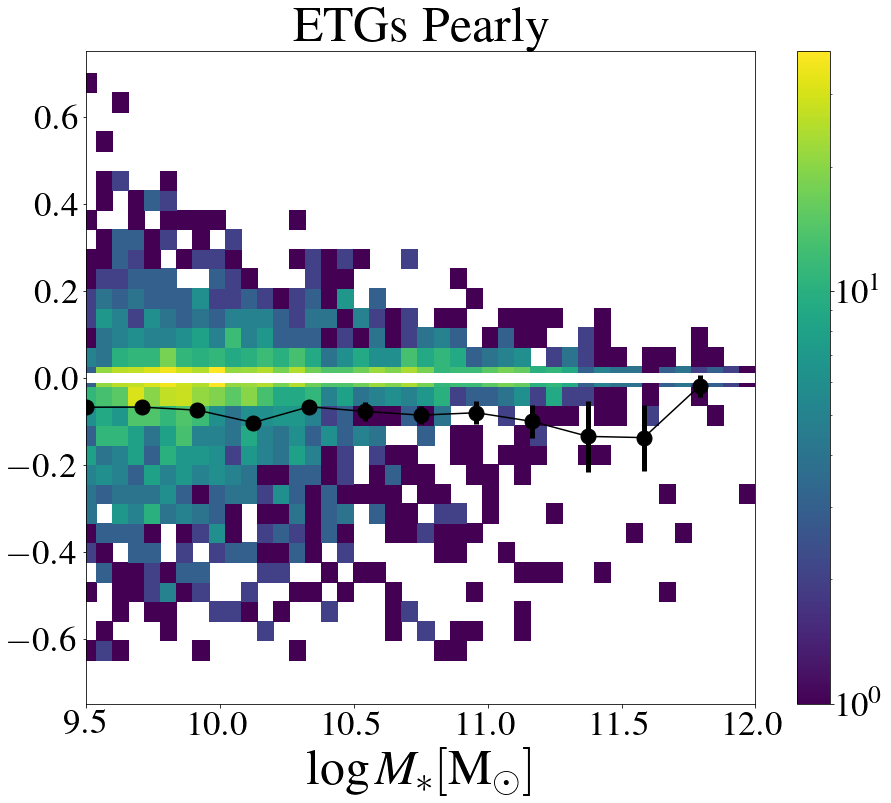

In [30]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr or gi  1 Re  VS Ms_d early  Diamond (Zibetti)
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_d_early), gradgr_early, bins=(50,30), range=[[9.0,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgrearly_mean_bins[:-1], stat_gradgr_early_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
plt.errorbar(gradgrearly_mean_bins[:-1], stat_gradgr_early_mean, yerr=stat_gradgr_early_std/np.sqrt(stat_gradgr_early_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
plt.title(r'ETGs Pearly', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr0.1_Msdearly_Pearly_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

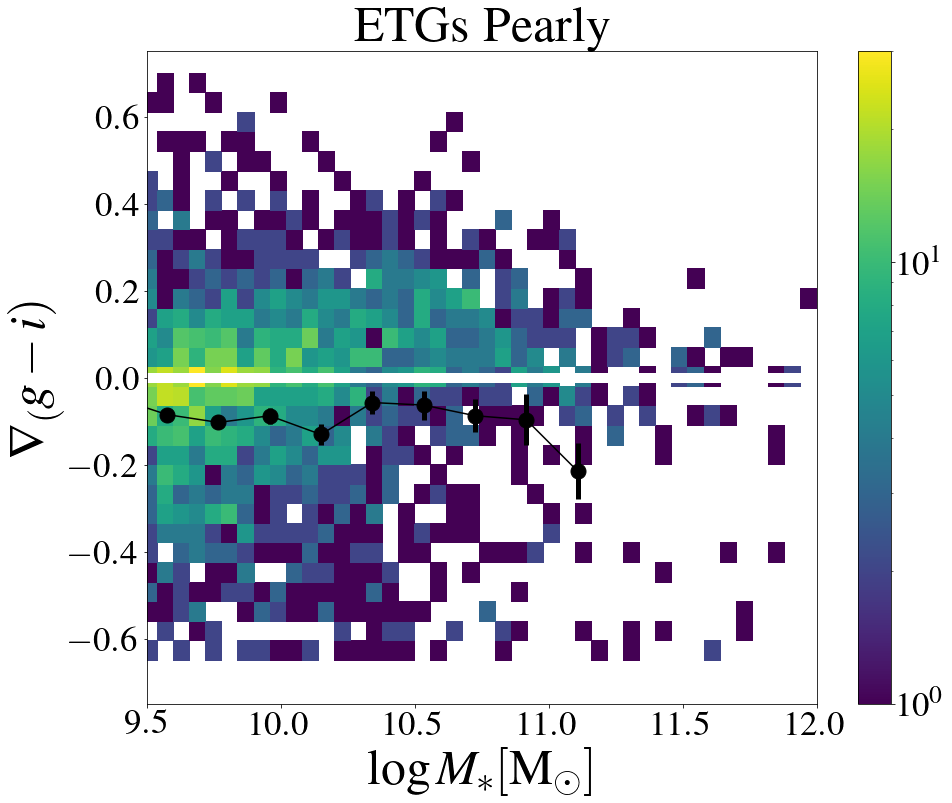

In [69]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr or gi  1 Re  VS Ms_d early  Diamond (Zibetti)
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_d_early), gradgi_early, bins=(50,30), range=[[9.0,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgiearly_mean_bins[:-1], stat_gradgi_early_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
plt.errorbar(gradgiearly_mean_bins[:-1], stat_gradgi_early_mean, yerr=stat_gradgi_early_std/np.sqrt(stat_gradgi_early_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$ \nabla_(g-i)$', fontsize=50)
plt.title(r'ETGs Pearly', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgi0.1_Msdearly_Pearly_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [45]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  1 Re  VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_n_early), gradgr_early_n, bins=(50,30), range=[[9.0,12],[-1.6,1.6]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_n_mean_bins[:-1], stat_gradgr_early_n_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
# plt.errorbar(gradgrearly_n_mean_bins[:-1], stat_gradgr_early_n_mean, yerr=stat_gradgr_early_n_std/np.sqrt(stat_gradgr_early_n_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
# plt.title(r'ETGs n', fontsize=50)

# #set axis limits
# plt.ylim(-1.5, 1.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# # plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_Msdearly_n_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [71]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  1 Re  VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_c_late), gradgr_late_c, bins=(50,30), range=[[9,12],[-1.6,1.6]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_c_mean_bins[:-1], stat_gradgr_late_c_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
# plt.errorbar(gradgrlate_c_mean_bins[:-1], stat_gradgr_late_c_mean, yerr=stat_gradgr_late_c_std/np.sqrt(stat_gradgr_late_c_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
# plt.title(r'LTGs c', fontsize=50)

# #set axis limits
# plt.ylim(-1.5, 1.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# # plt.legend(fontsize=20)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_Msdlate_c_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [72]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  1 Re  VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gm20_late), gradgr_late_gm20, bins=(50,30), range=[[9,12],[-1.6,1.6]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_gm20_mean_bins[:-1], stat_gradgr_late_gm20_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
# plt.errorbar(gradgrlate_gm20_mean_bins[:-1], stat_gradgr_late_gm20_mean, yerr=stat_gradgr_late_gm20_std/np.sqrt(stat_gradgr_late_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
# plt.title(r'LTGs gm20', fontsize=50)

# #set axis limits
# plt.ylim(-1.5, 1.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# # plt.legend(fontsize=20)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_Msdlate_gm20_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

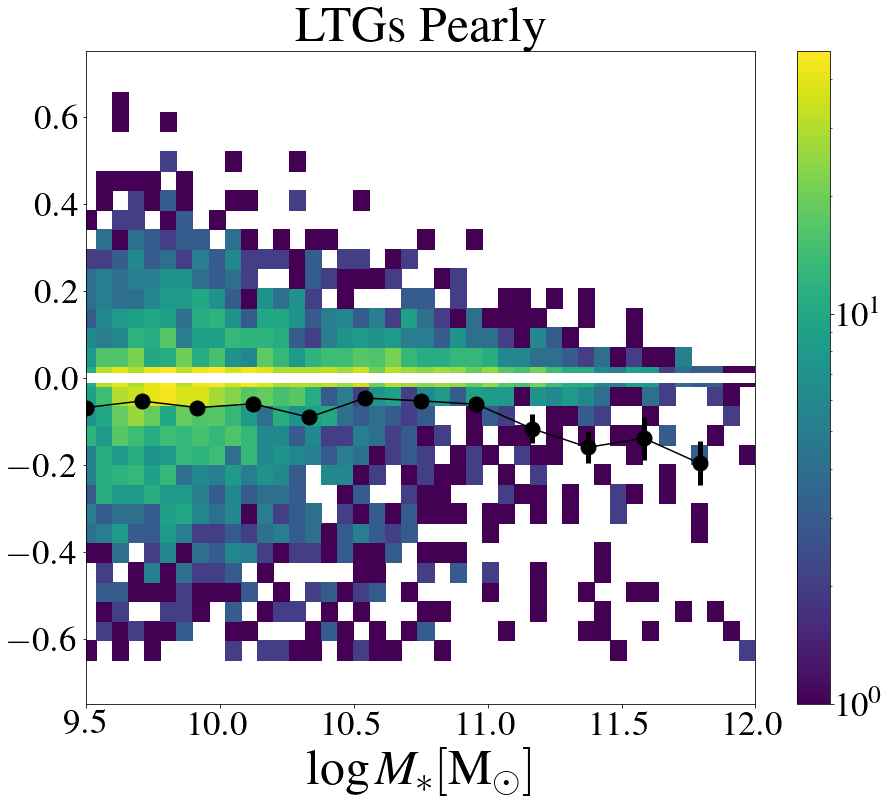

In [31]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr or gi  Re= 0.1-1  VS Ms_d late  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_d_late), gradgr_late, bins=(50,30), range=[[9,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgrlate_mean_bins[:-1], stat_gradgr_late_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
plt.errorbar(gradgrlate_mean_bins[:-1], stat_gradgr_late_mean, yerr=stat_gradgr_late_std/np.sqrt(stat_gradgr_late_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
plt.title(r'LTGs Pearly', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=20)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr0.1_Msdlate_Pearly5_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

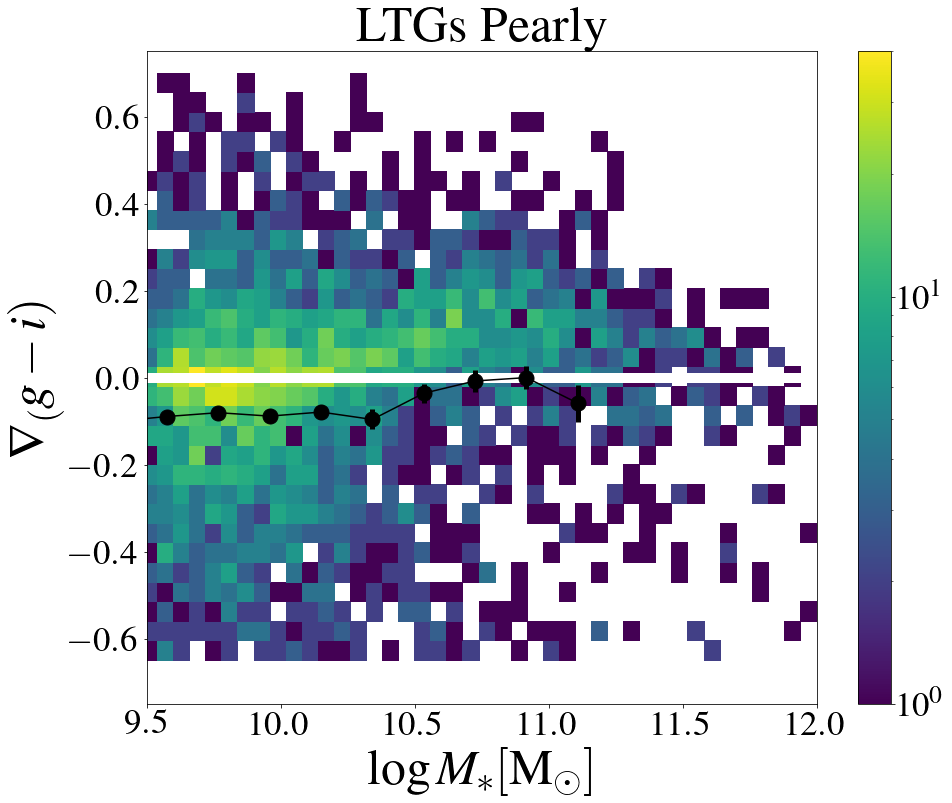

In [38]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr or gi  Re= 0.1-1  VS Ms_d late  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_d_late), gradgi_late, bins=(50,30), range=[[9,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgilate_mean_bins[:-1], stat_gradgi_late_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
plt.errorbar(gradgilate_mean_bins[:-1], stat_gradgi_late_mean, yerr=stat_gradgi_late_std/np.sqrt(stat_gradgi_late_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$ \nabla_(g-i)$', fontsize=50)
plt.title(r'LTGs Pearly', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=20)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgi0.1_Msdlate_Pearly5_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [48]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  1 Re  VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_n_late), gradgr_late_n, bins=(50,30), range=[[9,12],[-1.6,1.6]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_n_mean_bins[:-1], stat_gradgr_late_n_mean, zorder=3, color ='black', marker = 'o', markersize= 15)
# plt.errorbar(gradgrlate_n_mean_bins[:-1], stat_gradgr_late_n_mean, yerr=stat_gradgr_late_n_std/np.sqrt(stat_gradgr_late_n_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$ \nabla_(g-r)$', fontsize=50)
# plt.title(r'LTGs n', fontsize=50)

# #set axis limits
# plt.ylim(-1.5, 1.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# # plt.legend(fontsize=20)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_Msdlate_n_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [98]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Red color gradient gr 1 Re VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_red_early_c), grad_gr_red_early_c, bins=(50,30), range=[[9,12],[-1.5,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_c_red_mean_bins[:-1], stat_gradgr_red_early_c_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red ETGs c')
# plt.errorbar(gradgrearly_c_red_mean_bins[:-1], stat_gradgr_red_early_c_mean, yerr=stat_gradgr_red_early_c_std/np.sqrt(stat_gradgr_red_early_c_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

# #set axis limits
# plt.ylim(-2.0, 2.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr_Msdearly_c.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [99]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Red color gradient gr 1 Re VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_red_early_gm20), grad_gr_red_early_gm20, bins=(50,30), range=[[9,12],[-1.5,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_gm20_red_mean_bins[:-1], stat_gradgr_red_early_gm20_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red ETGs gm20')
# plt.errorbar(gradgrearly_gm20_red_mean_bins[:-1], stat_gradgr_red_early_gm20_mean, yerr=stat_gradgr_red_early_gm20_std/np.sqrt(stat_gradgr_red_early_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

# #set axis limits
# plt.ylim(-2.0, 2.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr_Msdearly_gm20.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

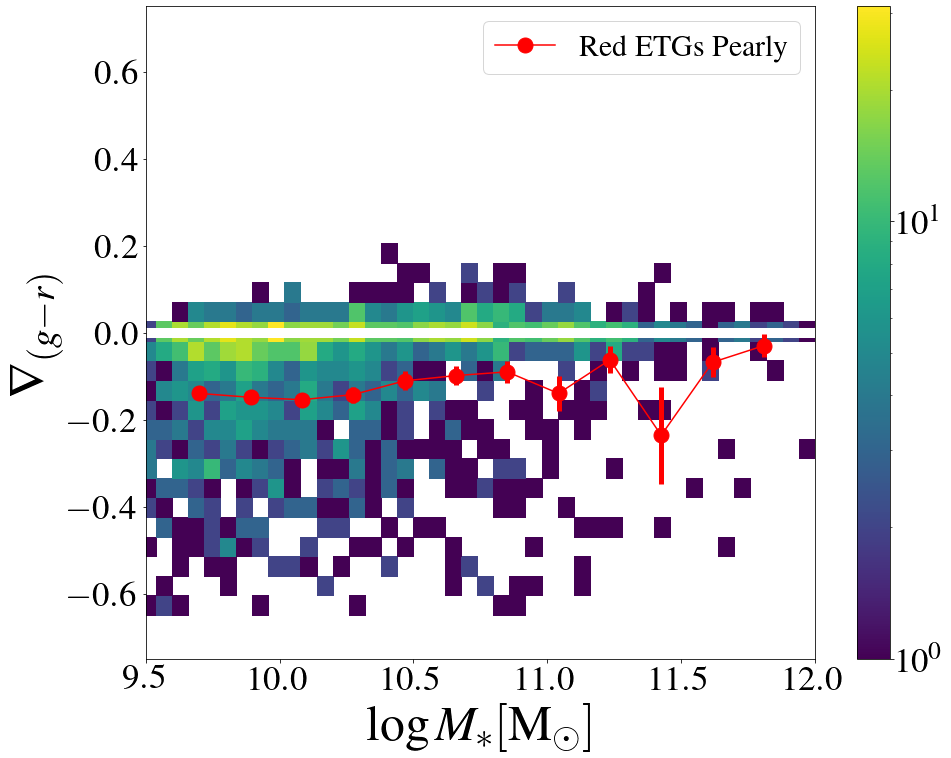

In [32]:
fig, ax= plt.subplots(figsize=(15,12))


# Red color gradient gr .1-1 Re VS Ms_d early  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gr_red_early), grad_gr_red_early, bins=(50,30), range=[[9,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgrearly_red_mean_bins[:-1], stat_gradgr_red_early_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red ETGs Pearly')
plt.errorbar(gradgrearly_red_mean_bins[:-1], stat_gradgr_red_early_mean, yerr=stat_gradgr_red_early_std/np.sqrt(stat_gradgr_red_early_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr0.1_Msdearly_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

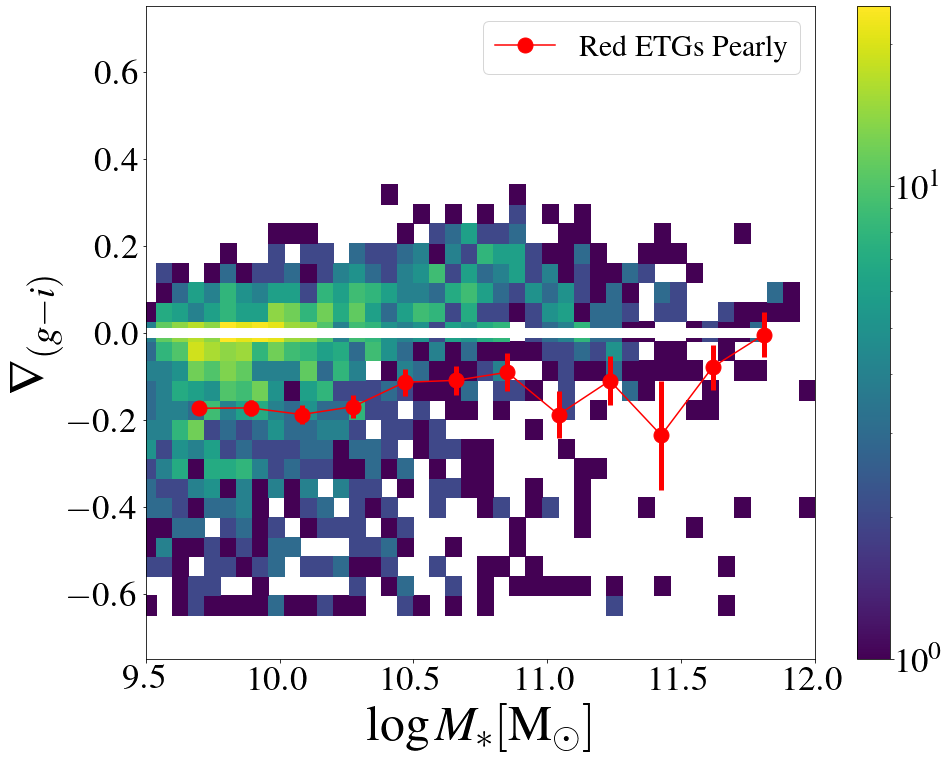

In [39]:
fig, ax= plt.subplots(figsize=(15,12))


# Red color gradient gr .1-1 Re VS Ms_d early  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gi_red_early), grad_gi_red_early, bins=(50,30), range=[[9,12],[-0.65,0.7]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgiearly_red_mean_bins[:-1], stat_gradgi_red_early_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red ETGs Pearly')
plt.errorbar(gradgiearly_red_mean_bins[:-1], stat_gradgi_red_early_mean, yerr=stat_gradgi_red_early_std/np.sqrt(stat_gradgi_red_early_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-i)}$', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgi0.1_Msdearly_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [65]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Red color gradient gr 1 Re VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_red_late_c), grad_gr_red_late_c, bins=(50,30), range=[[9,12],[-1.5,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_c_red_mean_bins[:-1], stat_gradgr_red_late_c_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red LTGs c')
# plt.errorbar(gradgrlate_c_red_mean_bins[:-1], stat_gradgr_red_late_c_mean, yerr=stat_gradgr_red_late_c_std/np.sqrt(stat_gradgr_red_late_c_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

# #set axis limits
# plt.ylim(-2.0, 2.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr_Msdlate_c.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [64]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Red color gradient gr 1 Re VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_red_late_gm20), grad_gr_red_late_gm20, bins=(50,30), range=[[9,12],[-1.5,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_gm20_red_mean_bins[:-1], stat_gradgr_red_late_gm20_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red LTGs gm20')
# plt.errorbar(gradgrlate_gm20_red_mean_bins[:-1], stat_gradgr_red_late_gm20_mean, yerr=stat_gradgr_red_late_gm20_std/np.sqrt(stat_gradgr_red_late_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

# #set axis limits
# plt.ylim(-2.0, 2.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr_Msdlate_gm20.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

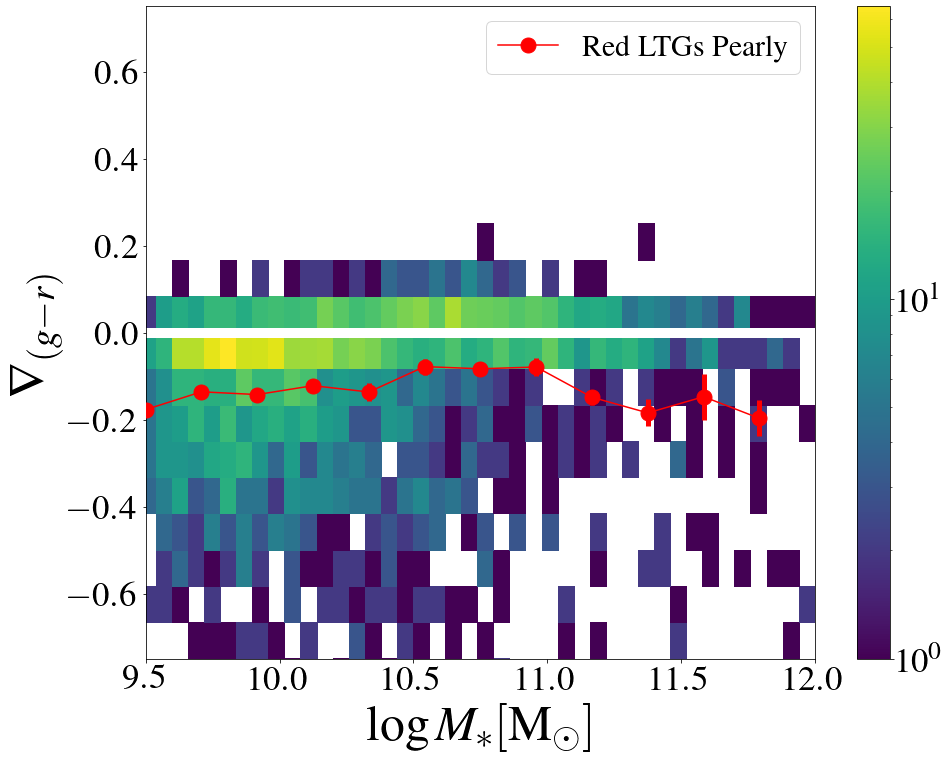

In [33]:
fig, ax= plt.subplots(figsize=(15,12))


# Red color gradient gr 1 Re VS Ms_d early  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gr_red_late), grad_gr_red_late, bins=(50,30), range=[[9,12],[-1.5,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgrlate_red_mean_bins[:-1], stat_gradgr_red_late_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red LTGs Pearly')
plt.errorbar(gradgrlate_red_mean_bins[:-1], stat_gradgr_red_late_mean, yerr=stat_gradgr_red_late_std/np.sqrt(stat_gradgr_red_late_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr0.1_Msdlate_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

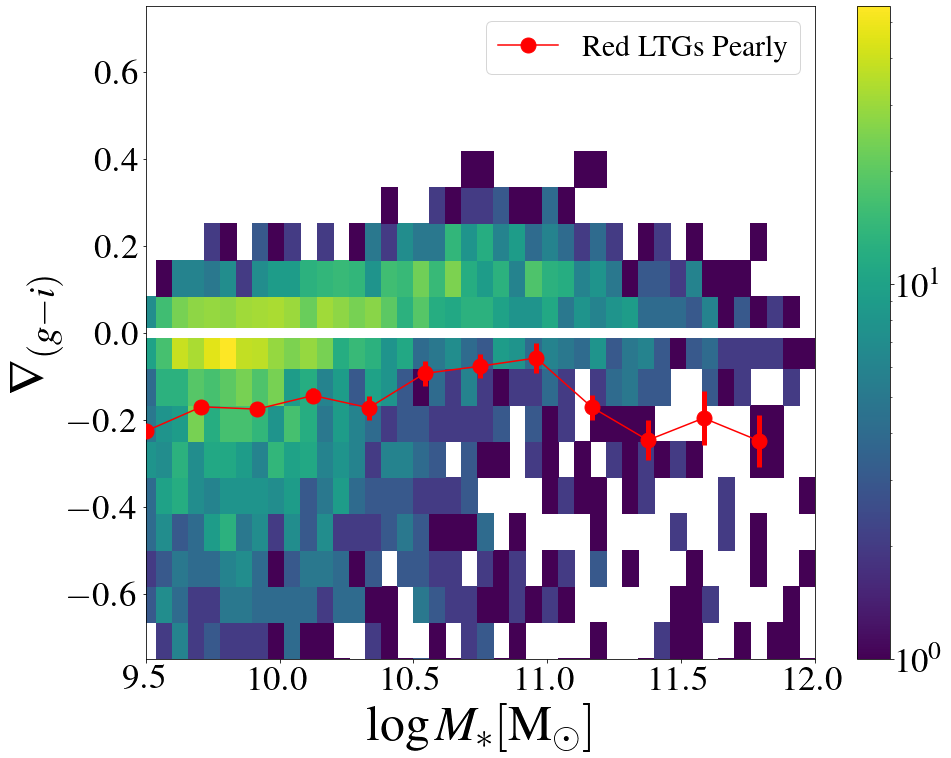

In [40]:
fig, ax= plt.subplots(figsize=(15,12))


# Red color gradient gr 1 Re VS Ms_d early  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gi_red_late), grad_gi_red_late, bins=(50,30), range=[[9,12],[-1.5,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgilate_red_mean_bins[:-1], stat_gradgi_red_late_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red LTGs Pearly')
plt.errorbar(gradgilate_red_mean_bins[:-1], stat_gradgi_red_late_mean, yerr=stat_gradgi_red_late_std/np.sqrt(stat_gradgi_red_late_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-i)}$', fontsize=50)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgi0.1_Msdlate_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [53]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Red color gradient gr 1 Re VS Ms_d early  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_red_early_n), grad_gr_red_early_n, bins=(50,30), range=[[9.5,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_n_red_mean_bins[:-1], stat_gradgr_red_early_n_mean, zorder=3, color ='red', marker = 'o', markersize= 15,  label='Red ETGs n')
# plt.errorbar(gradgrearly_n_red_mean_bins[:-1], stat_gradgr_red_early_n_mean, yerr=stat_gradgr_red_early_n_std/np.sqrt(stat_gradgr_red_early_n_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)

# #set axis limits
# plt.ylim(-1.0, 1.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/reddelgr_Msdearly_n.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [105]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Blue color gradient gr 1 Re VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_blue_late_c), grad_gr_blue_late_c, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_c_blue_mean_bins[:-1], stat_gradgr_blue_late_c_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue LTGs c')
# plt.errorbar(gradgrlate_c_blue_mean_bins[:-1], stat_gradgr_blue_late_c_mean, yerr=stat_gradgr_blue_late_c_std/np.sqrt(stat_gradgr_blue_late_c_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

# #set axis limits
# plt.ylim(-1.0, 1.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr_Msdlate_c.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [106]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Blue color gradient gr 1 Re VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_blue_late_gm20), grad_gr_blue_late_gm20, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_gm20_blue_mean_bins[:-1], stat_gradgr_blue_late_gm20_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue LTGs gm20')
# plt.errorbar(gradgrlate_gm20_blue_mean_bins[:-1], stat_gradgr_blue_late_gm20_mean, yerr=stat_gradgr_blue_late_gm20_std/np.sqrt(stat_gradgr_blue_late_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

# #set axis limits
# plt.ylim(-1.0, 1.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr_Msdlate_gm20.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

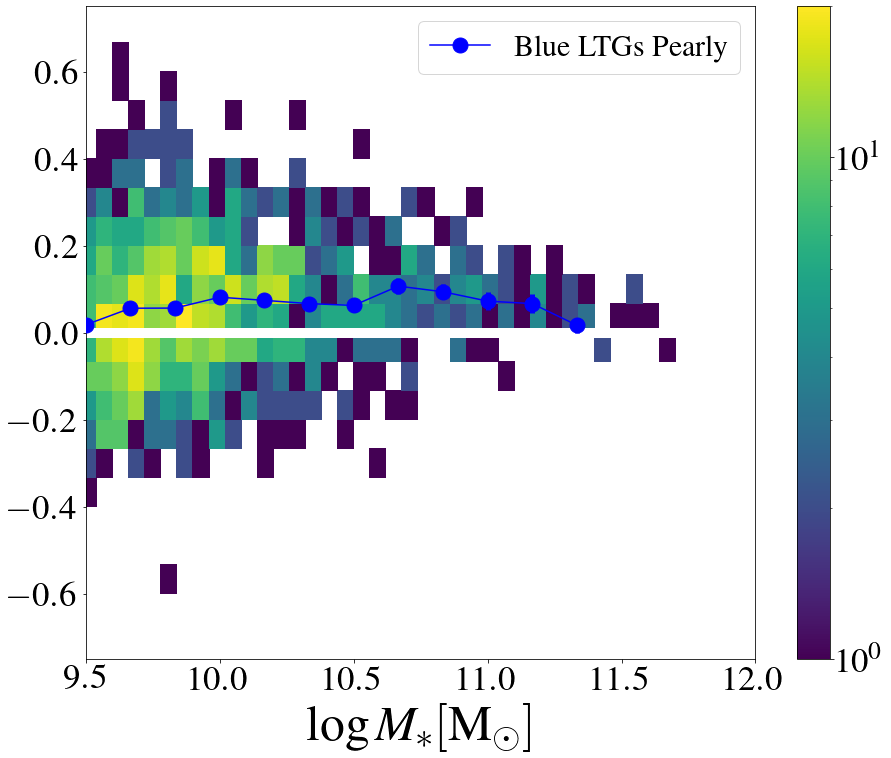

In [34]:
fig, ax= plt.subplots(figsize=(15,12))


# Blue color gradient gr 1 Re VS Ms_d late  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gr_blue_late), grad_gr_blue_late, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgrlate_blue_mean_bins[:-1], stat_gradgr_blue_late_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue LTGs Pearly')
plt.errorbar(gradgrlate_blue_mean_bins[:-1], stat_gradgr_blue_late_mean, yerr=stat_gradgr_blue_late_std/np.sqrt(stat_gradgr_blue_late_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr0.1_Msdlate_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

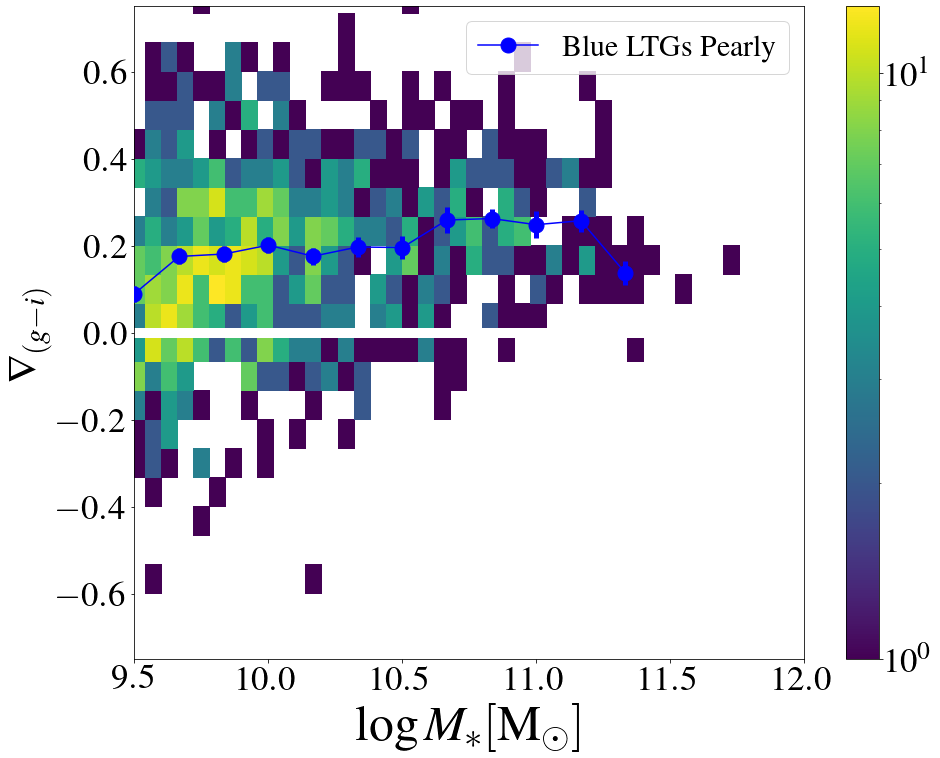

In [41]:
fig, ax= plt.subplots(figsize=(15,12))


# Blue color gradient gr 1 Re VS Ms_d late  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gi_blue_late), grad_gi_blue_late, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgilate_blue_mean_bins[:-1], stat_gradgi_blue_late_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue LTGs Pearly')
plt.errorbar(gradgilate_blue_mean_bins[:-1], stat_gradgi_blue_late_mean, yerr=stat_gradgi_blue_late_std/np.sqrt(stat_gradgi_blue_late_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
plt.colorbar() 
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-i)}$', fontsize=40)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgi0.1_Msdlate_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [108]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Blue color gradient gr 1 Re VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_blue_early_c), grad_gr_blue_early_c, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_c_blue_mean_bins[:-1], stat_gradgr_blue_early_c_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue ETGs c')
# plt.errorbar(gradgrearly_c_blue_mean_bins[:-1], stat_gradgr_blue_early_c_mean, yerr=stat_gradgr_blue_early_c_std/np.sqrt(stat_gradgr_blue_early_c_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

# #set axis limits
# plt.ylim(-1.0, 1.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr_Msdearly_c.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [109]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Blue color gradient gr 1 Re VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_blue_early_gm20), grad_gr_blue_early_gm20, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrearly_gm20_blue_mean_bins[:-1], stat_gradgr_blue_early_gm20_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue ETGs gm20')
# plt.errorbar(gradgrearly_gm20_blue_mean_bins[:-1], stat_gradgr_blue_early_gm20_mean, yerr=stat_gradgr_blue_early_gm20_std/np.sqrt(stat_gradgr_blue_early_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

# #set axis limits
# plt.ylim(-1.0, 1.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr_Msdearly_gm20.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

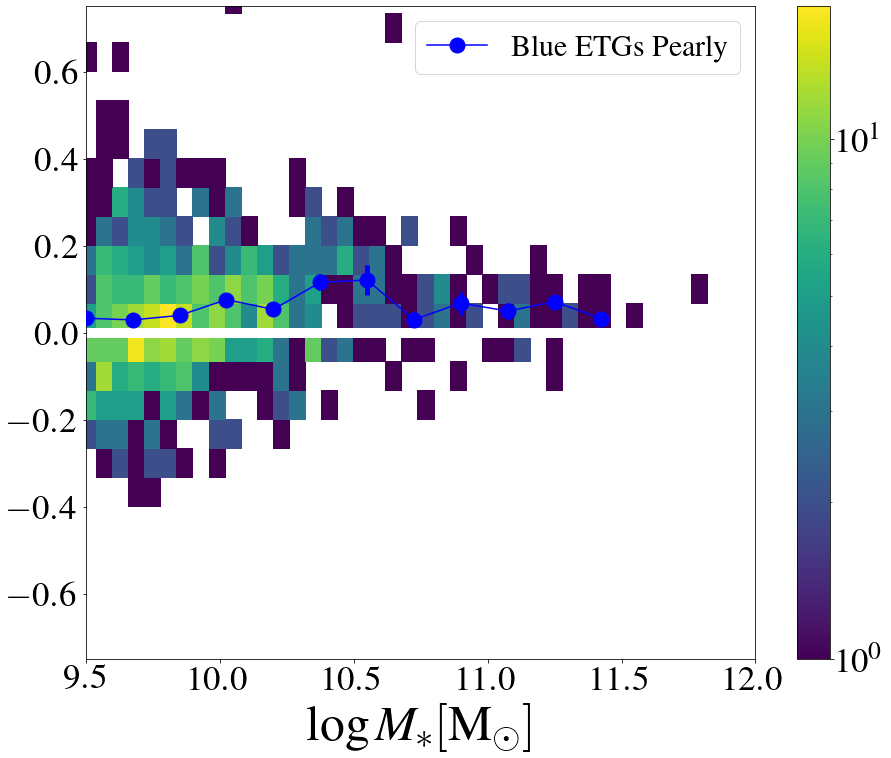

In [35]:
fig, ax= plt.subplots(figsize=(15,12))


# Blue color gradient gr 1 Re VS Ms_d late  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gr_blue_early), grad_gr_blue_early, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgrearly_blue_mean_bins[:-1], stat_gradgr_blue_early_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue ETGs Pearly')
plt.errorbar(gradgrearly_blue_mean_bins[:-1], stat_gradgr_blue_early_mean, yerr=stat_gradgr_blue_early_std/np.sqrt(stat_gradgr_blue_early_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
plt.colorbar() 
# plt.clim(.1, 40)
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr0.1_Msdearly_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

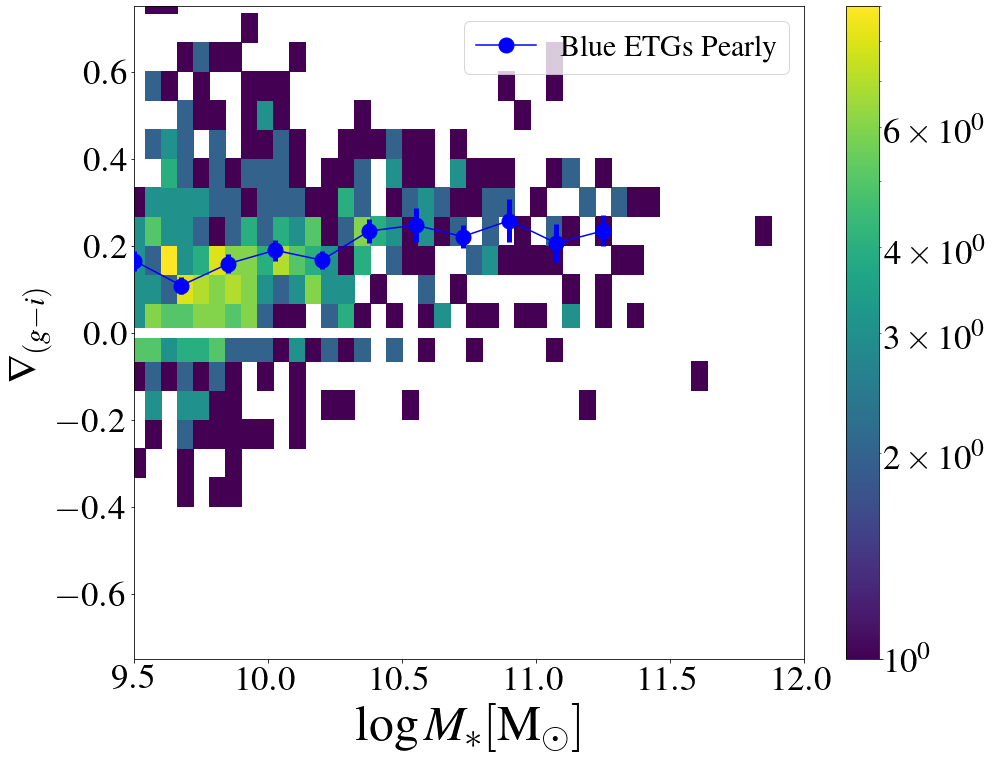

In [42]:
fig, ax= plt.subplots(figsize=(15,12))


# Blue color gradient gr 1 Re VS Ms_d late  Diamond
logMs= np.linspace(8,12)
plt.hist2d(np.log10(Ms_gi_blue_early), grad_gi_blue_early, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
plt.plot(gradgiearly_blue_mean_bins[:-1], stat_gradgi_blue_early_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue ETGs Pearly')
plt.errorbar(gradgiearly_blue_mean_bins[:-1], stat_gradgi_blue_early_mean, yerr=stat_gradgi_blue_early_std/np.sqrt(stat_gradgi_blue_early_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
plt.colorbar() 
# plt.clim(.1, 40)
x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-i)}$', fontsize=40)

#set axis limits
plt.ylim(-0.75, 0.75)
plt.xlim(9.5,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgi0.1_Msdearly_Pearly.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

[False False False ... False False False]


In [58]:
# fig, ax= plt.subplots(figsize=(15,12))


# # Blue color gradient gr 1 Re VS Ms_d late  Diamond
# logMs= np.linspace(8,12)
# plt.hist2d(np.log10(Ms_gr_blue_late_n), grad_gr_blue_late_n, bins=(50,30), range=[[9,12],[-1.0,1.0]], zorder=1, norm=LogNorm(), cmap='viridis')
# plt.plot(gradgrlate_n_blue_mean_bins[:-1], stat_gradgr_blue_late_n_mean, zorder=3, color ='blue', marker = 'o', markersize= 15,  label='Blue LTGs n')
# plt.errorbar(gradgrlate_n_blue_mean_bins[:-1], stat_gradgr_blue_late_n_mean, yerr=stat_gradgr_blue_late_n_std/np.sqrt(stat_gradgr_blue_late_n_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)
# plt.colorbar() 
# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)



# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=40)

# #set axis limits
# plt.ylim(-1.0, 1.0)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/bluedelgr_Msdlate_n.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

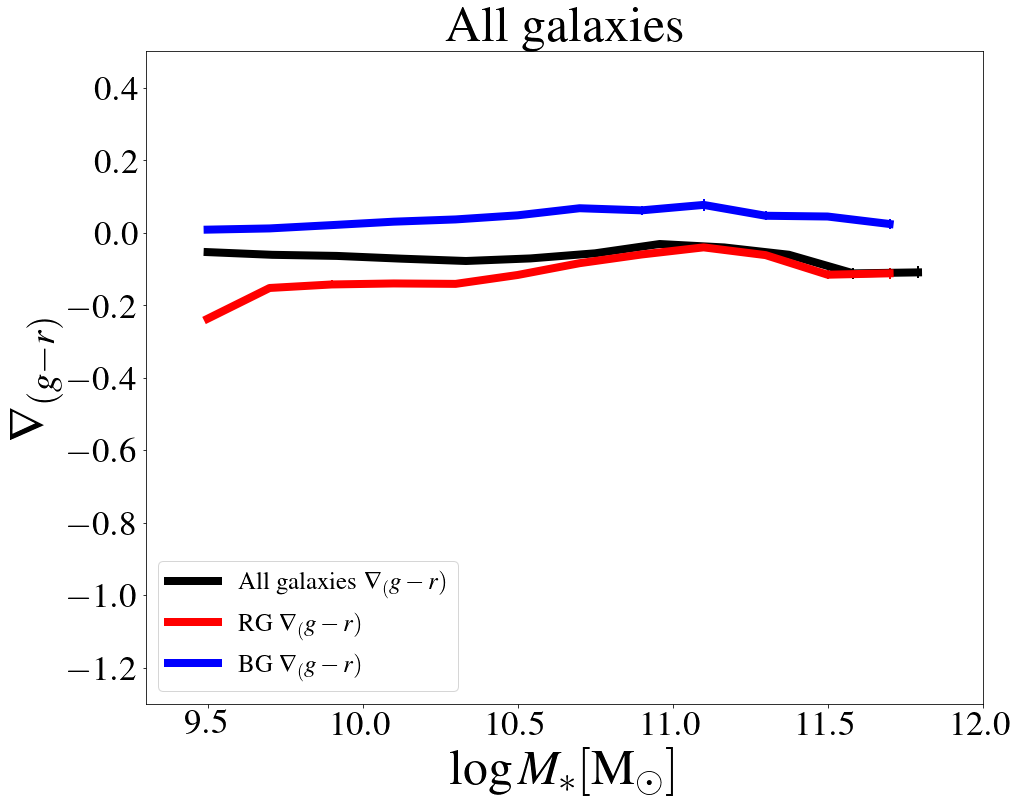

In [61]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  and gi mean 1 Re  VS Ms_d 
logMs= np.linspace(8,12)

plt.plot(gradgr_mean_bins[:-1], stat_gradgr_mean, zorder=3, color ='black', lw=8,  label= r'All galaxies $\nabla_(g-r)$  ')
plt.errorbar(gradgr_mean_bins[:-1], stat_gradgr_mean, yerr=stat_gradgr_std/np.sqrt(stat_gradgr_count +1),  xerr=None, ls='None', ecolor='black', elinewidth=2)
plt.plot(gradgr_red_mean_bins[:-1], stat_gradgr_red_mean, zorder=3, color ='red', lw=8,  label= r' RG $\nabla_(g-r)$  ')
plt.errorbar(gradgr_red_mean_bins[:-1], stat_gradgr_red_mean, yerr=stat_gradgr_red_std/np.sqrt(stat_gradgr_red_count +1),  xerr=None, ls='None', ecolor='red', elinewidth=2)
plt.plot(gradgr_blue_mean_bins[:-1], stat_gradgr_blue_mean, zorder=3, color ='blue', lw=8,  label= r'BG $\nabla_(g-r)$  ')
plt.errorbar(gradgr_blue_mean_bins[:-1], stat_gradgr_blue_mean, yerr=stat_gradgr_blue_std/np.sqrt(stat_gradgr_blue_count +1),  xerr=None, ls='None', ecolor='blue', elinewidth=2)



x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)
plt.title(r'All galaxies', fontsize=50)

#set axis limits
plt.ylim(-1.3, 0.5)
plt.xlim(9.3,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=25, loc='lower left')
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean0.1_Msd_all_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [56]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  and gi mean 1 Re early VS Ms_d 
# logMs= np.linspace(8,12)

# plt.plot(gradgrearly_c_mean_bins[:-1], stat_gradgr_early_c_mean, zorder=3, color ='black', lw=8, label=r'ETGs c $\nabla_{(g-r)}$')
# plt.errorbar(gradgrearly_c_mean_bins[:-1], stat_gradgr_early_c_mean, yerr=stat_gradgr_early_c_std/np.sqrt(stat_gradgr_early_c_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=2)
# plt.plot(gradgrearly_c_red_mean_bins[:-1], stat_gradgr_red_early_c_mean, zorder=3, color ='red',lw=8)
# plt.errorbar(gradgrearly_c_red_mean_bins[:-1], stat_gradgr_red_early_c_mean, yerr=stat_gradgr_red_early_c_std/np.sqrt(stat_gradgr_red_early_c_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=2)
# plt.plot(gradgrearly_c_blue_mean_bins[:-1], stat_gradgr_blue_early_c_mean, zorder=3, color ='blue', lw=8)
# plt.errorbar(gradgrearly_c_blue_mean_bins[:-1], stat_gradgr_blue_early_c_mean, yerr=stat_gradgr_blue_early_c_std/np.sqrt(stat_gradgr_blue_early_c_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=2)


# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_(g-x)$', fontsize=50)
# plt.title(r'ETGs', fontsize=50)

# #set axis limits
# plt.ylim(-1.3, 0.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30, loc='lower left')
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean_Msd_early_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

In [57]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  and gi mean 1 Re early VS Ms_d 
# logMs= np.linspace(8,12)

# plt.plot(gradgrearly_gm20_mean_bins[:-1], stat_gradgr_early_gm20_mean, zorder=3, color ='black', lw=8, label=r'ETGs gm20 $\nabla_{(g-r)}$')
# plt.errorbar(gradgrearly_gm20_mean_bins[:-1], stat_gradgr_early_gm20_mean, yerr=stat_gradgr_early_gm20_std/np.sqrt(stat_gradgr_early_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=2)
# plt.plot(gradgrearly_gm20_red_mean_bins[:-1], stat_gradgr_red_early_gm20_mean, zorder=3, color ='red',lw=8)
# plt.errorbar(gradgrearly_gm20_red_mean_bins[:-1], stat_gradgr_red_early_gm20_mean, yerr=stat_gradgr_red_early_gm20_std/np.sqrt(stat_gradgr_red_early_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=2)
# plt.plot(gradgrearly_gm20_blue_mean_bins[:-1], stat_gradgr_blue_early_gm20_mean, zorder=3, color ='blue', lw=8)
# plt.errorbar(gradgrearly_gm20_blue_mean_bins[:-1], stat_gradgr_blue_early_gm20_mean, yerr=stat_gradgr_blue_early_gm20_std/np.sqrt(stat_gradgr_blue_early_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=2)


# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_(g-x)$', fontsize=50)
# plt.title(r'ETGs GM20', fontsize=50)

# #set axis limits
# plt.ylim(-1.3, 0.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30, loc='lower left')
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean_Msd_early_gm20_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

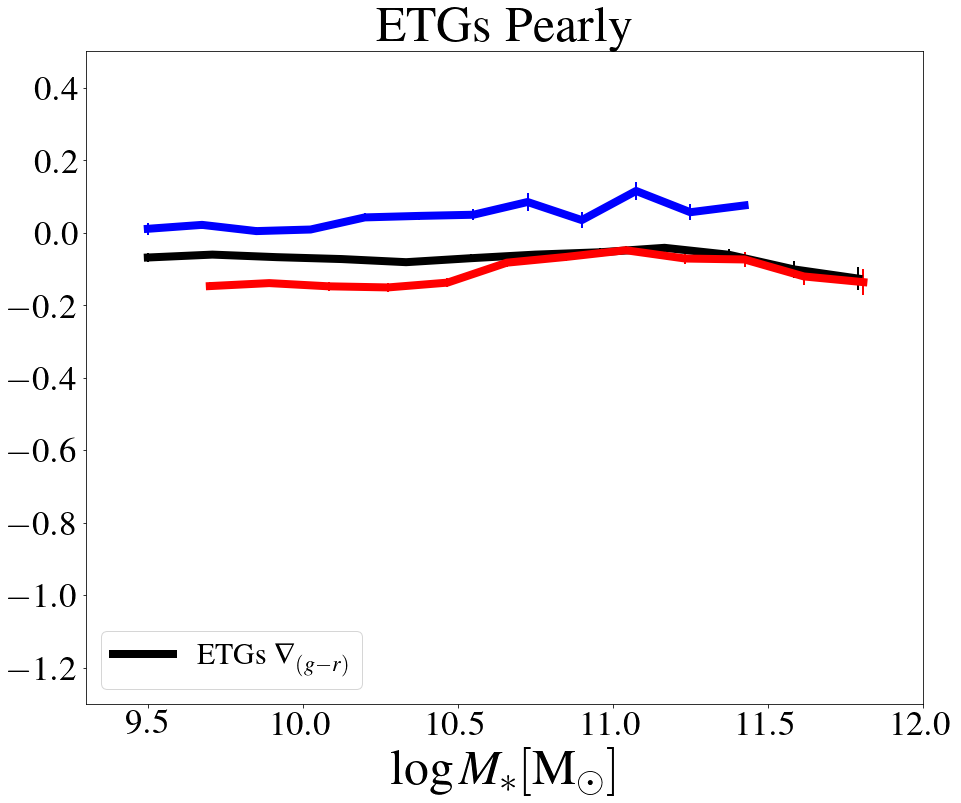

In [60]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  and gi mean 1 Re early VS Ms_d 
logMs= np.linspace(8,12)

plt.plot(gradgrearly_mean_bins[:-1], stat_gradgr_early_mean, zorder=3, color ='black', lw=8, label=r'ETGs  $\nabla_{(g-r)}$')
plt.errorbar(gradgrearly_mean_bins[:-1], stat_gradgr_early_mean, yerr=stat_gradgr_early_std/np.sqrt(stat_gradgr_early_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=2)
plt.plot(gradgrearly_red_mean_bins[:-1], stat_gradgr_red_early_mean, zorder=3, color ='red',lw=8)
plt.errorbar(gradgrearly_red_mean_bins[:-1], stat_gradgr_red_early_mean, yerr=stat_gradgr_red_early_std/np.sqrt(stat_gradgr_red_early_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=2)
plt.plot(gradgrearly_blue_mean_bins[:-1], stat_gradgr_blue_early_mean, zorder=3, color ='blue', lw=8)
plt.errorbar(gradgrearly_blue_mean_bins[:-1], stat_gradgr_blue_early_mean, yerr=stat_gradgr_blue_early_std/np.sqrt(stat_gradgr_blue_early_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=2)


x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_(g-x)$', fontsize=50)
plt.title(r'ETGs Pearly', fontsize=50)

#set axis limits
plt.ylim(-1.3, 0.5)
plt.xlim(9.3,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30, loc='lower left')
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean0.1_Msd_early_Pearly5_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

In [59]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  and gi mean 1 Re late VS Ms_d 
# logMs= np.linspace(8,12)

# plt.plot(gradgrlate_c_mean_bins[:-1], stat_gradgr_late_c_mean, zorder=3, color ='black', lw=8, label=r'LTGs c $\nabla_{(g-r)}$')
# plt.errorbar(gradgrlate_c_mean_bins[:-1], stat_gradgr_late_c_mean, yerr=stat_gradgr_late_c_std/np.sqrt(stat_gradgr_late_c_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=2)
# plt.plot(gradgrlate_c_red_mean_bins[:-1], stat_gradgr_red_late_c_mean, zorder=3, color ='red',lw=8)
# plt.errorbar(gradgrlate_c_red_mean_bins[:-1], stat_gradgr_red_late_c_mean, yerr=stat_gradgr_red_late_c_std/np.sqrt(stat_gradgr_red_late_c_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=2)
# plt.plot(gradgrlate_c_blue_mean_bins[:-1], stat_gradgr_blue_late_c_mean, zorder=3, color ='blue', lw=8)
# plt.errorbar(gradgrlate_c_blue_mean_bins[:-1], stat_gradgr_blue_late_c_mean, yerr=stat_gradgr_blue_late_c_std/np.sqrt(stat_gradgr_blue_late_c_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=2)



# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_(g-x)$', fontsize=50)
# plt.title(r'LTGs', fontsize=50)

# #set axis limits
# plt.ylim(-1.3, 0.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30, loc='lower left')
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean_Msd_late_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')

In [62]:
# fig, ax= plt.subplots(figsize=(15,12))


# # color gradient gr  and gi mean 1 Re late VS Ms_d 
# logMs= np.linspace(8,12)

# plt.plot(gradgrlate_gm20_mean_bins[:-1], stat_gradgr_late_gm20_mean, zorder=3, color ='black', lw=8, label=r'LTGs gm20 $\nabla_{(g-r)}$')
# plt.errorbar(gradgrlate_gm20_mean_bins[:-1], stat_gradgr_late_gm20_mean, yerr=stat_gradgr_late_gm20_std/np.sqrt(stat_gradgr_late_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=2)
# plt.plot(gradgrlate_gm20_red_mean_bins[:-1], stat_gradgr_red_late_gm20_mean, zorder=3, color ='red',lw=8)
# plt.errorbar(gradgrlate_gm20_red_mean_bins[:-1], stat_gradgr_red_late_gm20_mean, yerr=stat_gradgr_red_late_gm20_std/np.sqrt(stat_gradgr_red_late_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=2)
# plt.plot(gradgrlate_gm20_blue_mean_bins[:-1], stat_gradgr_blue_late_gm20_mean, zorder=3, color ='blue', lw=8)
# plt.errorbar(gradgrlate_gm20_blue_mean_bins[:-1], stat_gradgr_blue_late_gm20_mean, yerr=stat_gradgr_blue_late_gm20_std/np.sqrt(stat_gradgr_blue_late_gm20_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=2)



# x = [8.9,12]
# y = [0,0]
# plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# # Add axis labels

# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# # plt.ylabel(r'$\nabla_(g-x)$', fontsize=50)
# plt.title(r'LTGs GM20', fontsize=50)

# #set axis limits
# plt.ylim(-1.3, 0.5)
# plt.xlim(9.3,12)

# #adjust tick label font size
# label_size = 35
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30, loc='lower left')
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean_Msd_late_gm20_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')

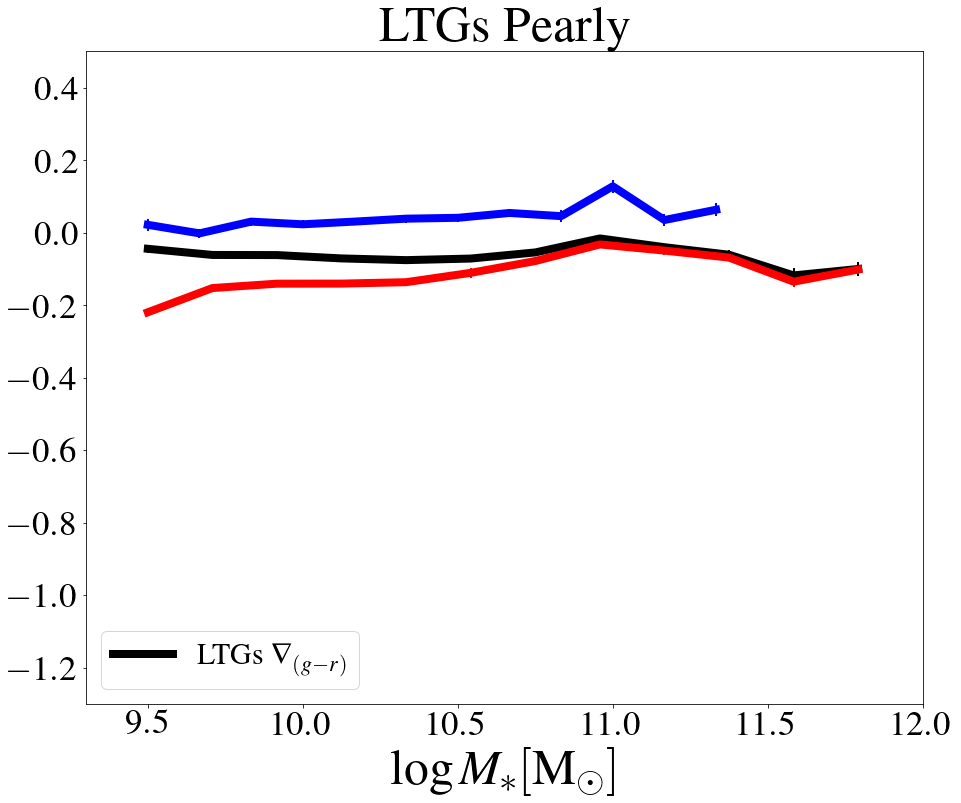

In [63]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  and gi mean 1 Re late VS Ms_d 
logMs= np.linspace(8,12)

plt.plot(gradgrlate_mean_bins[:-1], stat_gradgr_late_mean, zorder=3, color ='black', lw=8, label=r'LTGs  $\nabla_{(g-r)}$')
plt.errorbar(gradgrlate_mean_bins[:-1], stat_gradgr_late_mean, yerr=stat_gradgr_late_std/np.sqrt(stat_gradgr_late_count+1), zorder=3, xerr=None, ls='None', ecolor='black', elinewidth=2)
plt.plot(gradgrlate_red_mean_bins[:-1], stat_gradgr_red_late_mean, zorder=3, color ='red',lw=8)
plt.errorbar(gradgrlate_red_mean_bins[:-1], stat_gradgr_red_late_mean, yerr=stat_gradgr_red_late_std/np.sqrt(stat_gradgr_red_late_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=2)
plt.plot(gradgrlate_blue_mean_bins[:-1], stat_gradgr_blue_late_mean, zorder=3, color ='blue', lw=8)
plt.errorbar(gradgrlate_blue_mean_bins[:-1], stat_gradgr_blue_late_mean, yerr=stat_gradgr_blue_late_std/np.sqrt(stat_gradgr_blue_late_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=2)



x = [8.9,12]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

# Add axis labels

plt.xlabel(r'$\log M_{\ast} [\rm M_{\odot}]$ ', fontsize=50)
# plt.ylabel(r'$\nabla_(g-x)$', fontsize=50)
plt.title(r'LTGs Pearly', fontsize=50)

#set axis limits
plt.ylim(-1.3, 0.5)
plt.xlim(9.3,12)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30, loc='lower left')
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delmean0.1_Msd_late_Pearly5_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')

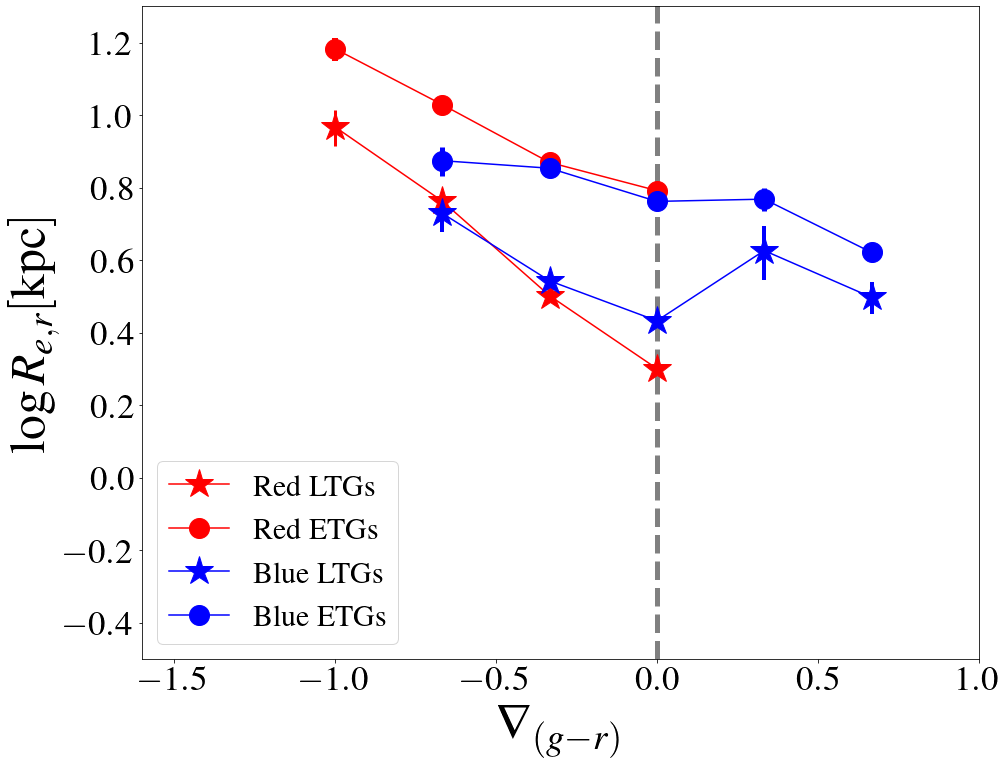

In [64]:

fig, ax= plt.subplots(figsize=(15,12))


rer_redlate_y_error_re_up =  np.log10(stat_grad_rer_late_red_mean+ stat_grad_rer_late_red_std/np.sqrt(stat_grad_rer_late_red_count+1))- np.log10(stat_grad_rer_late_red_mean)
rer_redlate_y_error_re_down = np.log10(stat_grad_rer_late_red_mean) - np.log10(stat_grad_rer_late_red_mean-stat_grad_rer_late_red_std/np.sqrt(stat_grad_rer_late_red_count+1))
rer_redlate_y_error = [rer_redlate_y_error_re_down, rer_redlate_y_error_re_up ]

rer_redearly_y_error_re_up =  np.log10(stat_grad_rer_early_red_mean+ stat_grad_rer_early_red_std/np.sqrt(stat_grad_rer_early_red_count+1))- np.log10(stat_grad_rer_early_red_mean)
rer_redearly_y_error_re_down = np.log10(stat_grad_rer_early_red_mean) - np.log10(stat_grad_rer_early_red_mean-stat_grad_rer_early_red_std/np.sqrt(stat_grad_rer_early_red_count+1))
rer_redearly_y_error = [rer_redearly_y_error_re_down, rer_redearly_y_error_re_up ]

rer_bluelate_y_error_re_up =  np.log10(stat_grad_rer_late_blue_mean+ stat_grad_rer_late_blue_std/np.sqrt(stat_grad_rer_late_blue_count+1))- np.log10(stat_grad_rer_late_blue_mean)
rer_bluelate_y_error_re_down = np.log10(stat_grad_rer_late_blue_mean) - np.log10(stat_grad_rer_late_blue_mean-stat_grad_rer_late_blue_std/np.sqrt(stat_grad_rer_late_blue_count+1))
rer_bluelate_y_error = [rer_bluelate_y_error_re_down, rer_bluelate_y_error_re_up ]

rer_blueearly_y_error_re_up =  np.log10(stat_grad_rer_early_blue_mean+ stat_grad_rer_early_blue_std/np.sqrt(stat_grad_rer_early_blue_count+1))- np.log10(stat_grad_rer_early_blue_mean)
rer_blueearly_y_error_re_down = np.log10(stat_grad_rer_early_blue_mean) - np.log10(stat_grad_rer_early_blue_mean-stat_grad_rer_early_blue_std/np.sqrt(stat_grad_rer_early_blue_count+1))
rer_blueearly_y_error = [rer_blueearly_y_error_re_down, rer_blueearly_y_error_re_up ]

# gradient vs Re_r mean
plt.plot(grad_rer_late_red_means_bins[:-1], np.log10(stat_grad_rer_late_red_mean), zorder=3,  color ='red', marker = '*', markersize= 30,  label=r'Red LTGs')
plt.errorbar(grad_rer_late_red_means_bins[:-1], np.log10(stat_grad_rer_late_red_mean), np.array(rer_redlate_y_error), fmt='r^', 
              xerr=None, ls='None', ecolor='red', elinewidth=3)
plt.plot(grad_rer_early_red_means_bins[:-1], np.log10(stat_grad_rer_early_red_mean), zorder=3,  color ='red', marker = 'o', markersize= 20,  label=r'Red ETGs ')
plt.errorbar(grad_rer_early_red_means_bins[:-1], np.log10(stat_grad_rer_early_red_mean), np.array(rer_redearly_y_error), fmt='r^', 
               xerr=None, ls='None', ecolor='red', elinewidth=6)
plt.plot(grad_rer_late_blue_means_bins[:-1], np.log10(stat_grad_rer_late_blue_mean), zorder=3,  color ='blue', marker = '*', markersize= 30,  label=r'Blue LTGs ')
plt.errorbar(grad_rer_late_blue_means_bins[:-1], np.log10(stat_grad_rer_late_blue_mean), np.array(rer_bluelate_y_error), fmt='r^', 
              xerr=None, ls='None', ecolor='blue', elinewidth=4)
plt.plot(grad_rer_early_blue_means_bins[:-1], np.log10(stat_grad_rer_early_blue_mean), zorder=3,  color ='blue', marker = 'o', markersize= 20,  label=r'Blue ETGs ')
plt.errorbar(grad_rer_early_blue_means_bins[:-1], np.log10(stat_grad_rer_early_blue_mean),  np.array(rer_blueearly_y_error), fmt='r^',
              xerr=None, ls='None', ecolor='blue', elinewidth=5)



y = [-0.5,1.5]
x = [0,0]
plt.plot(x, y, zorder = 2, color='gray', linestyle='--', lw=5)



# Add axis labels

plt.ylabel(r'$\log R_{e,r} [\rm kpc]$', fontsize=50)
plt.xlabel(r'$\nabla_{(g-r)}$ ', fontsize=50)

#set axis limits
plt.ylim(-.5,1.3)
plt.xlim(-1.6, 1.0)


#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/grad_rerD_mean_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

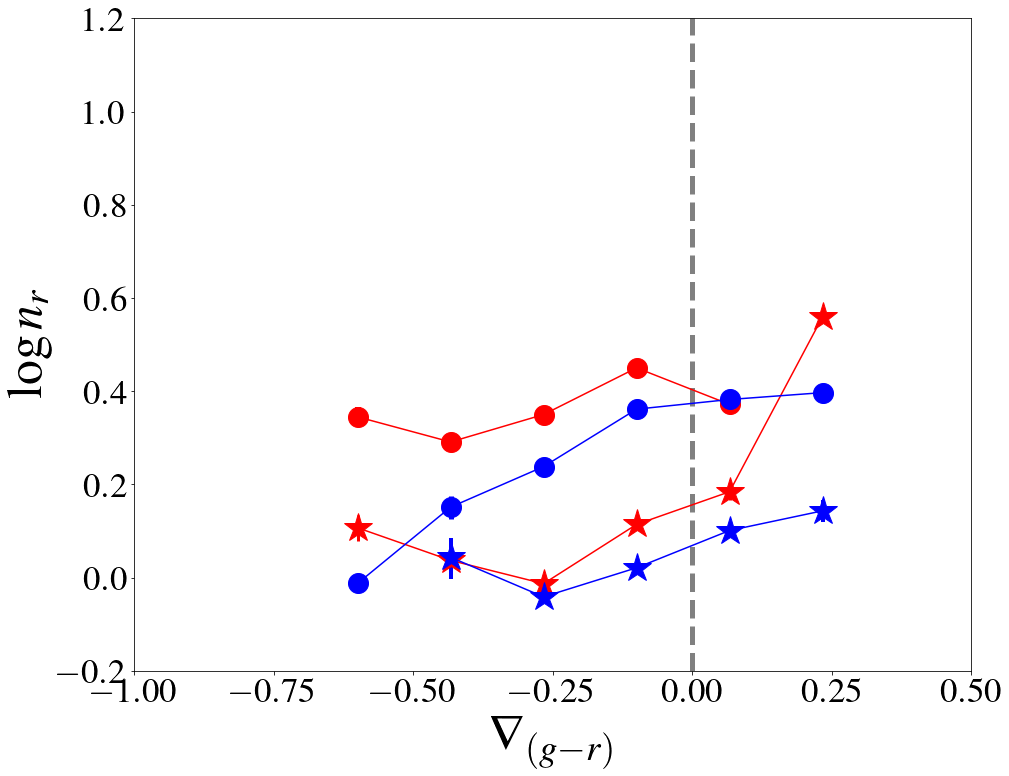

In [65]:
fig, ax= plt.subplots(figsize=(15,12))

nr_redlate_y_error_up =  np.log10(stat_grad_nr_late_red_mean+ stat_grad_nr_late_red_std/np.sqrt(stat_grad_nr_late_red_count+1))- np.log10(stat_grad_nr_late_red_mean)
nr_redlate_y_error_down = np.log10(stat_grad_nr_late_red_mean) - np.log10(stat_grad_nr_late_red_mean-stat_grad_nr_late_red_std/np.sqrt(stat_grad_nr_late_red_count+1))
nr_redlate_y_error = [nr_redlate_y_error_down, nr_redlate_y_error_up ]

nr_redearly_y_error_up =  np.log10(stat_grad_nr_early_red_mean+ stat_grad_nr_early_red_std/np.sqrt(stat_grad_nr_early_red_count+1))- np.log10(stat_grad_nr_early_red_mean)
nr_redearly_y_error_down = np.log10(stat_grad_nr_early_red_mean) - np.log10(stat_grad_nr_early_red_mean-stat_grad_nr_early_red_std/np.sqrt(stat_grad_nr_early_red_count+1))
nr_redearly_y_error = [nr_redearly_y_error_down, nr_redearly_y_error_up ]

nr_bluelate_y_error_up =  np.log10(stat_grad_nr_late_blue_mean+ stat_grad_nr_late_blue_std/np.sqrt(stat_grad_nr_late_blue_count+1))- np.log10(stat_grad_nr_late_blue_mean)
nr_bluelate_y_error_down = np.log10(stat_grad_nr_late_blue_mean) - np.log10(stat_grad_nr_late_blue_mean-stat_grad_nr_late_blue_std/np.sqrt(stat_grad_nr_late_blue_count+1))
nr_bluelate_y_error = [nr_bluelate_y_error_down, nr_bluelate_y_error_up ]

nr_blueearly_y_error_up =  np.log10(stat_grad_nr_early_blue_mean+ stat_grad_nr_early_blue_std/np.sqrt(stat_grad_nr_early_blue_count+1))- np.log10(stat_grad_nr_early_blue_mean)
nr_blueearly_y_error_down = np.log10(stat_grad_nr_early_blue_mean) - np.log10(stat_grad_nr_early_blue_mean-stat_grad_nr_early_blue_std/np.sqrt(stat_grad_nr_early_blue_count+1))
nr_blueearly_y_error = [nr_blueearly_y_error_down, nr_blueearly_y_error_up ]

# gradient gr Diamond vs n_r mean 
plt.plot(grad_nr_late_red_means_bins[:-1], np.log10(stat_grad_nr_late_red_mean), zorder=3,  color ='red', marker = '*', markersize= 30,  label=r'Red LTGs ')
plt.errorbar(grad_nr_late_red_means_bins[:-1], np.log10(stat_grad_nr_late_red_mean), np.array(nr_redlate_y_error), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=3)

plt.plot(grad_nr_early_red_means_bins[:-1], np.log10(stat_grad_nr_early_red_mean), zorder=3,  color ='red', marker = 'o', markersize= 20,  label=r'Red ETGs ')
plt.errorbar(grad_nr_early_red_means_bins[:-1], np.log10(stat_grad_nr_early_red_mean), np.array(nr_redearly_y_error), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=6)

plt.plot(grad_nr_late_blue_means_bins[:-1], np.log10(stat_grad_nr_late_blue_mean), zorder=3,  color ='blue', marker = '*', markersize= 30,  label=r'Blue LTGs ')
plt.errorbar(grad_nr_late_blue_means_bins[:-1], np.log10(stat_grad_nr_late_blue_mean), np.array(nr_bluelate_y_error), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=4)

plt.plot(grad_nr_early_blue_means_bins[:-1], np.log10(stat_grad_nr_early_blue_mean), zorder=3,  color ='blue', marker = 'o', markersize= 20,  label=r'Blue ETGs ')
plt.errorbar(grad_nr_early_blue_means_bins[:-1], np.log10(stat_grad_nr_early_blue_mean), np.array(nr_blueearly_y_error), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)

x = [-0.5,1.2]
y = [0,0]
plt.plot(y, x, zorder = 2, color='gray', linestyle='--', lw=5)

# Add axis labels

plt.ylabel(r'$\log n_r $', fontsize=50)
plt.xlabel(r'$\nabla_{(g-r)}$', fontsize=50)

#set axis limits
plt.ylim(-0.2,1.2)
plt.xlim(-1, .5)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/grad_nrD_mean_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

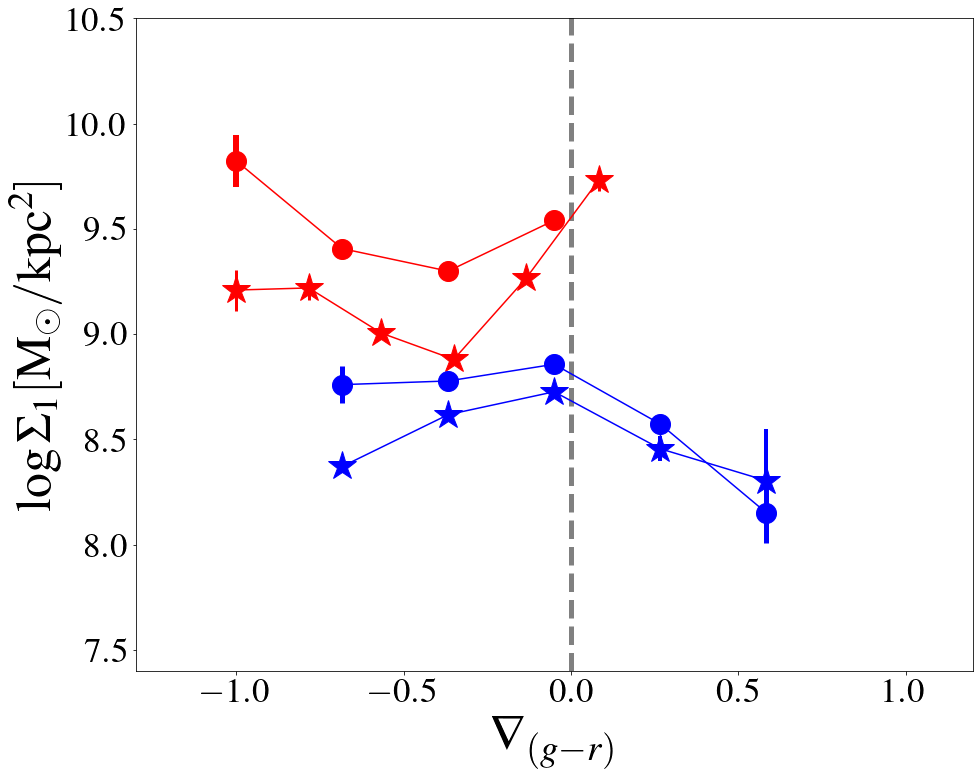

In [66]:
fig, ax= plt.subplots(figsize=(15,12))

# gradient gr Diamond vs Sigma1 mean

plt.plot(grad_S1_late_red_means_bins[:-1], stat_grad_S1_late_red_mean, zorder=3,  color ='red', marker = '*', markersize= 30,  label='Red late-type ')
plt.errorbar(grad_S1_late_red_means_bins[:-1], stat_grad_S1_late_red_mean, yerr=stat_grad_S1_late_red_std/np.sqrt(stat_grad_S1_late_red_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=3)
plt.plot(grad_S1_early_red_means_bins[:-1], stat_grad_S1_early_red_mean, zorder=3,  color ='red', marker = 'o', markersize= 20,  label='Red early-type ')
plt.errorbar(grad_S1_early_red_means_bins[:-1], stat_grad_S1_early_red_mean, yerr=stat_grad_S1_early_red_std/np.sqrt(stat_grad_S1_early_red_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=6)

plt.plot(grad_S1_late_blue_means_bins[:-1], stat_grad_S1_late_blue_mean, zorder=3,  color ='blue', marker = '*', markersize= 30,  label='Blue late-type ')
plt.errorbar(grad_S1_late_blue_means_bins[:-1], stat_grad_S1_late_blue_mean, yerr=stat_grad_S1_late_blue_std/np.sqrt(stat_grad_S1_late_blue_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=4)
plt.plot(grad_S1_early_blue_means_bins[:-1], stat_grad_S1_early_blue_mean, zorder=3,  color ='blue', marker = 'o', markersize= 20,  label='Blue early-type ')
plt.errorbar(grad_S1_early_blue_means_bins[:-1], stat_grad_S1_early_blue_mean, yerr=stat_grad_S1_early_blue_std/np.sqrt(stat_grad_S1_early_blue_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)

y = [6.5,11]
x = [0,0]
plt.plot(x, y, zorder = 2, color='gray', linestyle='--', lw=5)

# Add axis labels

plt.ylabel(r'$\log \Sigma_{1} [\rm M_{\odot}/ kpc^{2}]$', fontsize=50)
plt.xlabel(r'$\nabla_{(g-r)}$', fontsize=50)

#set axis limits
plt.ylim(7.4,10.5)
plt.xlim(-1.3, 1.2)


#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=20)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/grad_S1D_mean_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

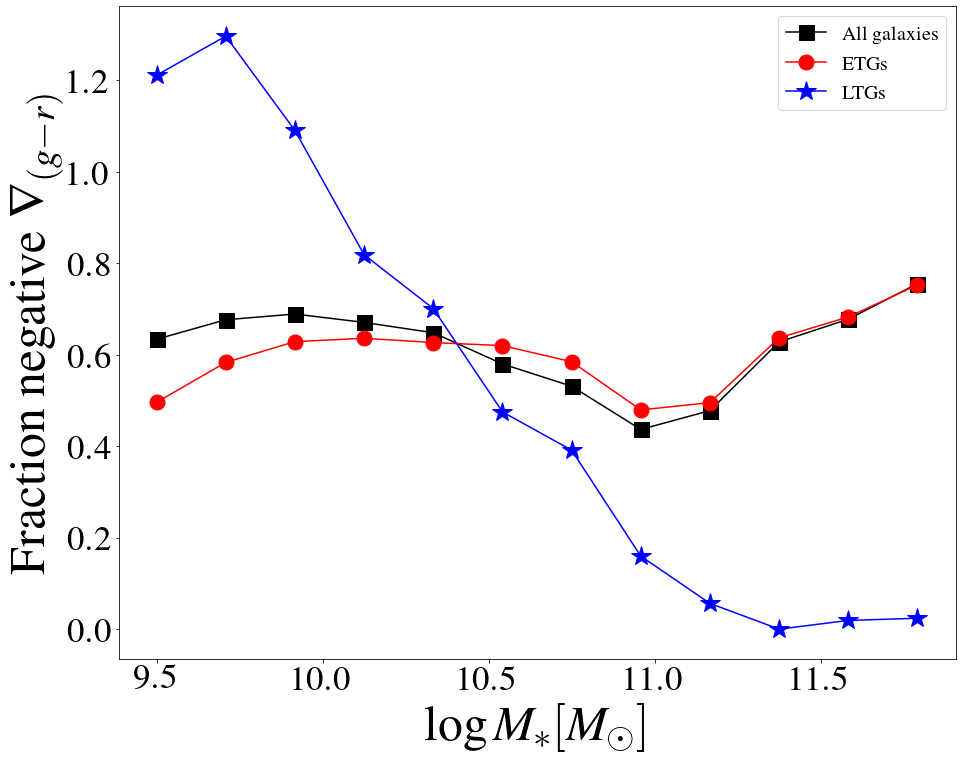

In [67]:
# fig, ax= plt.subplots(figsize=(15,12))


# # negative gradient fraction mass


# plt.plot(gradgr_neg_count_bins[:-1], all_neg_gr_grad[0,:], zorder=3, color ='black', marker = 's', markersize= 15,  label= r'All galaxies')
# plt.plot(gradgr_neg_early_count_bins[:-1], early_neg_gr_grad[0,:], zorder=3, color ='red', marker = 'o', markersize= 15,  label='ETGs ')
# plt.plot(gradgr_neg_late_count_bins[:-1], late_neg_gr_grad[0,:], zorder=3, color ='blue', marker = '*', markersize= 20,  label='LTGs')


# # Add axis labels

# plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)
# plt.ylabel(r'Fraction negative $\nabla_{(g-r)}$', fontsize=50)

# #set axis limits
# # plt.ylim(-1, 1)
# # plt.xlim(8.9,12)

# #adjust tick label font size
# label_size = 25
# matplotlib.rcParams['xtick.labelsize'] = label_size 
# matplotlib.rcParams['ytick.labelsize'] = label_size


# plt.legend(fontsize=20)
# plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/negfrac_Msgr_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
# plt.show()

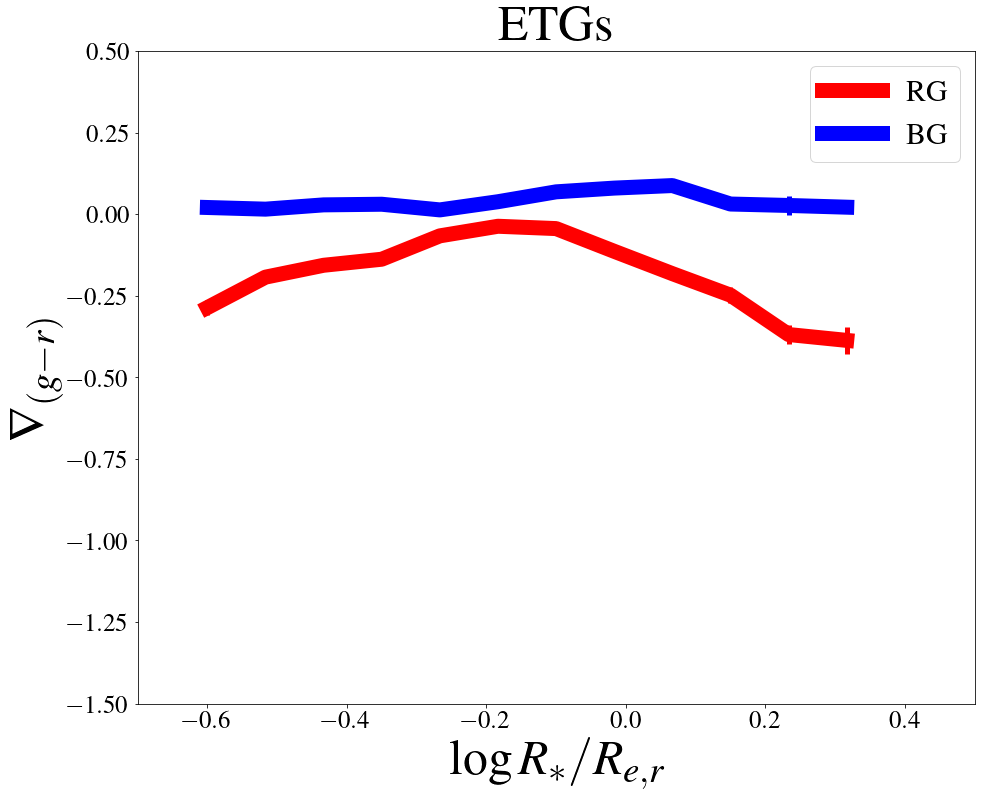

In [68]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  1 Re  VS ratio early  red and blue 

plt.plot(gradgrearlyrat_red_mean_bins[:-1], stat_gradgrrat_early_red_mean, zorder=3, color ='red', lw=15, label=r'RG')
plt.errorbar(gradgrearlyrat_red_mean_bins[:-1], stat_gradgrrat_early_red_mean, yerr=stat_gradgrrat_early_red_std/np.sqrt(stat_gradgrrat_early_red_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
plt.plot(gradgrearlyrat_blue_mean_bins[:-1], stat_gradgrrat_early_blue_mean, zorder=3, color ='blue',lw=15,  label=r'BG ')
plt.errorbar(gradgrearlyrat_blue_mean_bins[:-1], stat_gradgrrat_early_blue_mean, yerr=stat_gradgrrat_early_blue_std/np.sqrt(stat_gradgrrat_early_blue_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)

x = [-0.6,0.6]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log R_{\ast}/R_{e,r}$', fontsize=50)
plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)
plt.title(r'ETGs', fontsize=50)


#set axis limits
plt.ylim(-1.5, 0.5)
plt.xlim(-0.7,0.5)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_ratdearly_mean_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

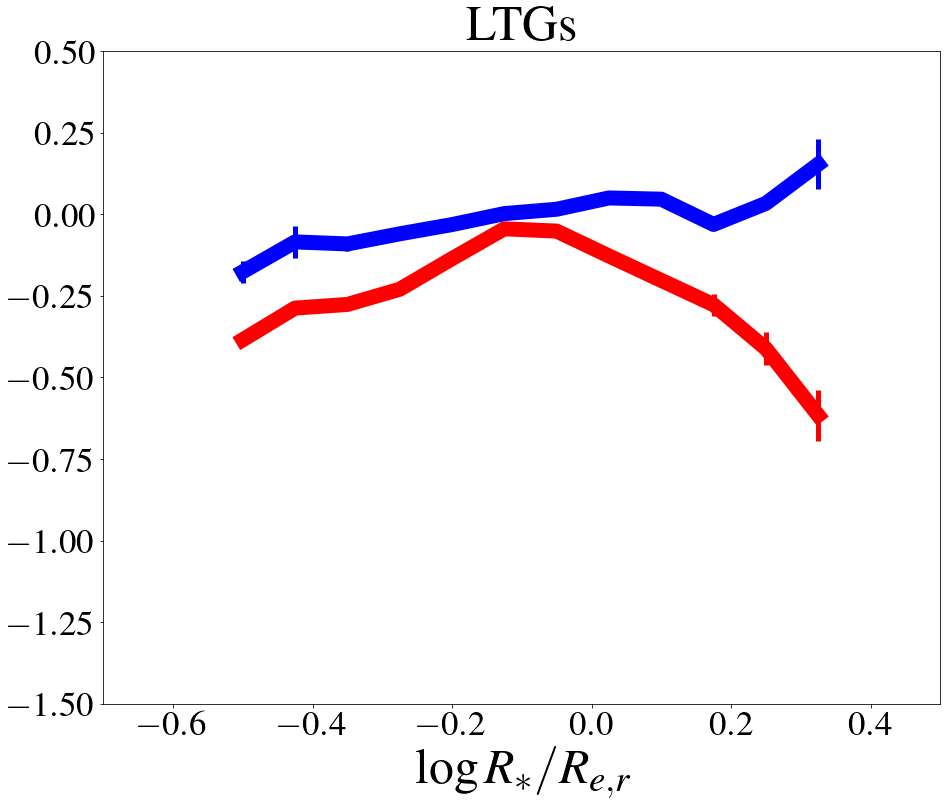

In [69]:
fig, ax= plt.subplots(figsize=(15,12))


# color gradient gr  1 Re  VS ratio early  red and blue 

plt.plot(gradgrlaterat_red_mean_bins[:-1], stat_gradgrrat_late_red_mean, zorder=3, color ='red',  lw=15, label=r'RG')
plt.errorbar(gradgrlaterat_red_mean_bins[:-1], stat_gradgrrat_late_red_mean, yerr=stat_gradgrrat_late_red_std/np.sqrt(stat_gradgrrat_late_red_count+1), zorder=3, xerr=None, ls='None', ecolor='red', elinewidth=5)
plt.plot(gradgrlaterat_blue_mean_bins[:-1], stat_gradgrrat_late_blue_mean, zorder=3, color ='blue',lw=15,   label=r'BG ')
plt.errorbar(gradgrlaterat_blue_mean_bins[:-1], stat_gradgrrat_late_blue_mean, yerr=stat_gradgrrat_late_blue_std/np.sqrt(stat_gradgrrat_late_blue_count+1), zorder=3, xerr=None, ls='None', ecolor='blue', elinewidth=5)

x = [-0.6,0.6]
y = [0,0]
plt.plot(x, y, color='white', zorder=1, linestyle='-', lw=10)

# Add axis labels

plt.xlabel(r'$\log R_{\ast}/R_{e,r}$', fontsize=50)
# plt.ylabel(r'$\nabla_{(g-r)}$', fontsize=50)
plt.title(r'LTGs', fontsize=50)


#set axis limits
plt.ylim(-1.5, 0.5)
plt.xlim(-0.7,0.5)

#adjust tick label font size
label_size = 35
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.legend(fontsize=30)
plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/delgr_ratdlate_mean_sim.pdf',format='pdf',dpi=200, bbox_inches = 'tight')
plt.show()

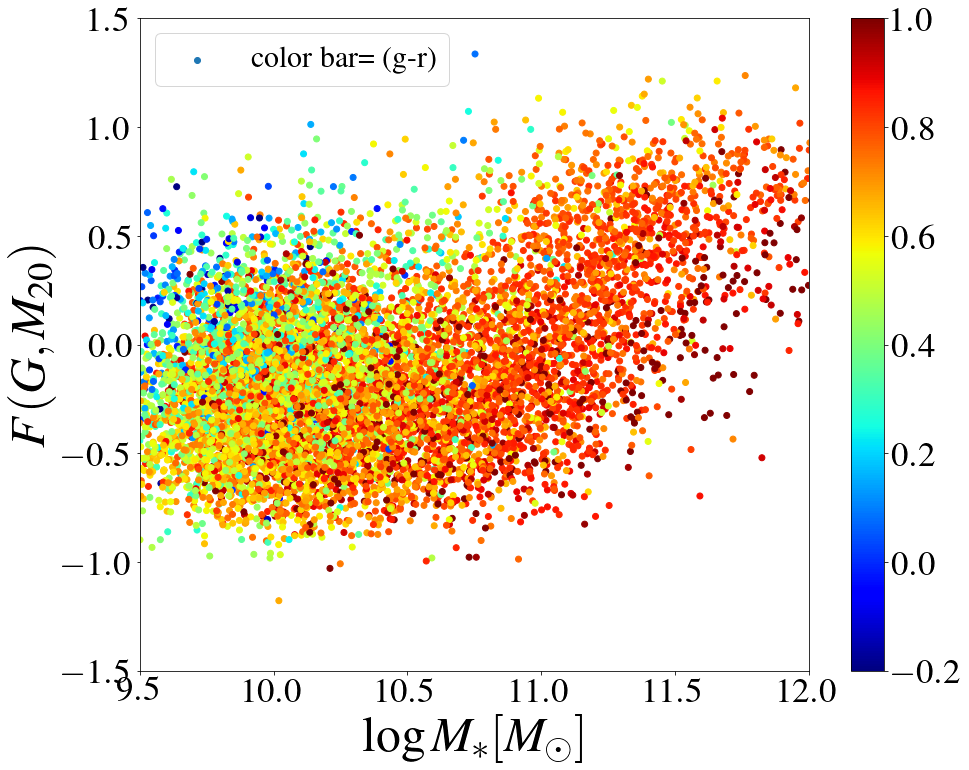

In [70]:
fig, ax= plt.subplots(figsize=(15,12))


plt.scatter(np.log10(Ms_d), gm20, c=gr, cmap='jet', vmin=-0.2, vmax=1.0, label=r'color bar= (g-r)')


plt.ylabel(r'$F(G,M_{20})$', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)
# plt.title(r'R', fontsize=50)

plt.ylim(-1.5,1.5)
plt.xlim(9.5, 12)

plt.legend(fontsize=30)

plt.colorbar()

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/gm20_scatter_sim.png',format='png',dpi=100, bbox_inches = 'tight')


plt.show()

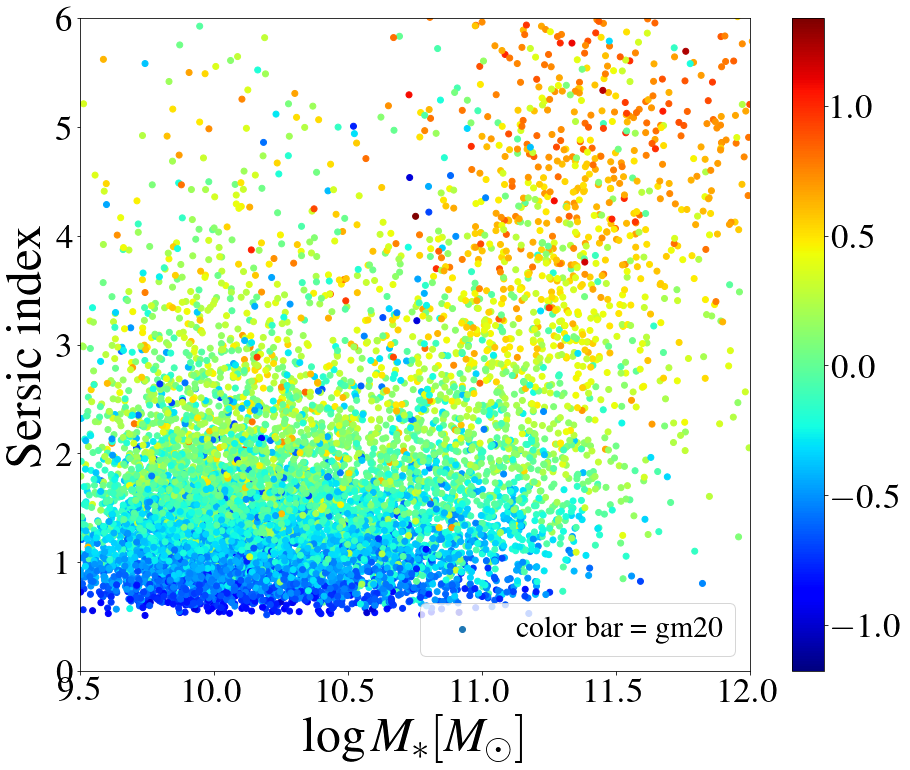

In [71]:
fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_d), n_r, c=gm20, cmap='jet', label=r'color bar = gm20')

plt.ylabel(r'Sersic index', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)

plt.ylim(0,6)
plt.xlim(9.5, 12)

plt.legend(fontsize=30)
plt.colorbar()

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/sersic_scatter_sim.png',format='png',dpi=100, bbox_inches = 'tight')


plt.show()

No handles with labels found to put in legend.


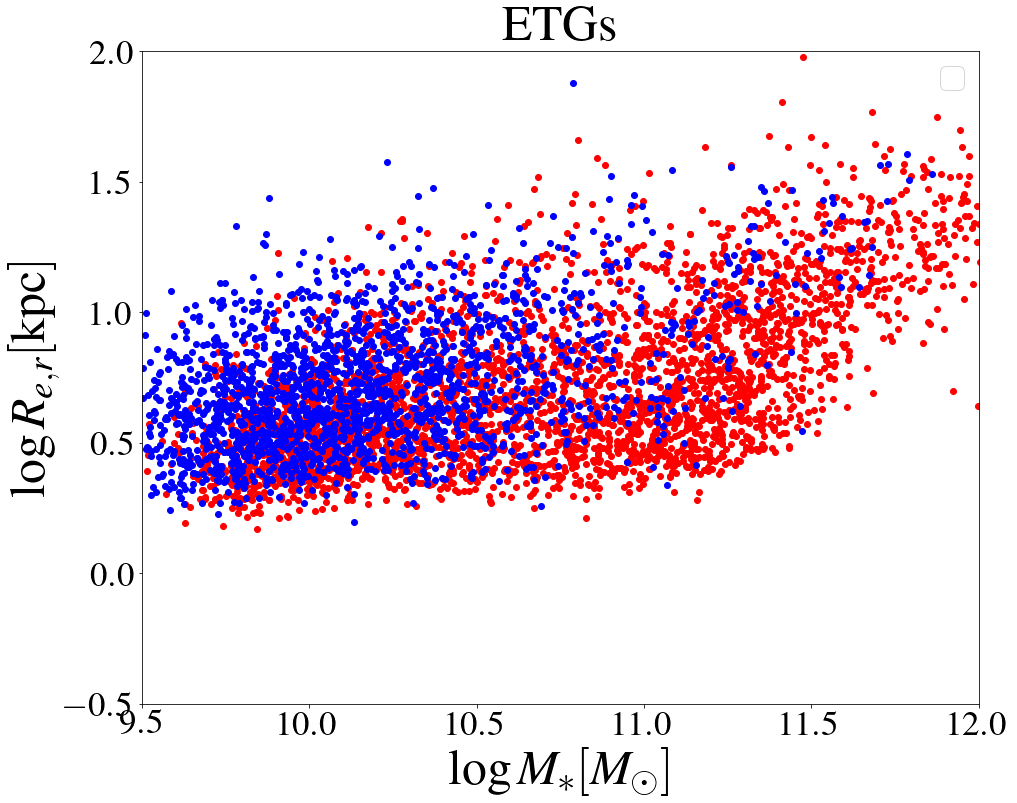

In [72]:
# re_r_d_early_red
# re_r_d_early_blue 

fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_gr_red_early_c),np.log10(re_r_d_early_red), color='red')
plt.scatter(np.log10(Ms_gr_blue_early_c),np.log10(re_r_d_early_blue), color='blue')

plt.title(r'ETGs', fontsize=50)
plt.ylabel(r'$\log R_{e,r} [\rm kpc]$', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)

plt.ylim(-0.5,2.0)
plt.xlim(9.5, 12)

plt.legend(fontsize=30)


plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/early_mass_vs_rer_sim.png',format='png',dpi=100, bbox_inches = 'tight')


plt.show()


No handles with labels found to put in legend.


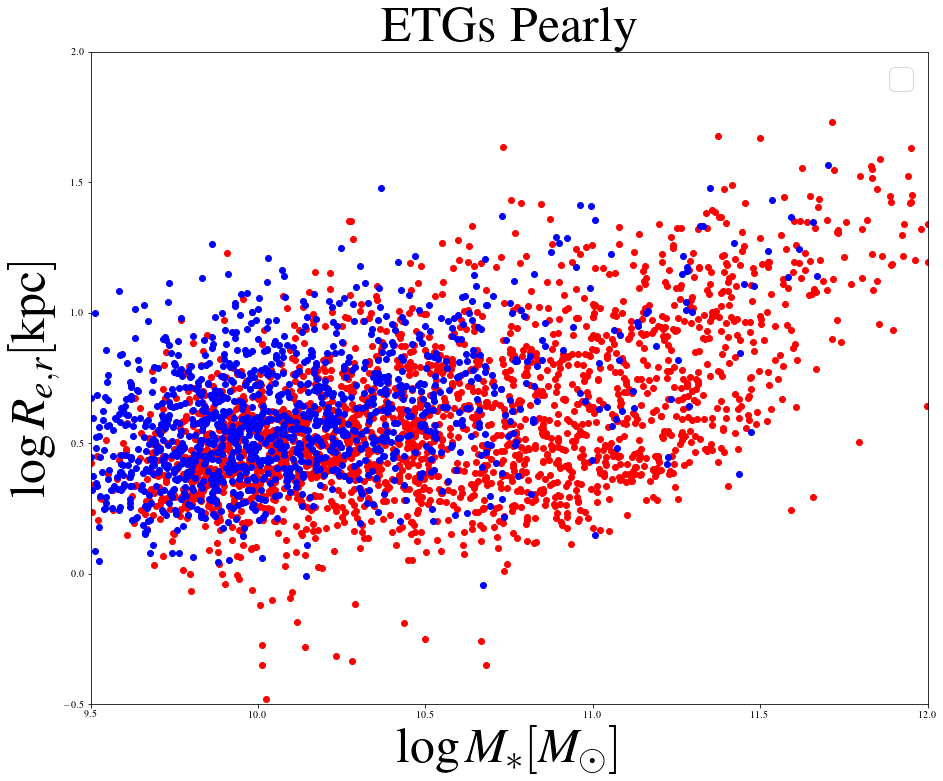

In [29]:

fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_gr_red_early),np.log10(re_r_early_red), color='red')
plt.scatter(np.log10(Ms_gr_blue_early),np.log10(re_r_early_blue), color='blue')

plt.title(r'ETGs Pearly', fontsize=50)
plt.ylabel(r'$\log R_{e,r} [\rm kpc]$', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)

plt.ylim(-0.5,2.0)
plt.xlim(9.5, 12)

plt.legend(fontsize=30)


plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/early_mass_vs_rer_sim_pearly5.png',format='png',dpi=100, bbox_inches = 'tight')


plt.show()

No handles with labels found to put in legend.


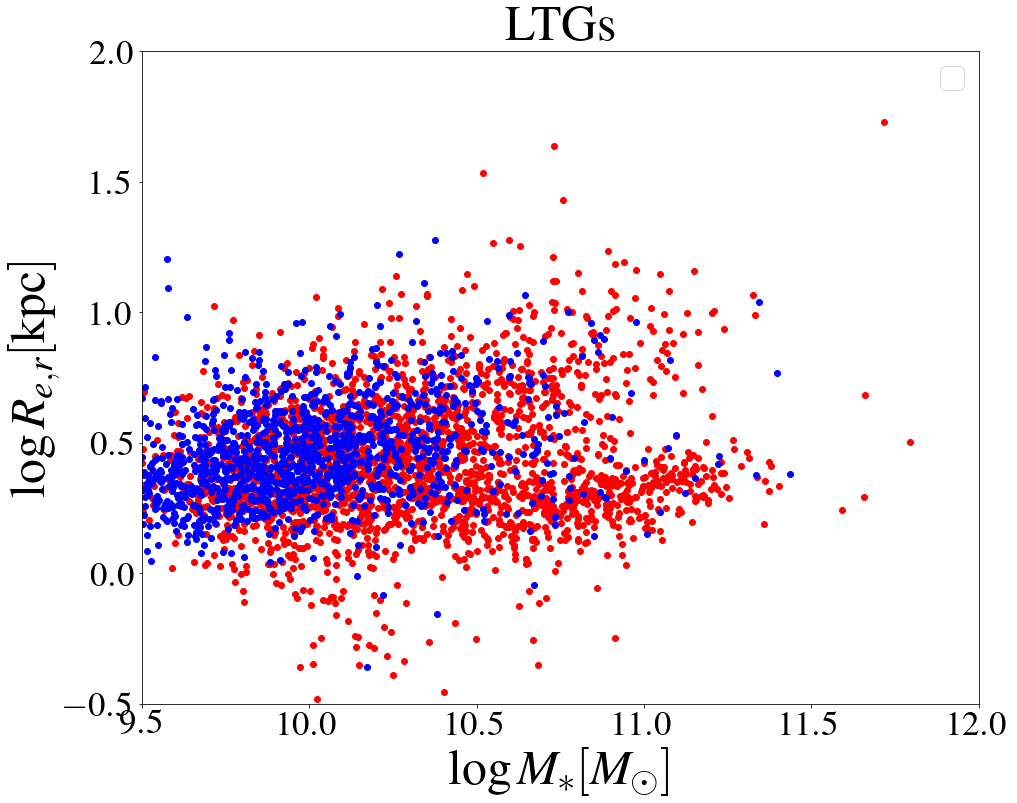

In [73]:


fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_gr_red_late_c),np.log10(re_r_d_late_red), color='red')
plt.scatter(np.log10(Ms_gr_blue_late_c),np.log10(re_r_d_late_blue), color='blue')

plt.ylabel(r'$\log R_{e,r} [\rm kpc]$', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)

plt.title(r'LTGs', fontsize=50)
plt.ylim(-0.5,2.0)
plt.xlim(9.5, 12)

plt.legend(fontsize=30)

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/late_mass_vs_rer_sim.png',format='png',dpi=100, bbox_inches = 'tight')


plt.show()

No handles with labels found to put in legend.


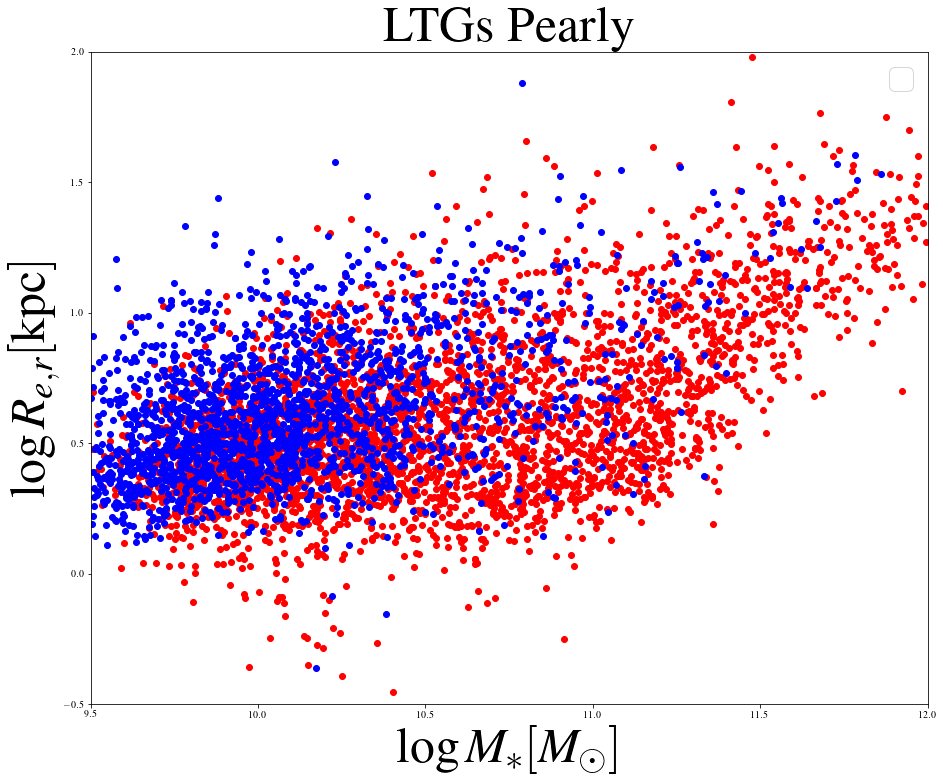

In [28]:


fig, ax= plt.subplots(figsize=(15,12))

plt.scatter(np.log10(Ms_gr_red_late),np.log10(re_r_late_red), color='red')
plt.scatter(np.log10(Ms_gr_blue_late),np.log10(re_r_late_blue), color='blue')

plt.ylabel(r'$\log R_{e,r} [\rm kpc]$', fontsize=50)
plt.xlabel(r'$\log M_{\ast} [M_{\odot}]$', fontsize=50)

plt.title(r'LTGs Pearly', fontsize=50)
plt.ylim(-0.5,2.0)
plt.xlim(9.5, 12)

plt.legend(fontsize=30)

plt.savefig('/Users/ximena/Desktop/UNAM/UNAM/mass_frac/sim/late_mass_vs_rer_sim_pearly5.png',format='png',dpi=100, bbox_inches = 'tight')


plt.show()